In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youth-tobacco-survey-in-indian-states/Youth Tobacco Survey In Indian States.csv


# Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns",70)
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [82]:
df=pd.read_csv(r"/kaggle/input/youth-tobacco-survey-in-indian-states/Youth Tobacco Survey In Indian States.csv")

# Data Info

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              107 non-null    int64  
 1   State                   107 non-null    object 
 2   Area                    107 non-null    object 
 3   Ever_Tob_Use            107 non-null    float64
 4   Curr_Tob_Use            107 non-null    float64
 5   Ever_Smoke              107 non-null    float64
 6   Curr_Smoke              107 non-null    float64
 7   Ever_Cig                107 non-null    float64
 8   Curr_Cig                107 non-null    float64
 9   Ever_Bidi               107 non-null    float64
 10  Curr_Bidi               107 non-null    float64
 11  Ever_SLT                107 non-null    float64
 12  Curr_SLT                107 non-null    float64
 13  Ever_PM_Tob             107 non-null    float64
 14  Suscept_Cig             107 non-null    fl

In [84]:
df.shape

(107, 60)

In [85]:
df.tail()

Unnamed: 0        State   Area  Ever_Tob_Use  Curr_Tob_Use  Ever_Smoke  \
102         102  Uttarakhand  Total          31.4          18.5        26.6   
103         103  Uttarakhand  Urban          39.5          25.7        35.9   
104         104  Uttarakhand  Rural          28.2          15.7        22.9   
105         105  West Bengal  Total          17.3           7.1         9.3   
106         106  West Bengal  Urban          18.0           6.9         9.1   

     Curr_Smoke  Ever_Cig  Curr_Cig  Ever_Bidi  Curr_Bidi  Ever_SLT  Curr_SLT  \
102        17.2      13.2       7.3       14.3        5.6      10.3       2.6   
103        24.8      19.4       9.7       22.2        7.7       8.7       1.6   
104        14.2      10.7       6.3       11.3        4.8      11.0       2.9   
105         5.2       5.4       3.6        5.5        2.9      11.1       3.0   
106         4.1       5.0       2.2        2.9        1.4      12.2       3.8   

     Ever_PM_Tob  Suscept_Cig Age_Init_Cig Age_Init_Bidi Age_Init_SLT  \
102          2.9         11.2          7.0           7.5           <7   
103          2.4         11.4          7.1           7.6           <7   
104          3.1         11.1           <7           7.4          7.5   
105          3.8          6.7         12.6          12.7         12.3   
106          2.8          4.9         12.5          12.5         11.7   

     E_Cig_Aware  E_Cig_Ever  Quit_Smoke_12mo  TryQuit_Smoke_12mo  \
102         36.9         7.6             14.1                20.9   
103         49.2        14.7             15.8                19.6   
104         32.1         4.8             13.1                21.8   
105         32.3         2.0             16.9                37.9   
106         25.0         2.3             16.9                39.4   

     WantQuit_Smoke  Quit_SLT_12mo  TryQuit_SLT_12mo  WantQuit_SLT  \
102            17.9            7.1               8.8           1.6   
103            17.6            0.8               0.0           0.0   
104            18.1            9.0              10.7           2.0   
105            40.1           11.9              15.5          13.8   
106            27.3           14.2              41.9          25.2   

     Smoke_Exposure  Smoke_Home  Smoke_Enclosed  Smoke_Outdoor  \
102            42.5        11.9            31.0           30.2   
103            58.1        12.0            42.5           47.7   
104            36.4        11.8            26.5           23.4   
105            55.1        27.0            38.9           46.6   
106            71.4        24.0            51.7           58.2   

     Seen_Smoke_School  Source_Cig_Store  Source_Cig_Paan  Source_Bidi_Store  \
102               17.8              69.1             13.9               72.6   
103               13.2              59.5             31.8               79.3   
104               19.7              76.1              0.7               68.2   
105               33.4              49.3             18.8               52.0   
106               43.3              52.3             23.0               33.4   

     Source_Bidi_Paan  Source_SLT_Store  Source_SLT_Paan  Bought_Cig_Loc  \
102              20.5              39.4             27.8            26.1   
103              19.7              58.4             17.8            23.6   
104              21.1              34.3             30.5            27.6   
105              22.7              59.2             17.4            63.1   
106              45.8              66.5             16.8            60.6   

     Bought_Bidi_Loc  Refused_Cig_Sale  Refused_Bidi_Sale  Refused_SLT_Sale  \
102             74.0              62.2               75.1              31.0   
103             73.1              23.0               75.5             100.0   
104             69.2              89.0               74.8              69.3   
105             74.2              34.1               24.8              38.9   
106             79.2              11.0

In [86]:
df.head()

Unnamed: 0                        State   Area  Ever_Tob_Use  Curr_Tob_Use  \
0           0                        India  Total          18.1           8.5   
1           1                        India  Urban          13.5           5.5   
2           2                        India  Rural          19.5           9.4   
3           3  Andaman and Nicobar Islands  Total          21.5           4.4   
4           4  Andaman and Nicobar Islands  Urban          13.3           3.4   

   Ever_Smoke  Curr_Smoke  Ever_Cig  Curr_Cig  Ever_Bidi  Curr_Bidi  Ever_SLT  \
0        11.0         7.3       4.6       2.6        4.1        2.1      12.5   
1         8.1         4.5       4.1       2.3        3.7        1.9       8.5   
2        11.8         8.1       4.7       2.6        4.3        2.2      13.7   
3         8.8         3.7       4.4       1.3        2.7        1.0      17.2   
4         6.5         2.6       3.7       1.3        2.0        0.7       9.0   

   Curr_SLT  Ever_PM_Tob  Suscept_Cig Age_Init_Cig Age_Init_Bidi Age_Init_SLT  \
0       4.1          4.3          8.4         11.5          10.5          9.9   
1       2.1          2.7          6.8         11.2          10.0         10.5   
2       4.6          4.7          8.9         11.6          10.7          9.7   
3       1.4          7.1         10.2         12.0          12.3         11.4   
4       1.3          2.1          7.3         12.4          13.8         12.3   

   E_Cig_Aware  E_Cig_Ever  Quit_Smoke_12mo  TryQuit_Smoke_12mo  \
0         26.9         2.8             10.6                20.0   
1         24.7         3.2             14.6                29.3   
2         27.5         2.6              9.8                18.6   
3         13.6         1.6             19.8                32.9   
4         10.0         1.1             10.7                24.2   

   WantQuit_Smoke  Quit_SLT_12mo  TryQuit_SLT_12mo  WantQuit_SLT  \
0            20.6            9.4              26.7          24.8   
1            25.7           13.7              23.7          24.0   
2            19.8            8.7              27.0          24.9   
3            30.9            4.6              16.3          11.1   
4            24.2            9.8              18.6           5.0   

   Smoke_Exposure  Smoke_Home  Smoke_Enclosed  Smoke_Outdoor  \
0            29.5        11.2            21.2           23.4   
1            33.4         9.0            24.6           26.8   
2            28.3        11.8            20.3           22.5   
3            35.6         7.0            26.9           26.9   
4            36.2         5.1            25.2           28.6   

   Seen_Smoke_School  Source_Cig_Store  Source_Cig_Paan  Source_Bidi_Store  \
0               28.8              39.7             25.2               50.5   
1               27.1              31.7             27.4               35.0   
2               29.3              41.7             24.7               54.0   
3               29.0              29.5             29.4               28.0   
4               24.4              23.2             29.9                0.0   

   Source_Bidi_Paan  Source_SLT_Store  Source_SLT_Paan  Bought_Cig_Loc  \
0              27.5              42.0             22.2            69.4   
1              43.5              37.9             36.0            69.8   
2              23.8              42.9             18.9            69.3   
3              18.7              44.3             41.5            42.3   
4              13.6              38.6             35.5            59.4   

   Bought_Bidi_Loc  Refused_Cig_Sale  Refused_Bidi_Sale  Refused_SLT_Sale  \
0             77.6              54.7               52.7              67.0   
1             75.2              56.3               61.7              50.0   
2             78.1              54.3               50.6              69.5   
3             37.5              59.8               63.2              12.2   
4             40.3              56.3          

# Data Handling & Cleaning

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              107 non-null    int64  
 1   State                   107 non-null    object 
 2   Area                    107 non-null    object 
 3   Ever_Tob_Use            107 non-null    float64
 4   Curr_Tob_Use            107 non-null    float64
 5   Ever_Smoke              107 non-null    float64
 6   Curr_Smoke              107 non-null    float64
 7   Ever_Cig                107 non-null    float64
 8   Curr_Cig                107 non-null    float64
 9   Ever_Bidi               107 non-null    float64
 10  Curr_Bidi               107 non-null    float64
 11  Ever_SLT                107 non-null    float64
 12  Curr_SLT                107 non-null    float64
 13  Ever_PM_Tob             107 non-null    float64
 14  Suscept_Cig             107 non-null    fl

In [88]:
df.select_dtypes(include="object")

State   Area Age_Init_Cig Age_Init_Bidi  \
0                          India  Total         11.5          10.5   
1                          India  Urban         11.2          10.0   
2                          India  Rural         11.6          10.7   
3    Andaman and Nicobar Islands  Total         12.0          12.3   
4    Andaman and Nicobar Islands  Urban         12.4          13.8   
..                           ...    ...          ...           ...   
102                  Uttarakhand  Total          7.0           7.5   
103                  Uttarakhand  Urban          7.1           7.6   
104                  Uttarakhand  Rural           <7           7.4   
105                  West Bengal  Total         12.6          12.7   
106                  West Bengal  Urban         12.5          12.5   

    Age_Init_SLT Cig_Stick Seen_Use_Media  
0            9.9      38.7           52.8  
1           10.5      37.3           58.6  
2            9.7      39.0           51.1  
3           11.4      42.2           46.2  
4           12.3      54.6           47.6  
..           ...       ...            ...  
102           <7      43.5           36.1  
103           <7      54.9           45.7  
104          7.5      35.2           32.3  
105         12.3      45.2           38.3  
106         11.7      59.2           52.9  

[107 rows x 7 columns]

In [89]:
cols = ["Age_Init_Cig", "Age_Init_Bidi", "Age_Init_SLT", "Cig_Stick", "Seen_Use_Media"]

for col in cols:
    try:
        df[col].astype("float64")
    except Exception as e:
        print(f"Issue with column '{col}': {e}")


Issue with column 'Age_Init_Cig': could not convert string to float: '--'
Issue with column 'Age_Init_Bidi': could not convert string to float: '<7.0'
Issue with column 'Age_Init_SLT': could not convert string to float: '<7'
Issue with column 'Cig_Stick': could not convert string to float: '35,2'
Issue with column 'Seen_Use_Media': could not convert string to float: '63..4'


In [90]:
# Define a function to clean and standardize numeric data
def clean_numeric_column(col):
    return (
        col.replace({"--": None, "<7.0": "7", "<7": "7"})  # Replace problematic strings with valid numbers or None
        .str.replace(",", ".")                            # Replace commas with dots for decimal points
        .str.replace("..", ".", regex=False)              # Replace double dots with single dot
    )

# Apply cleaning to problematic columns
cols = ["Age_Init_Cig", "Age_Init_Bidi", "Age_Init_SLT", "Cig_Stick", "Seen_Use_Media"]

for col in cols:
    if df[col].dtype == "object":  # Ensure it's a string column before applying string operations
        df[col] = clean_numeric_column(df[col])

# Convert columns to float
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, setting invalid conversions to NaN


In [91]:
df=df.astype({ "Age_Init_Cig":"float64", "Age_Init_Bidi":"float64", "Age_Init_SLT":"float64", "Cig_Stick":"float64", "Seen_Use_Media":"float64" })

In [92]:
df.isna().sum()
df.duplicated().sum()

0

<p style="font-size:50px;">EDA & Visualization</p>


## Area Classification

<Axes: ylabel='count'>

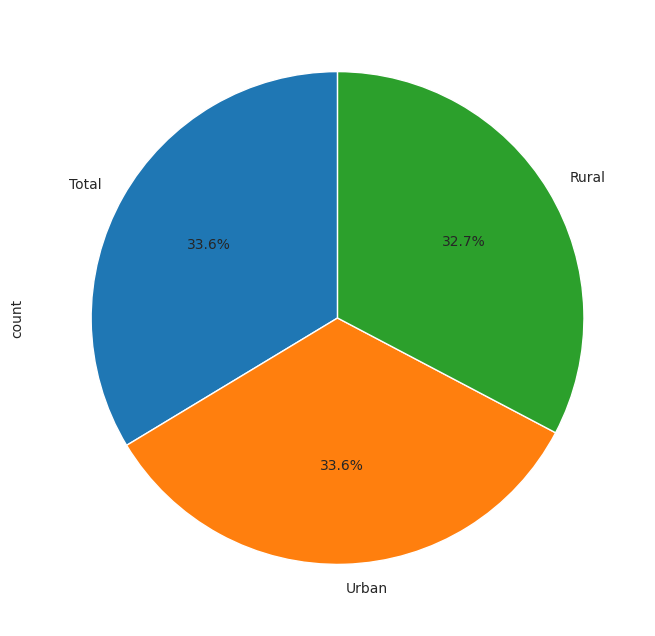

In [93]:
df["Area"].value_counts().plot(kind="pie",autopct="%1.1f%%",startangle=90,figsize=(10,8))

## Classification On Different Factors Based ON Area Mapping

In [94]:
df.columns

Index(['Unnamed: 0', 'State', 'Area', 'Ever_Tob_Use', 'Curr_Tob_Use',
       'Ever_Smoke', 'Curr_Smoke', 'Ever_Cig', 'Curr_Cig', 'Ever_Bidi',
       'Curr_Bidi', 'Ever_SLT', 'Curr_SLT', 'Ever_PM_Tob', 'Suscept_Cig',
       'Age_Init_Cig', 'Age_Init_Bidi', 'Age_Init_SLT', 'E_Cig_Aware',
       'E_Cig_Ever', 'Quit_Smoke_12mo', 'TryQuit_Smoke_12mo', 'WantQuit_Smoke',
       'Quit_SLT_12mo', 'TryQuit_SLT_12mo', 'WantQuit_SLT', 'Smoke_Exposure',
       'Smoke_Home', 'Smoke_Enclosed', 'Smoke_Outdoor', 'Seen_Smoke_School',
       'Source_Cig_Store', 'Source_Cig_Paan', 'Source_Bidi_Store',
       'Source_Bidi_Paan', 'Source_SLT_Store', 'Source_SLT_Paan',
       'Bought_Cig_Loc', 'Bought_Bidi_Loc', 'Refused_Cig_Sale',
       'Refused_Bidi_Sale', 'Refused_SLT_Sale', 'Cig_Stick', 'Bidi_Stick',
       'Seen_AT_Message', 'Seen_AT_Media', 'Seen_AT_Events', 'Seen_Warnings',
       'Seen_Ads', 'Seen_Use_Media', 'Seen_Cig_Ads_POS', 'Taught_Tob_Effects',
       'Hard_To_Quit', 'SHS_Harmful', 'Ban_Indoor

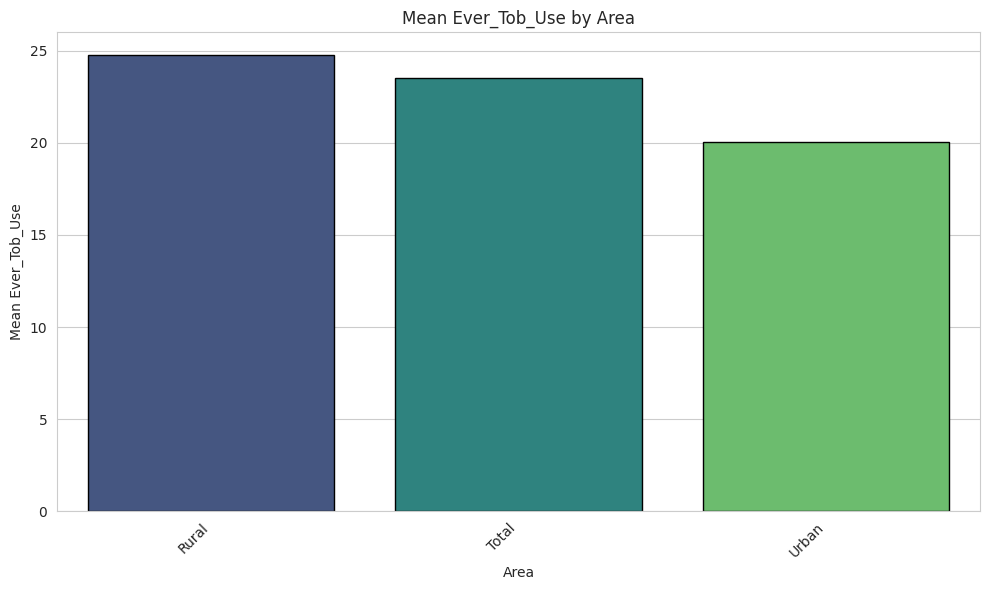

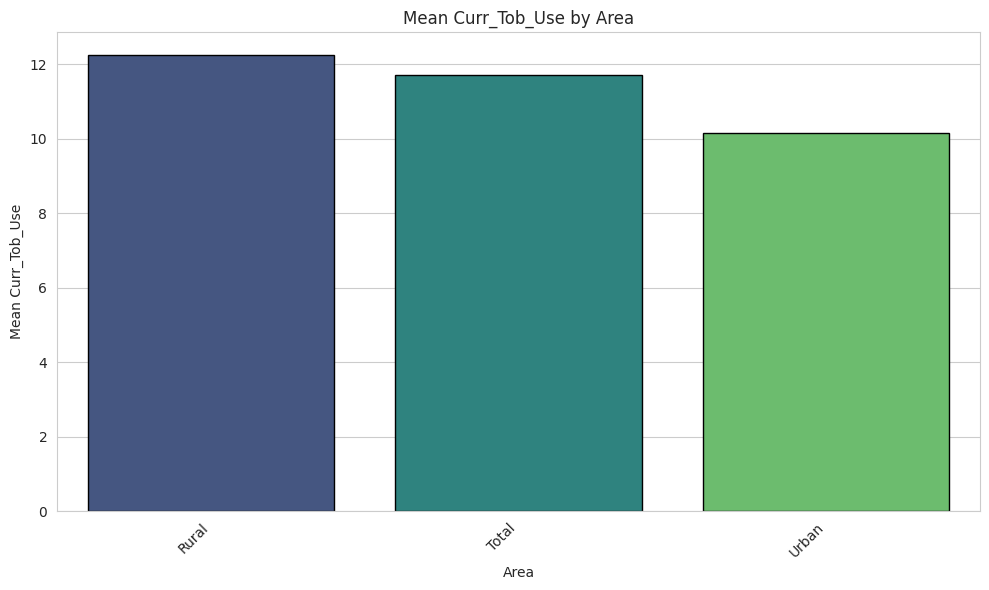

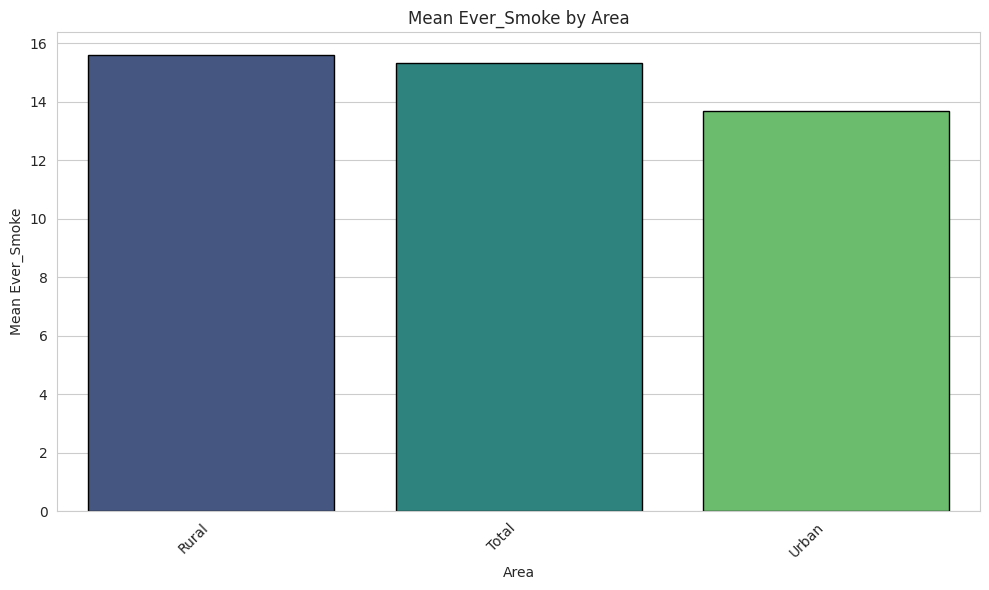

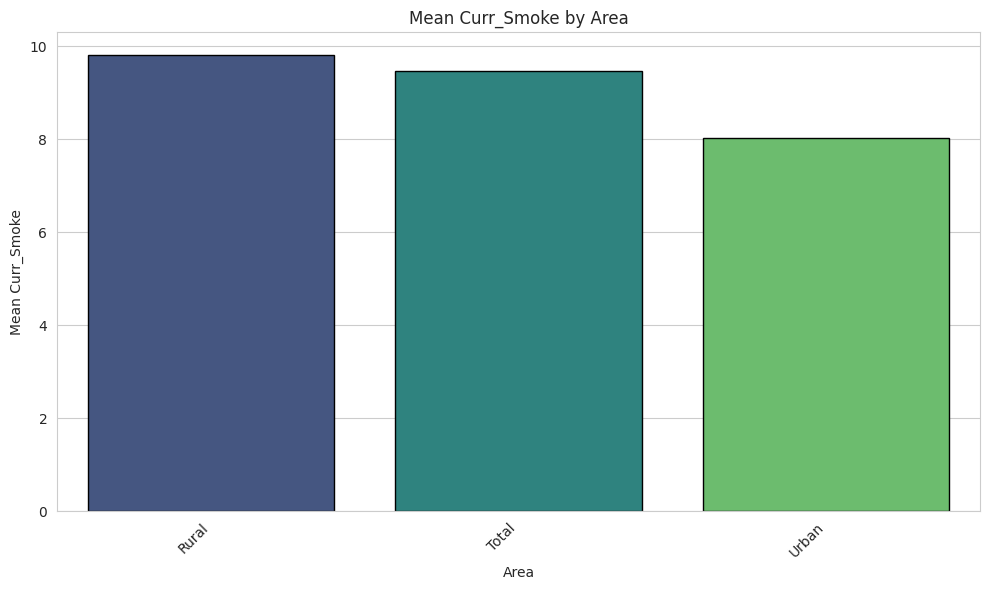

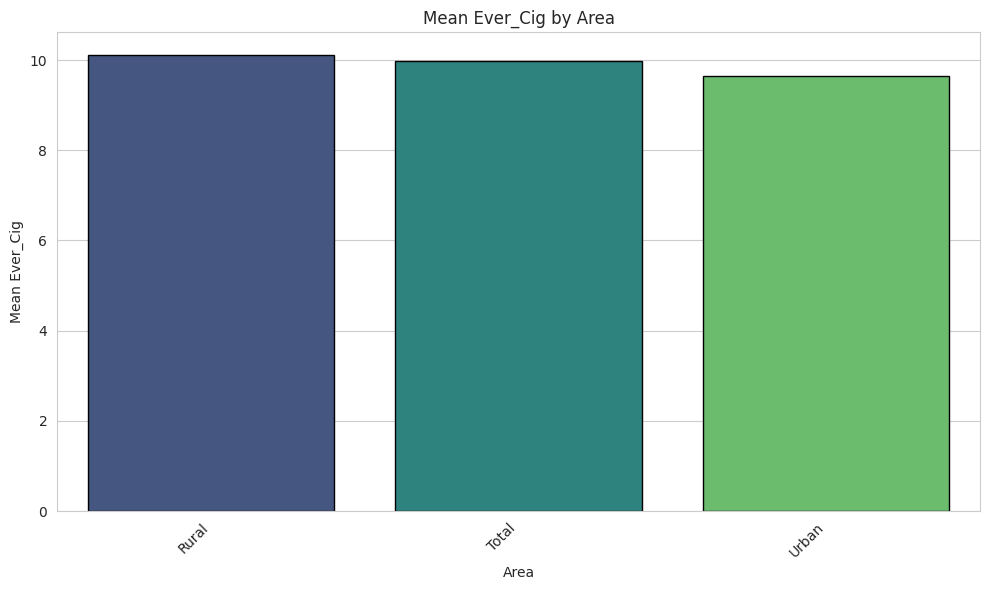

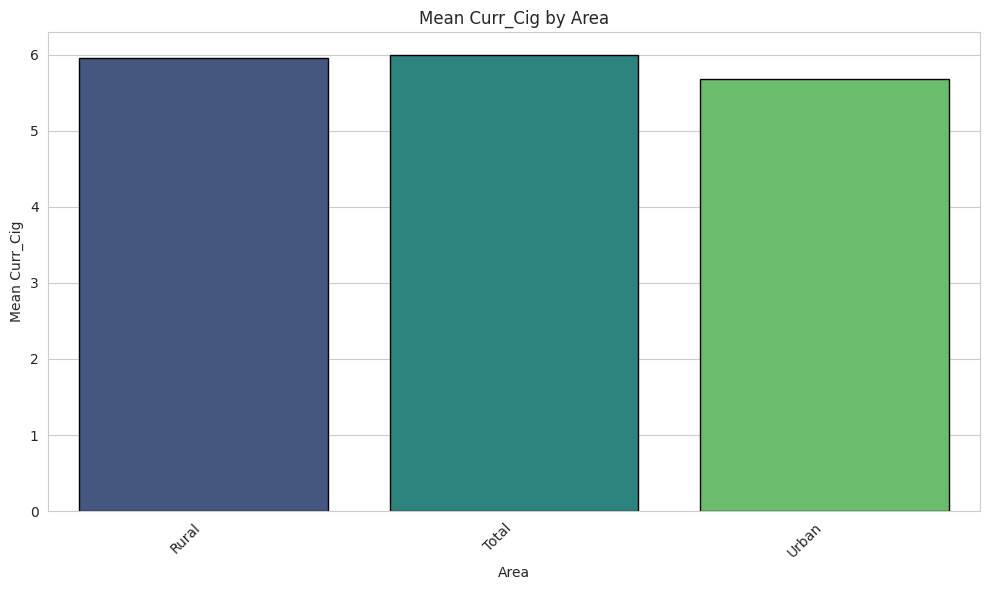

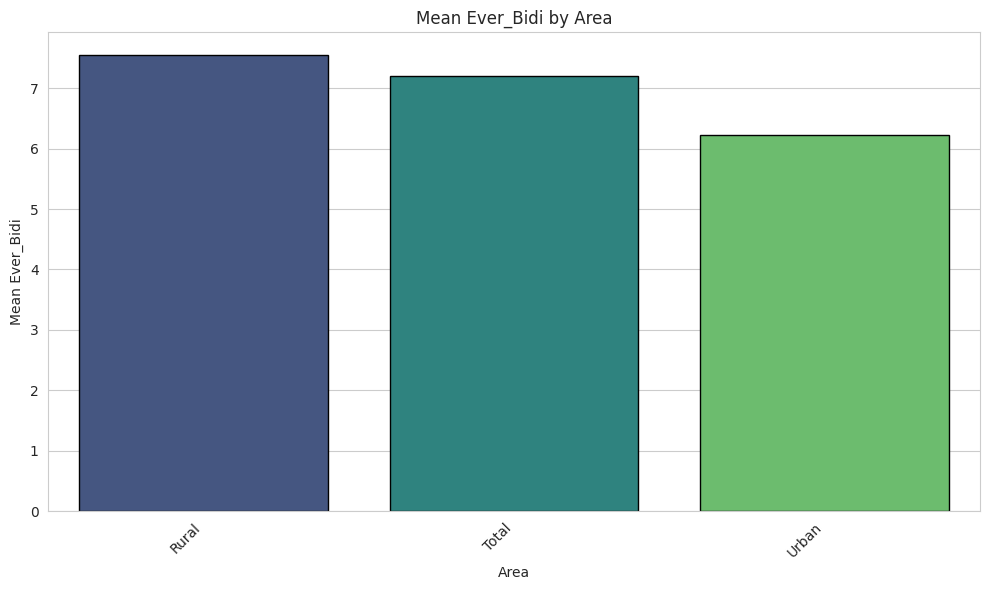

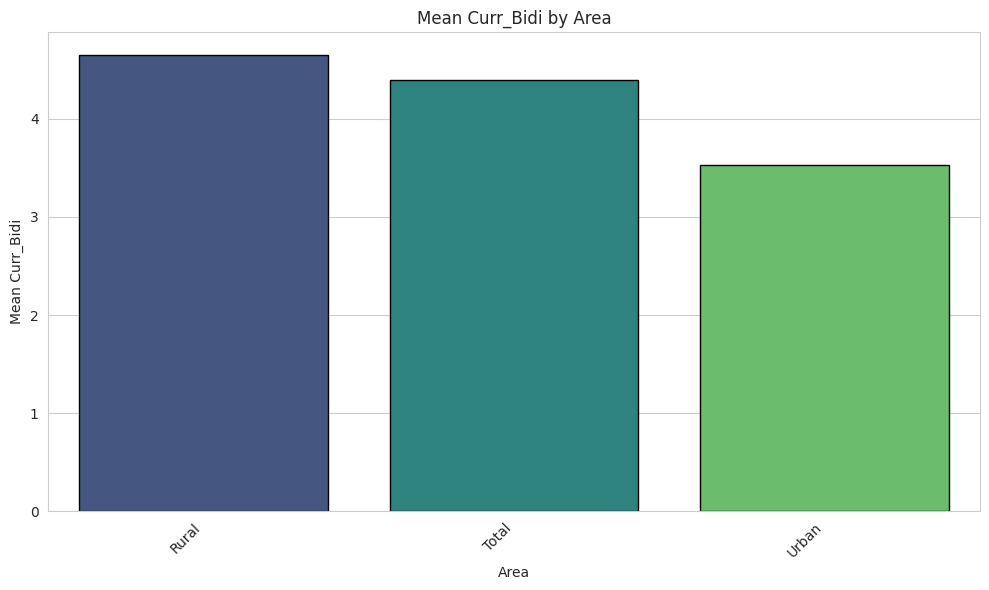

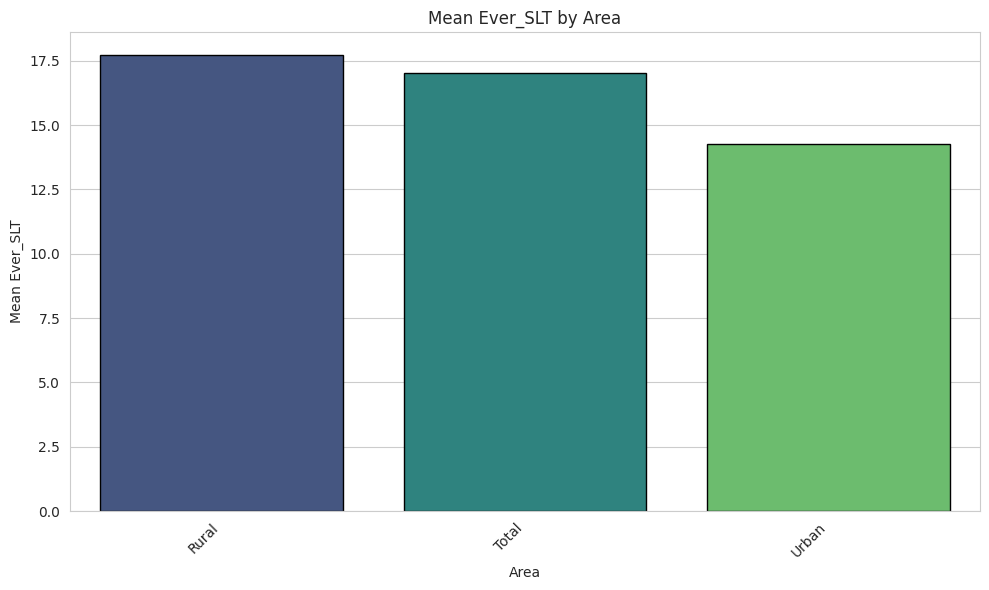

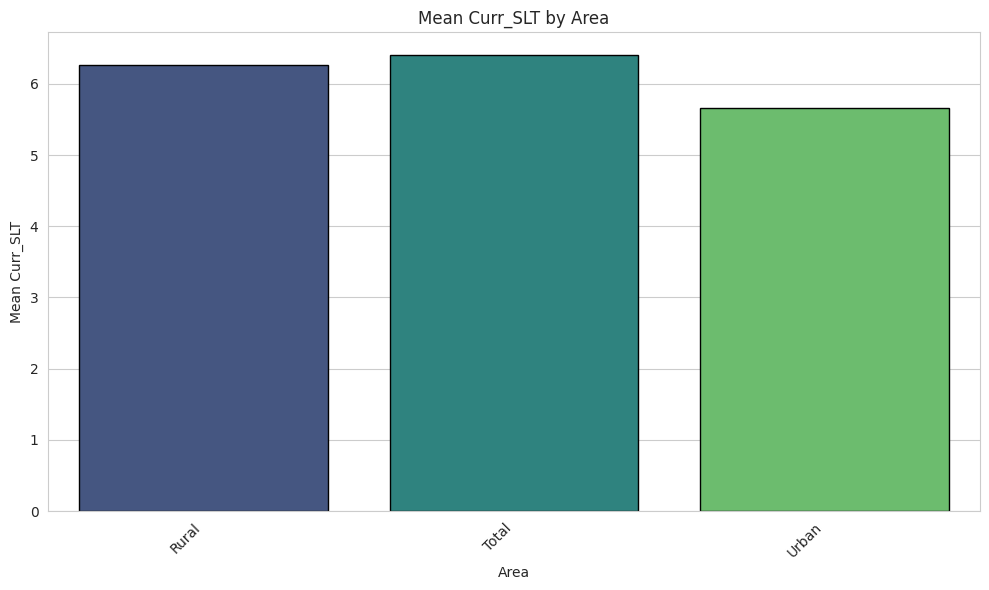

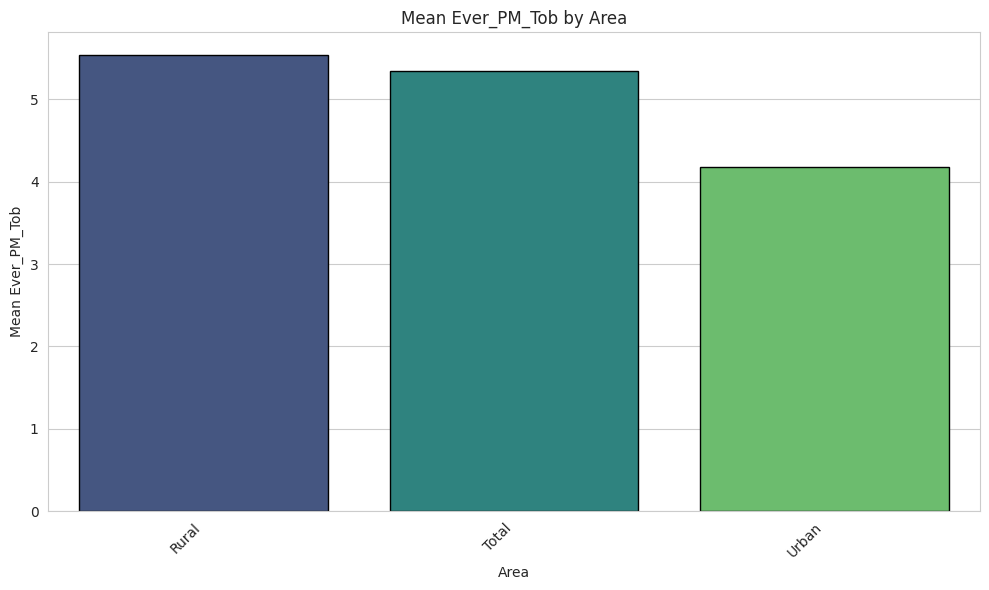

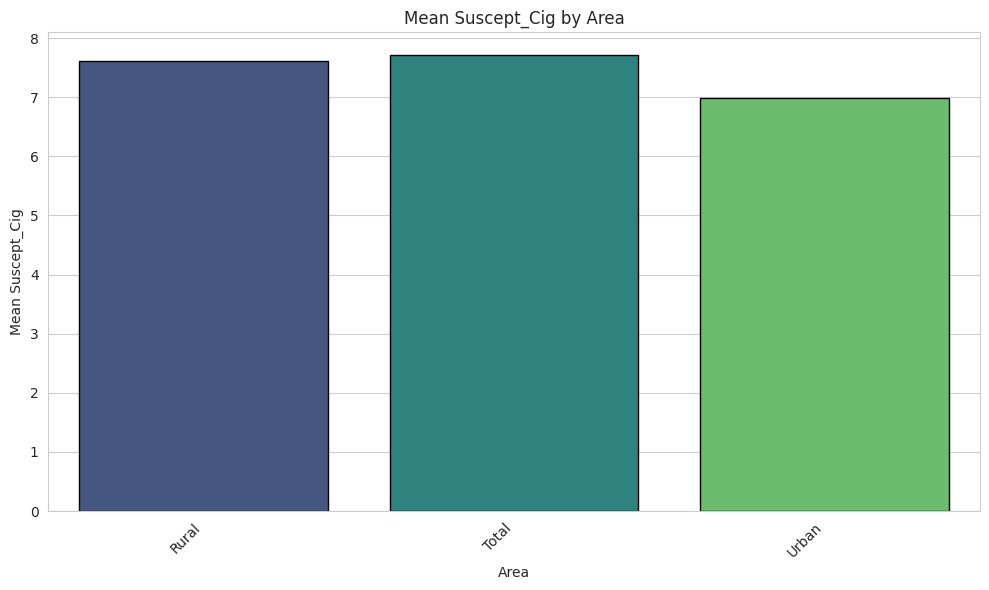

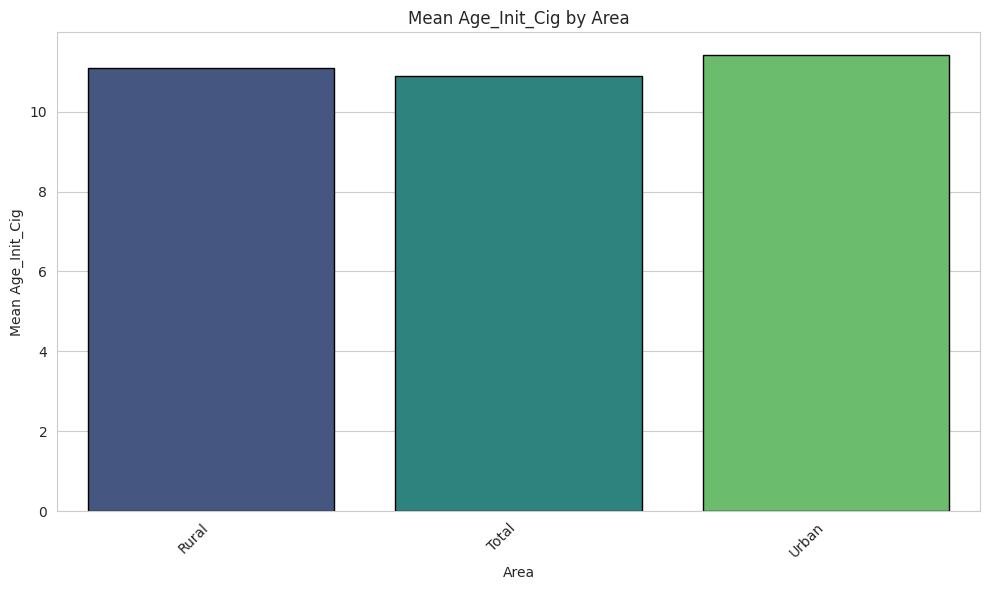

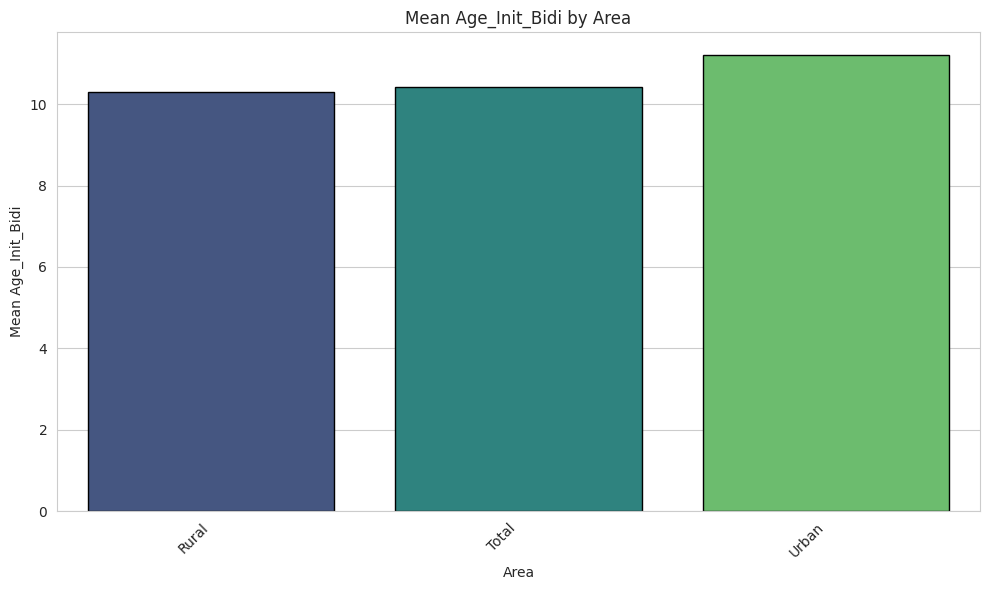

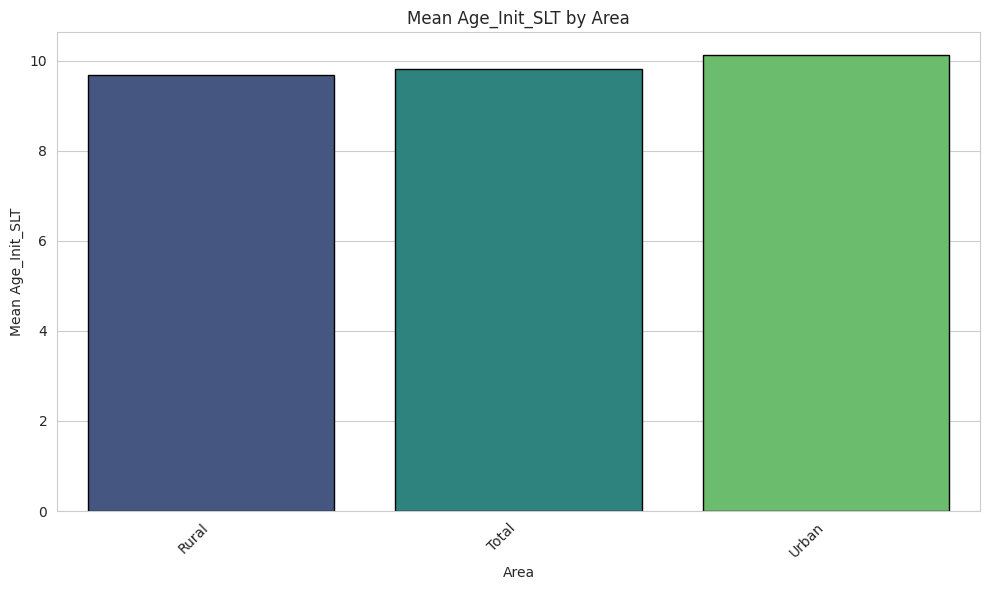

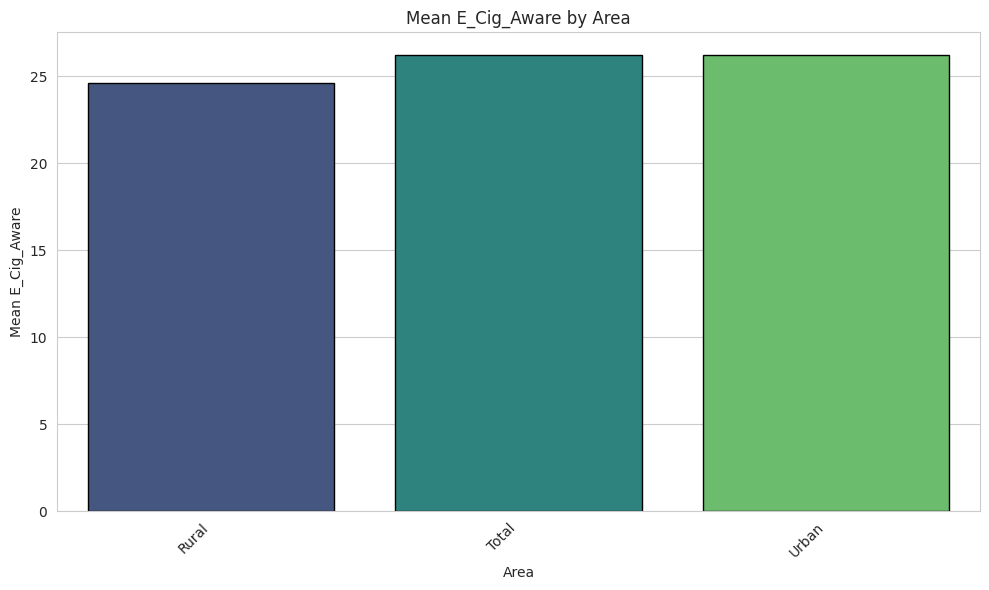

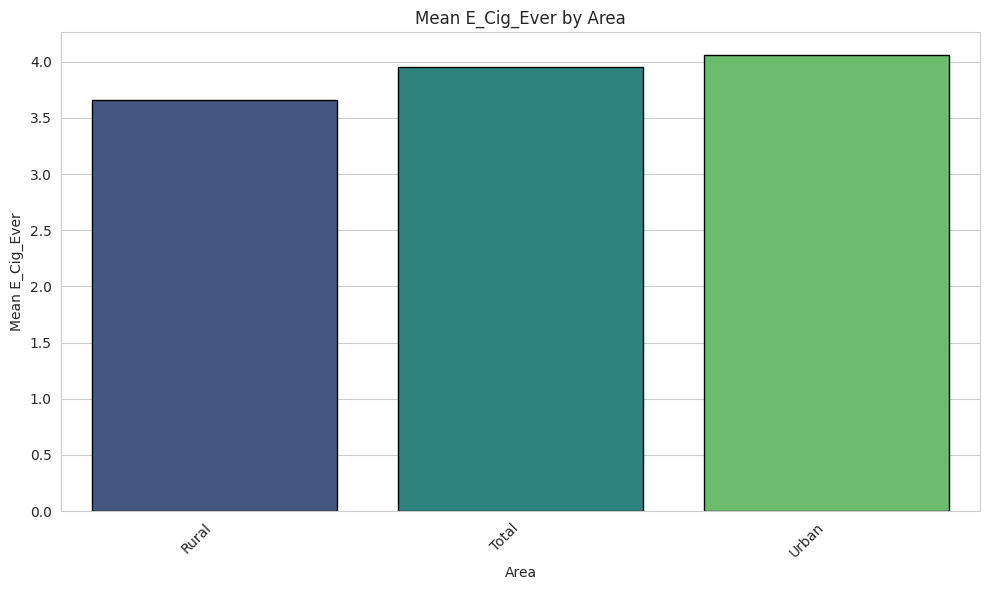

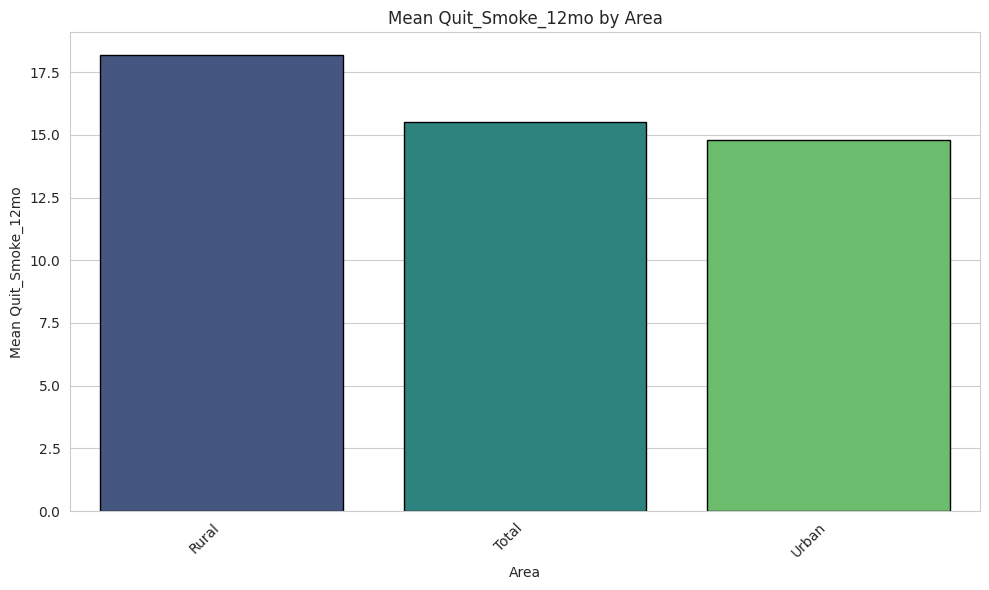

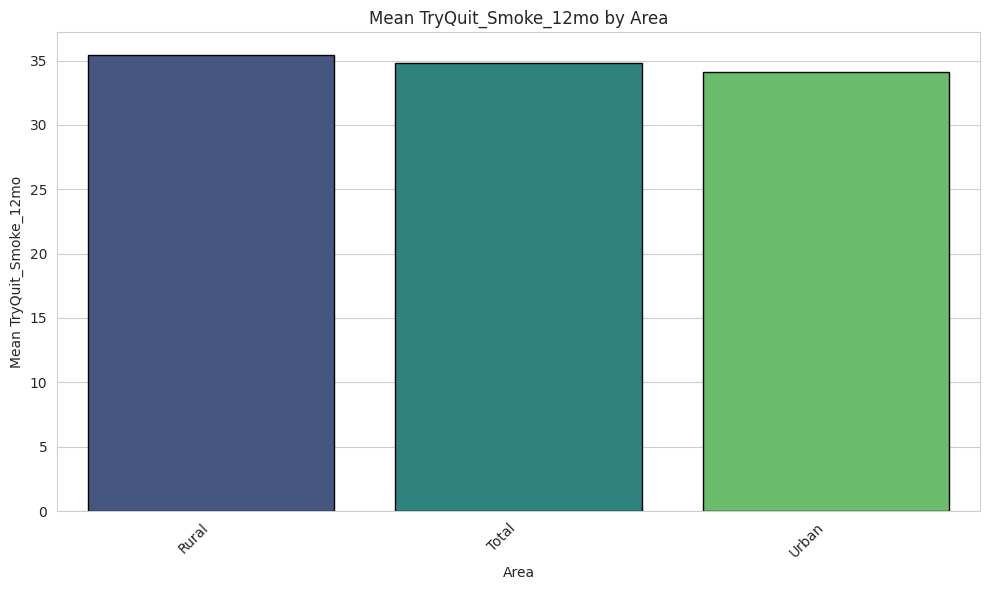

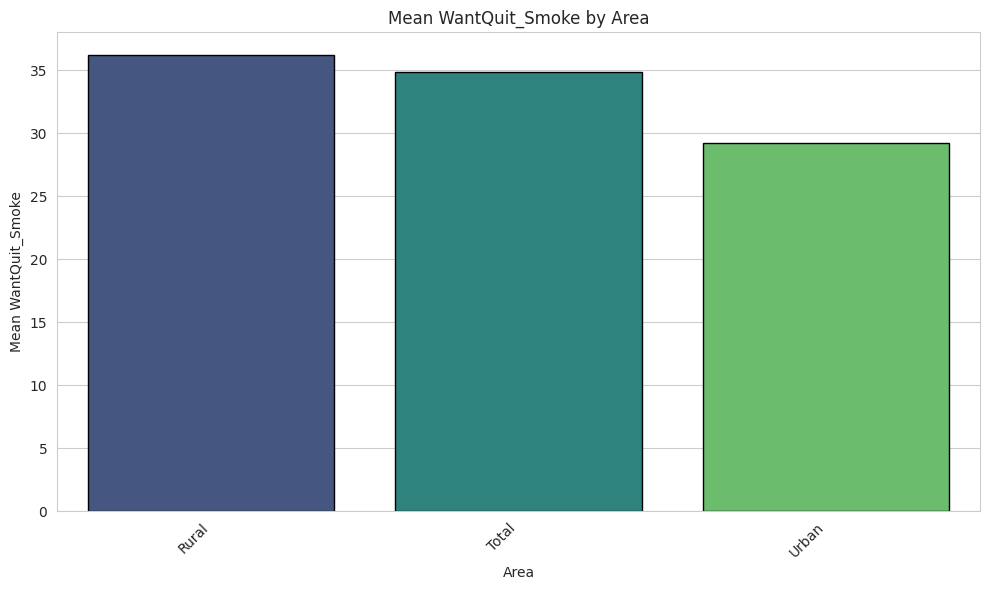

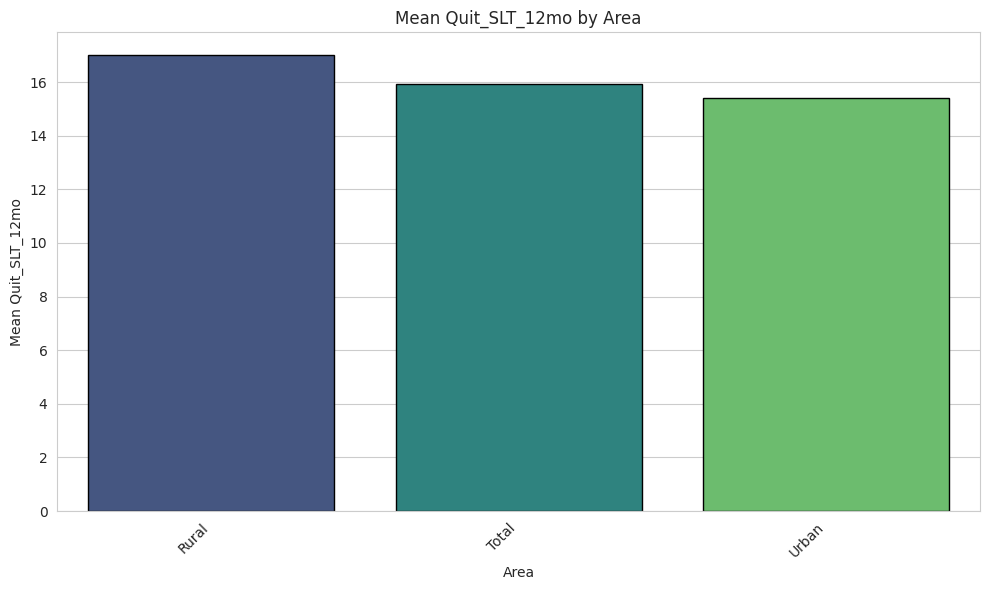

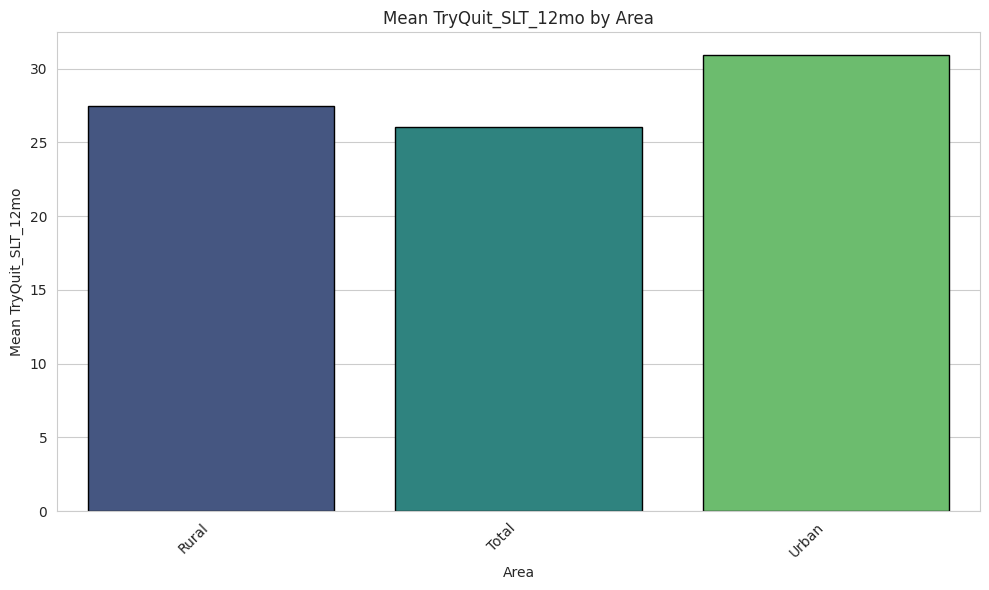

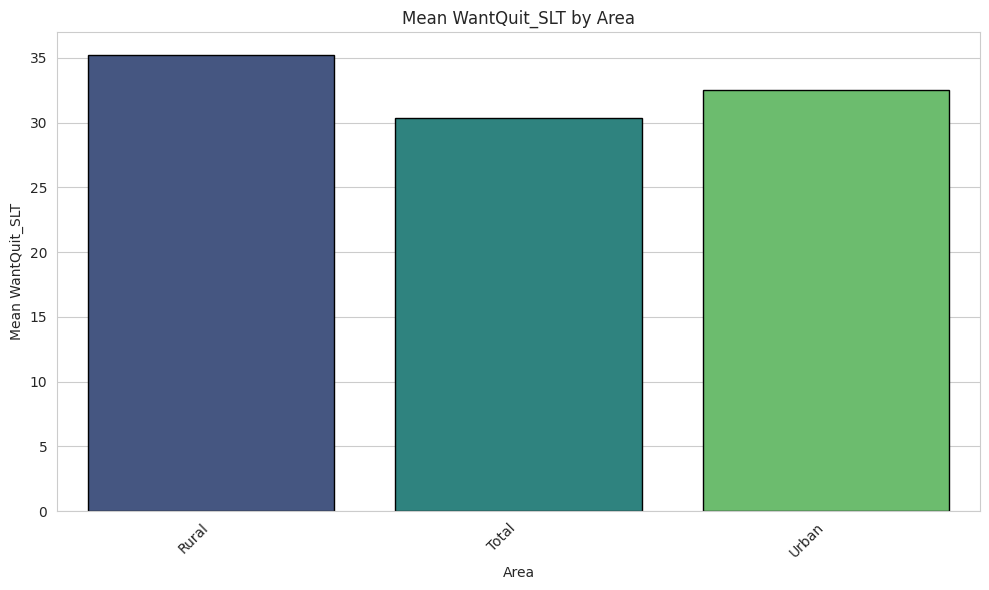

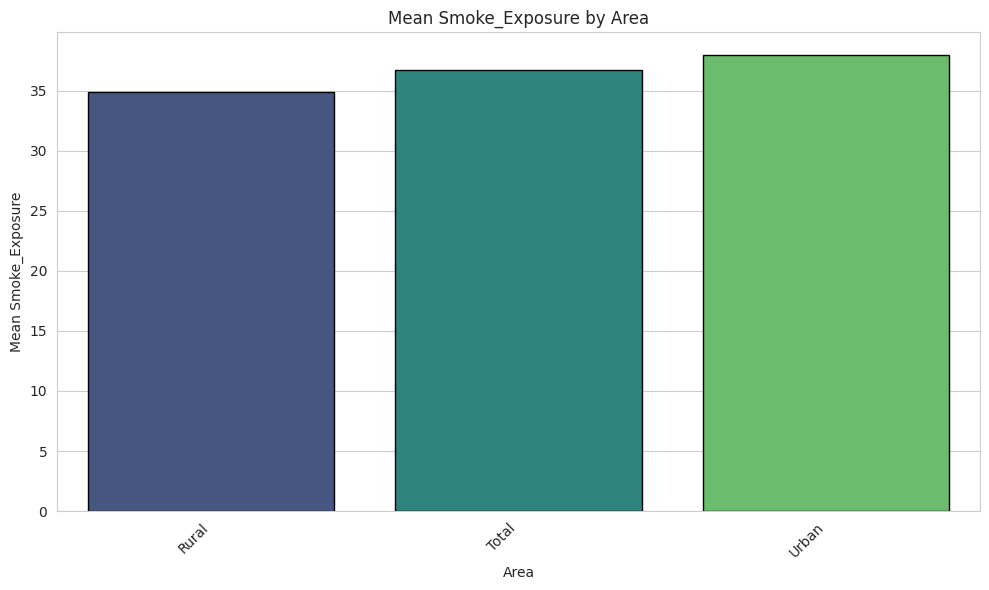

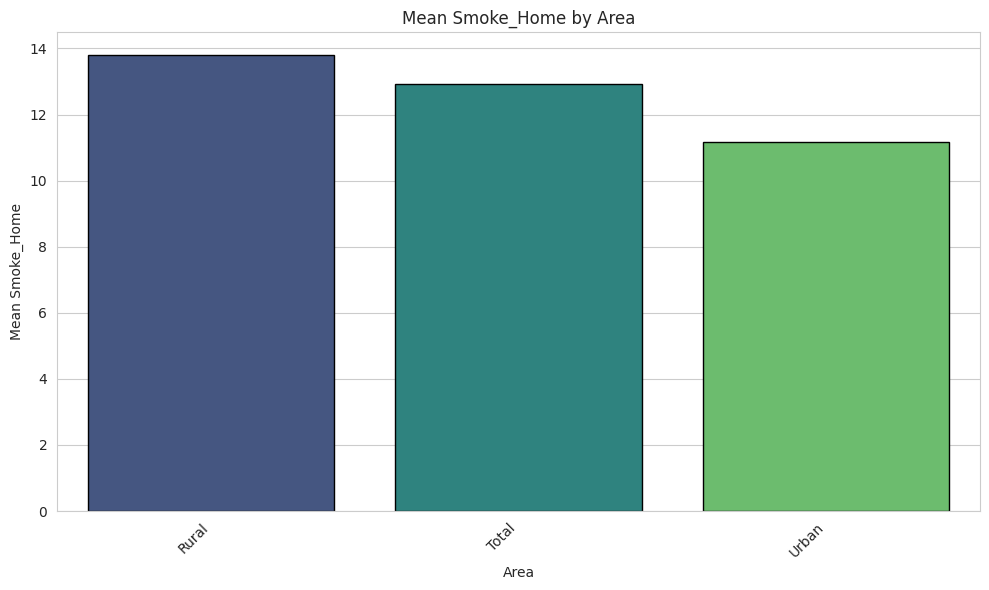

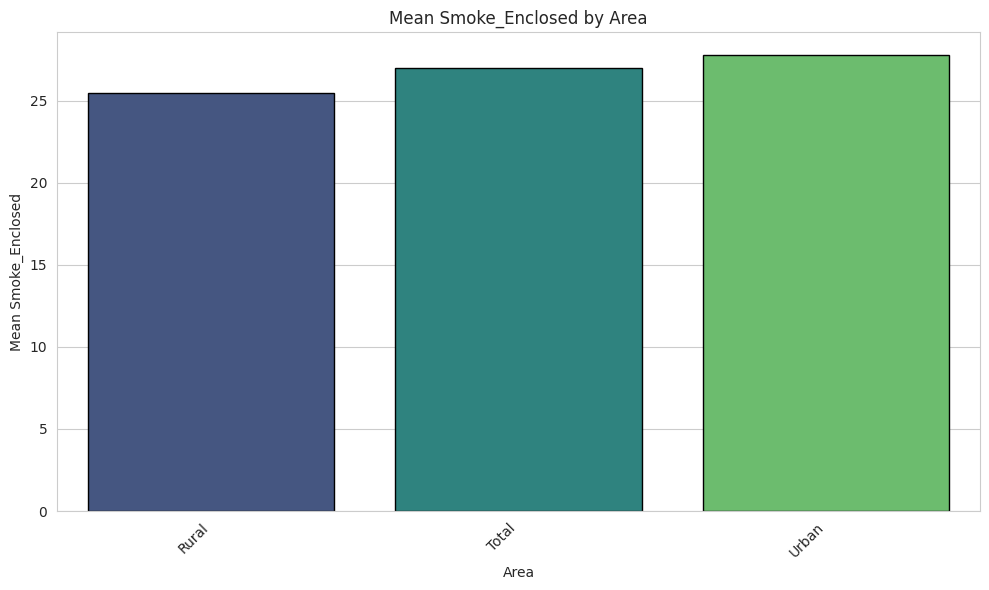

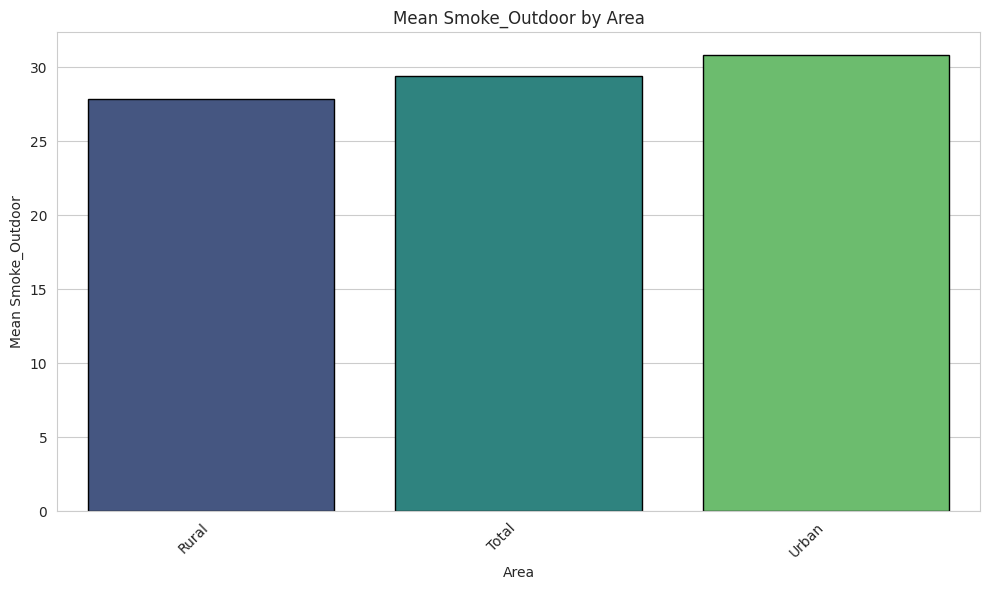

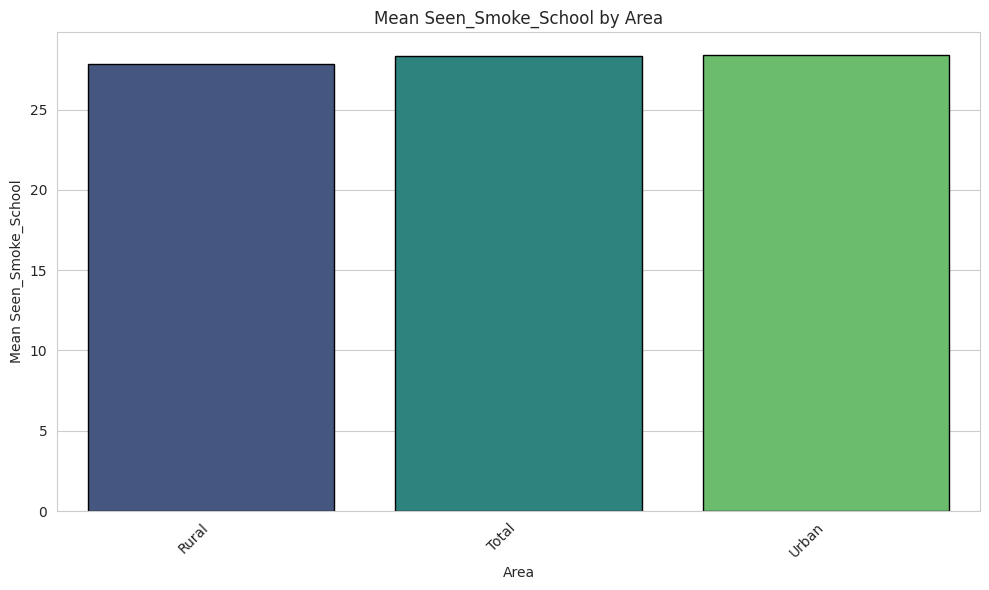

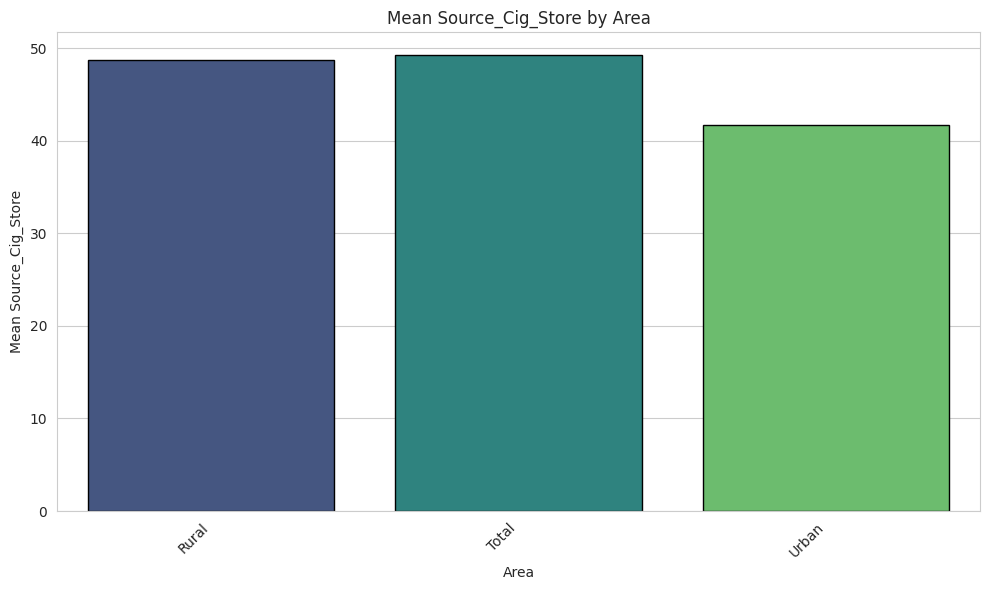

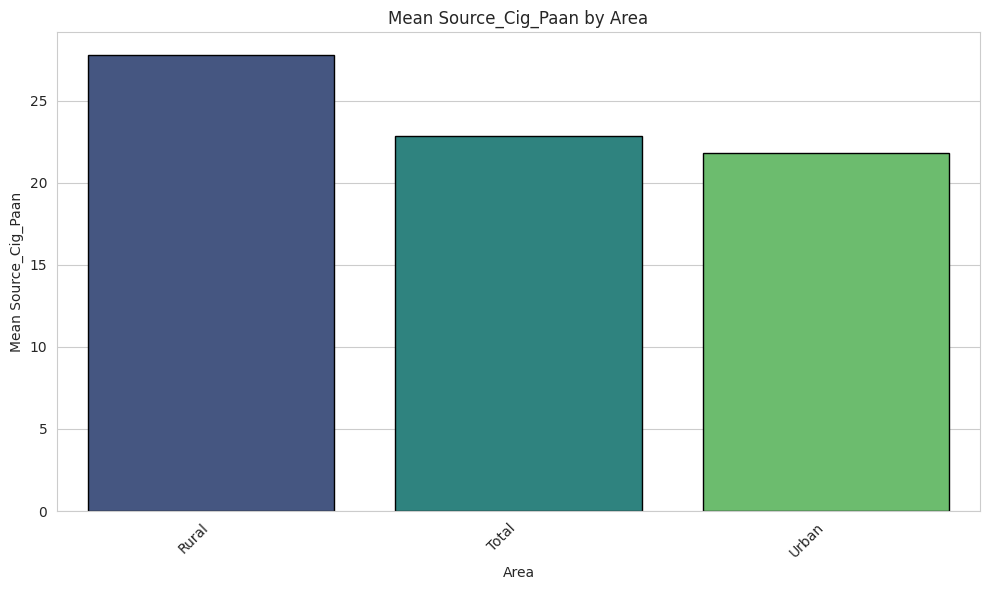

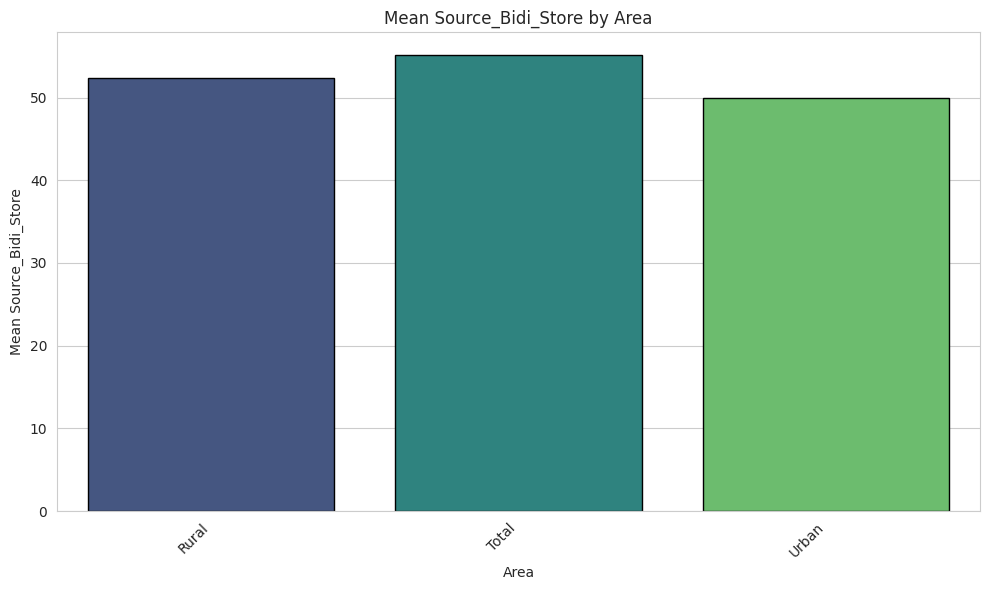

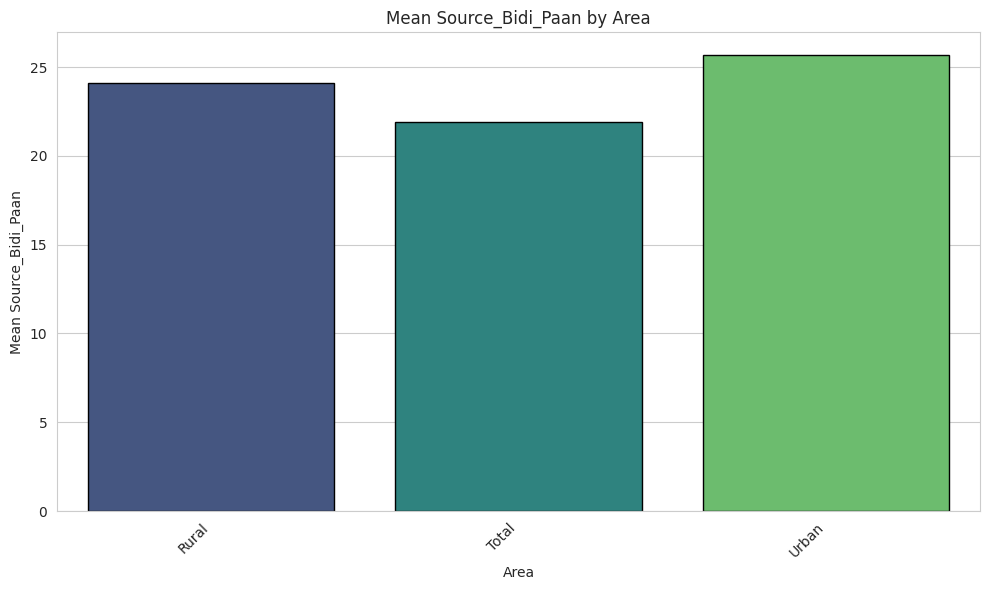

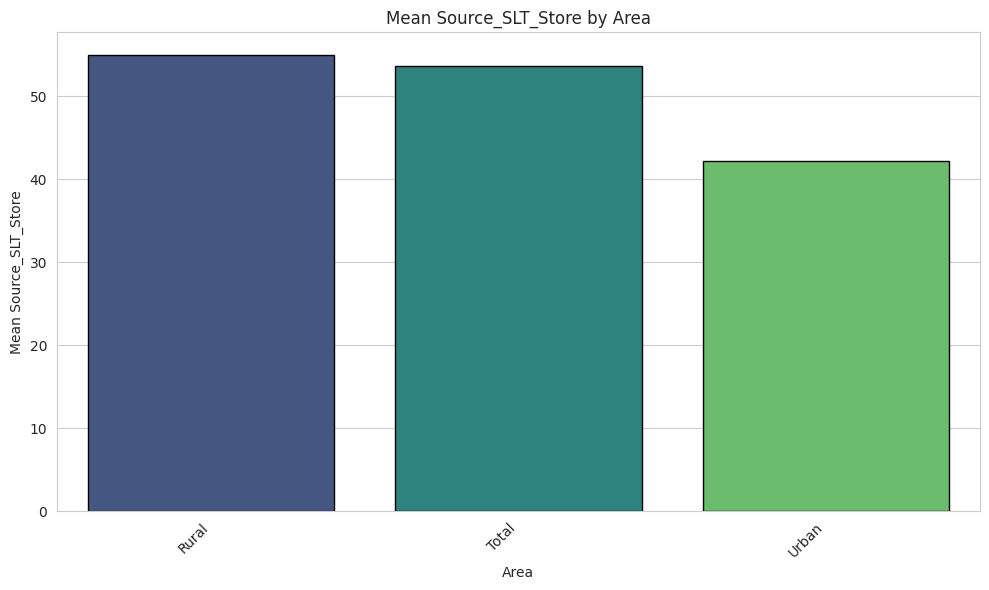

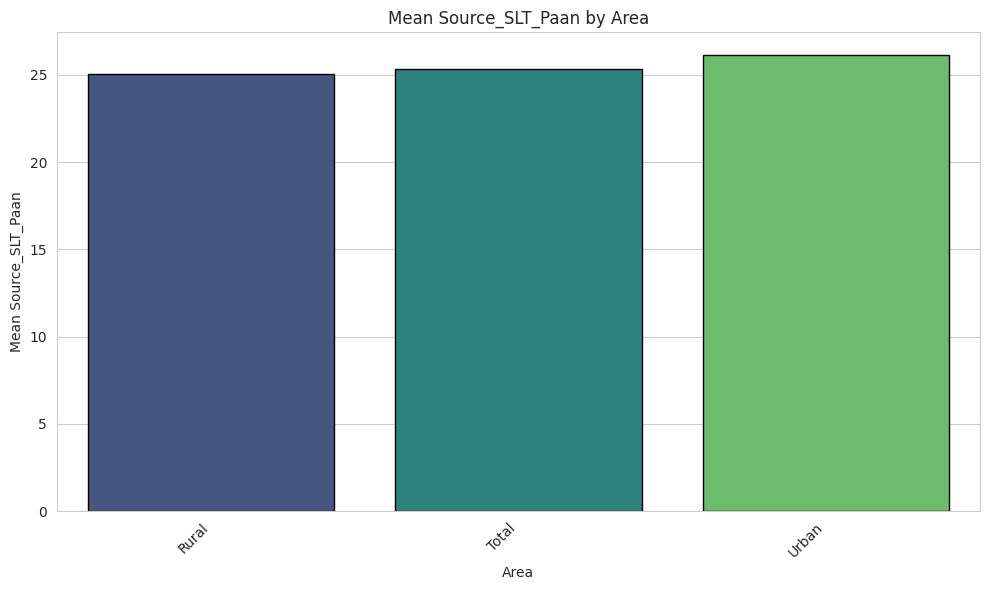

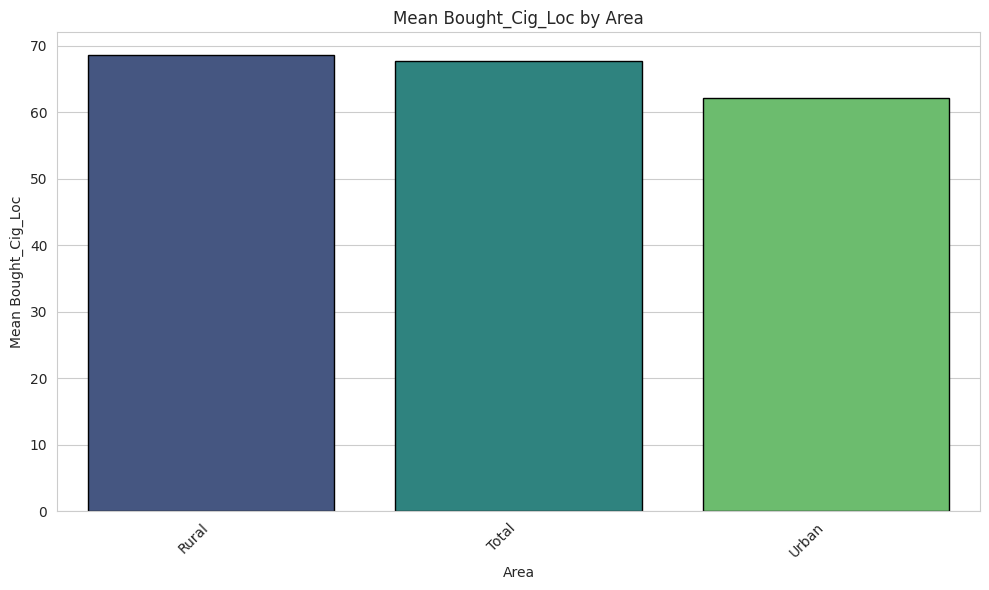

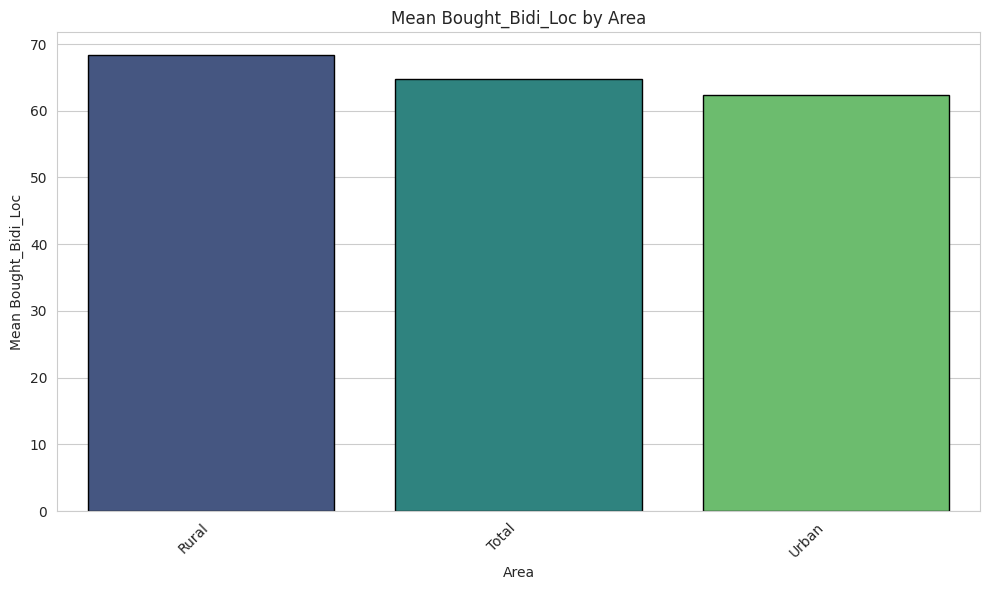

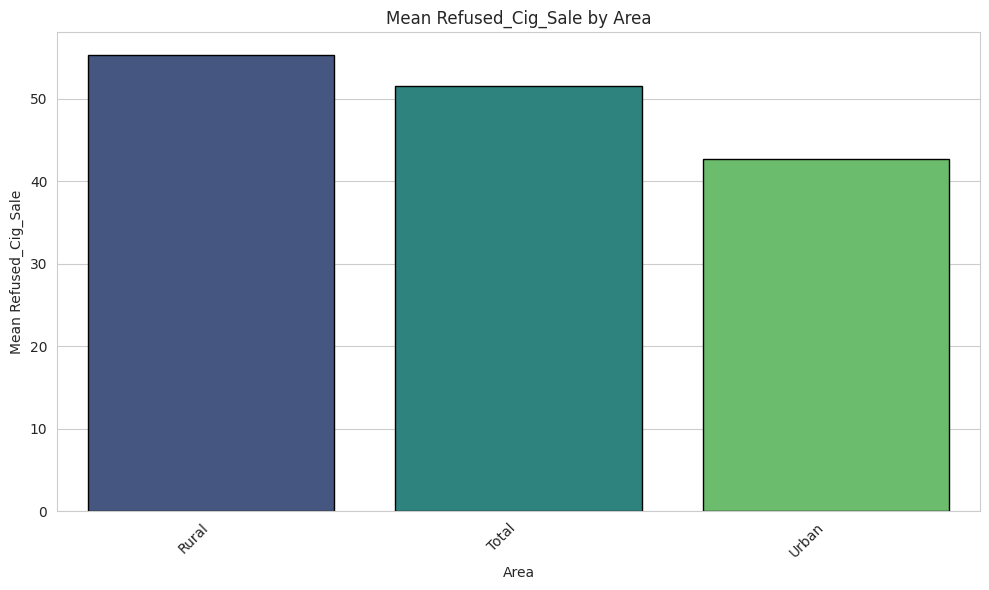

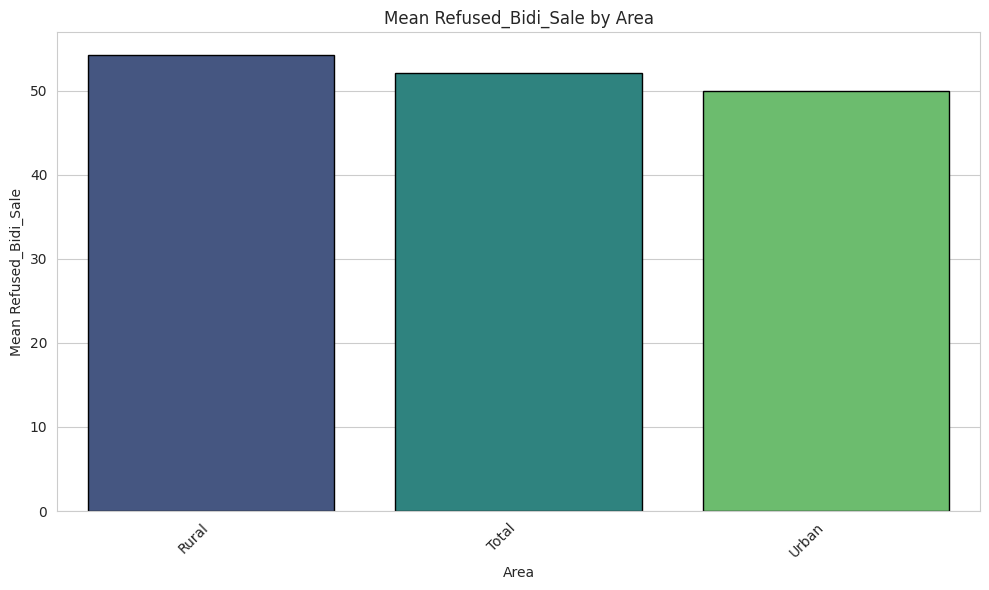

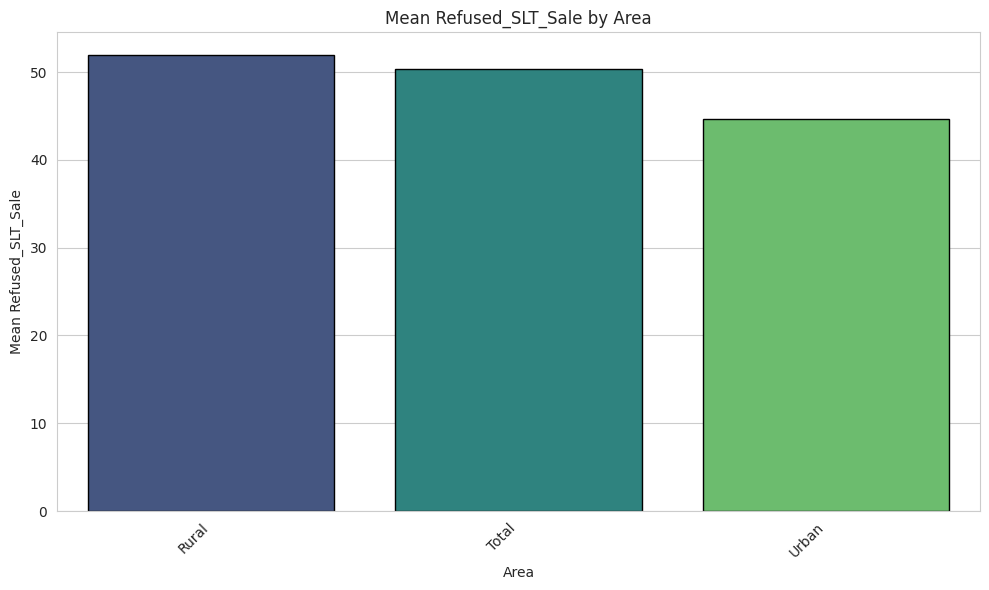

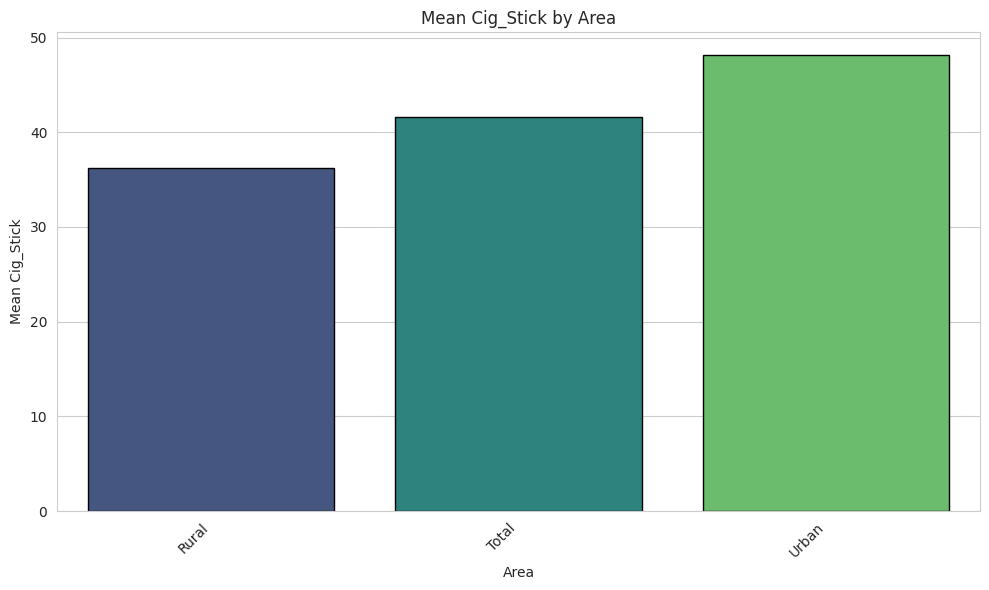

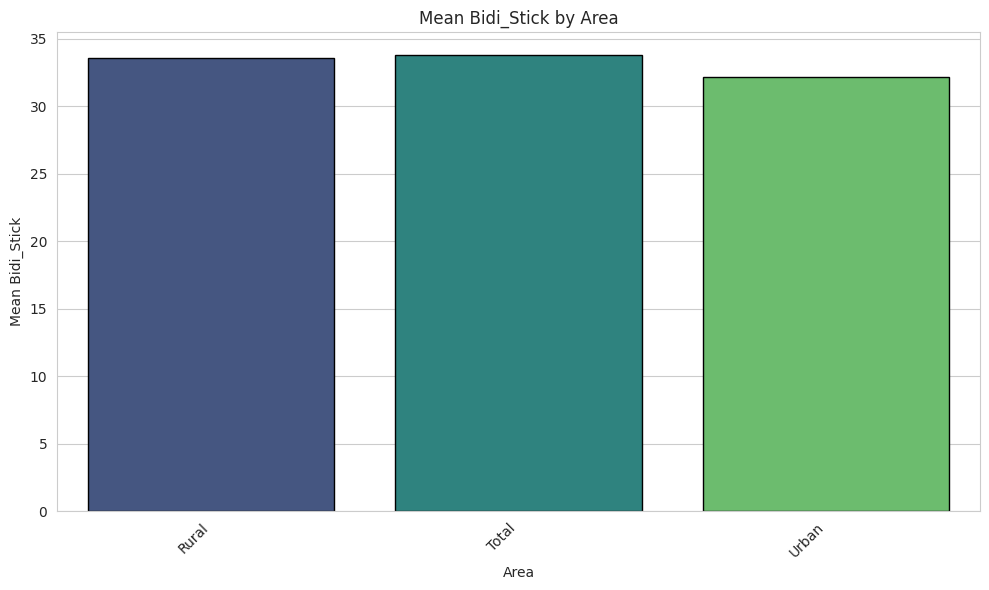

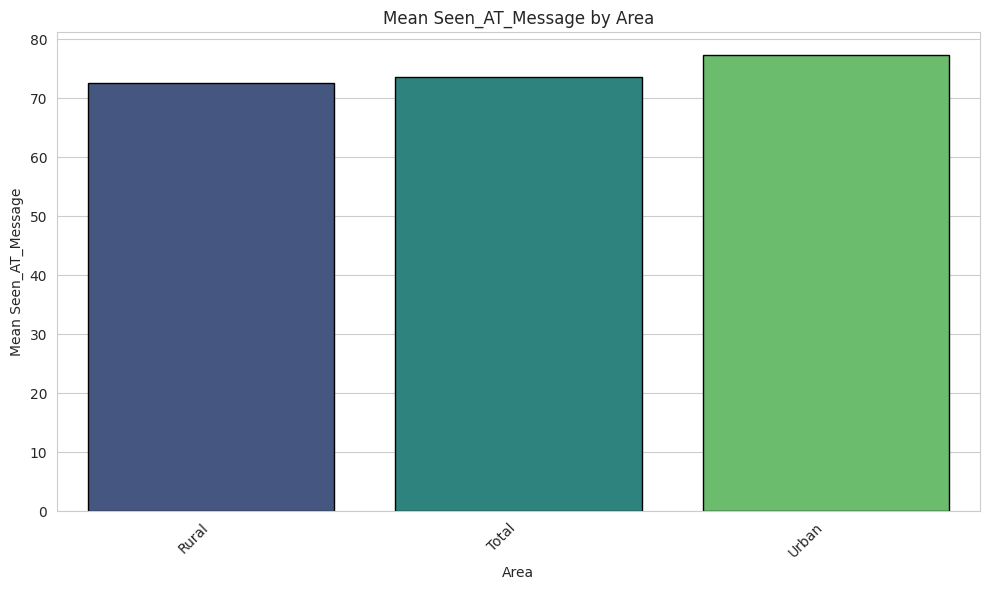

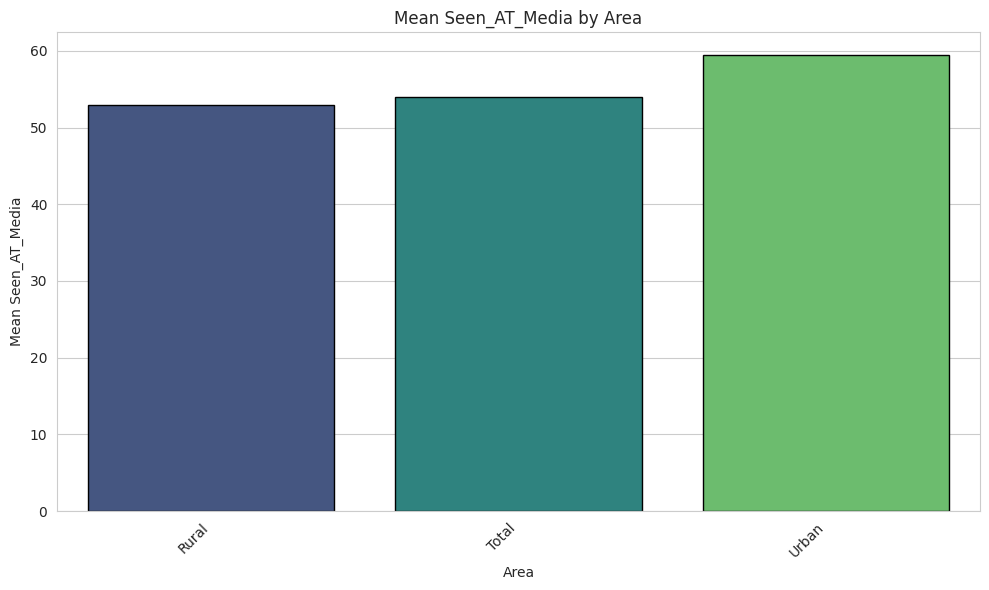

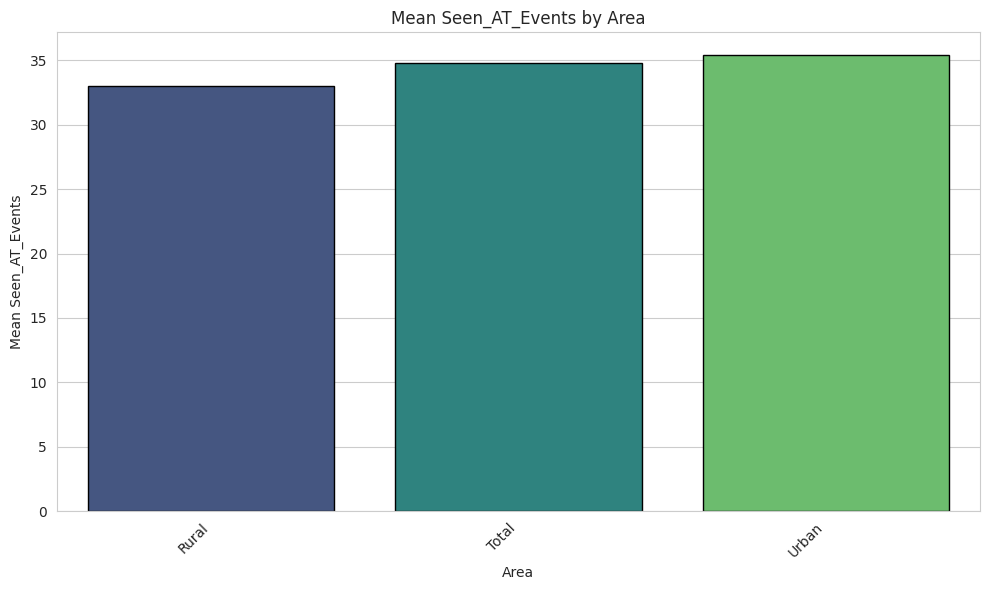

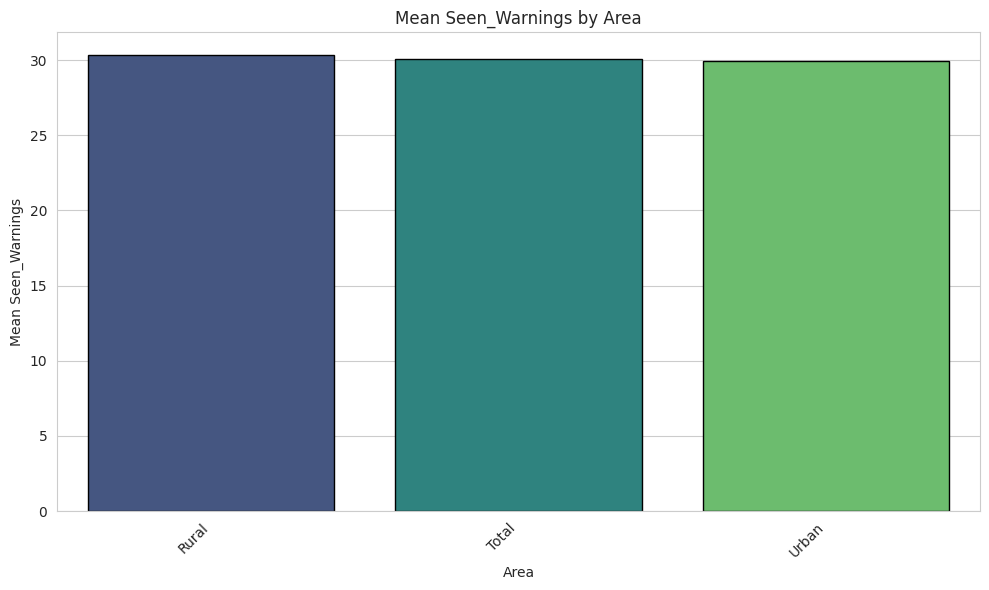

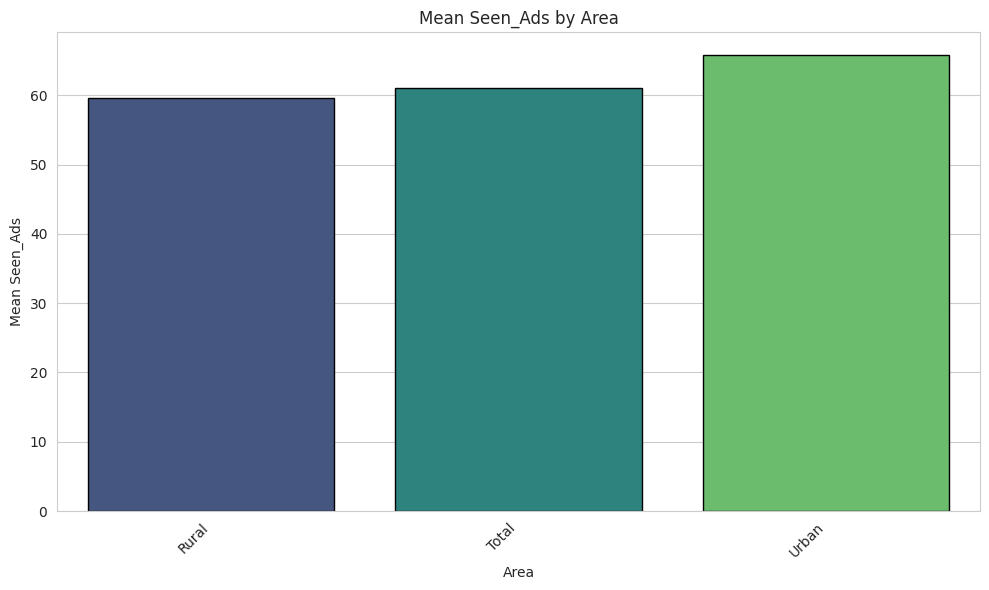

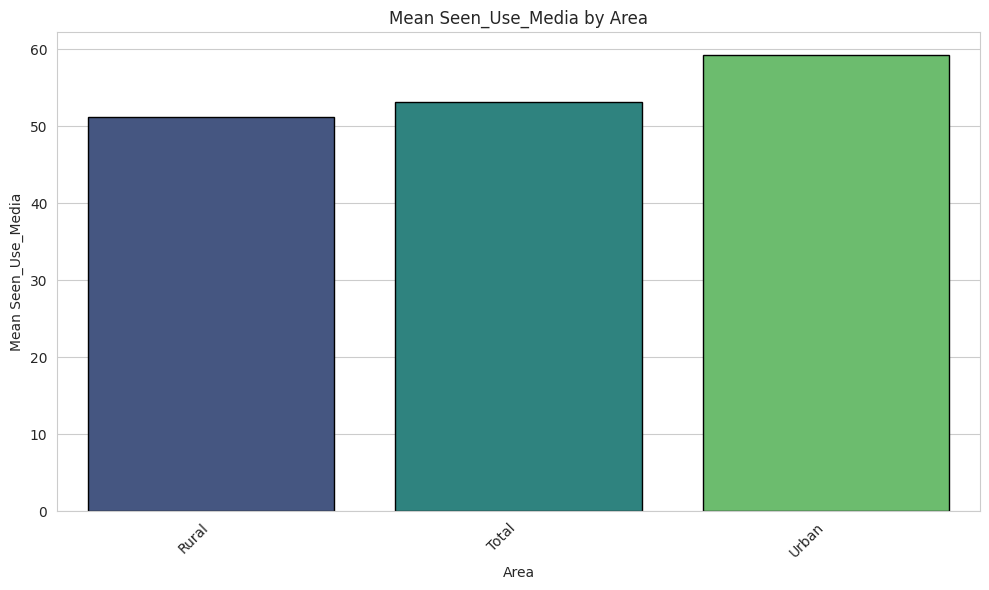

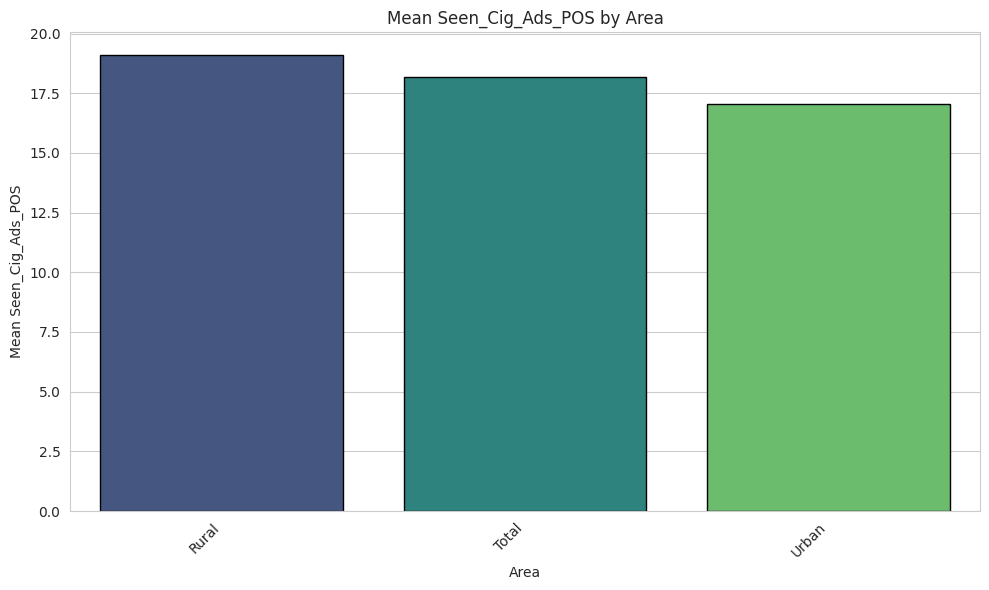

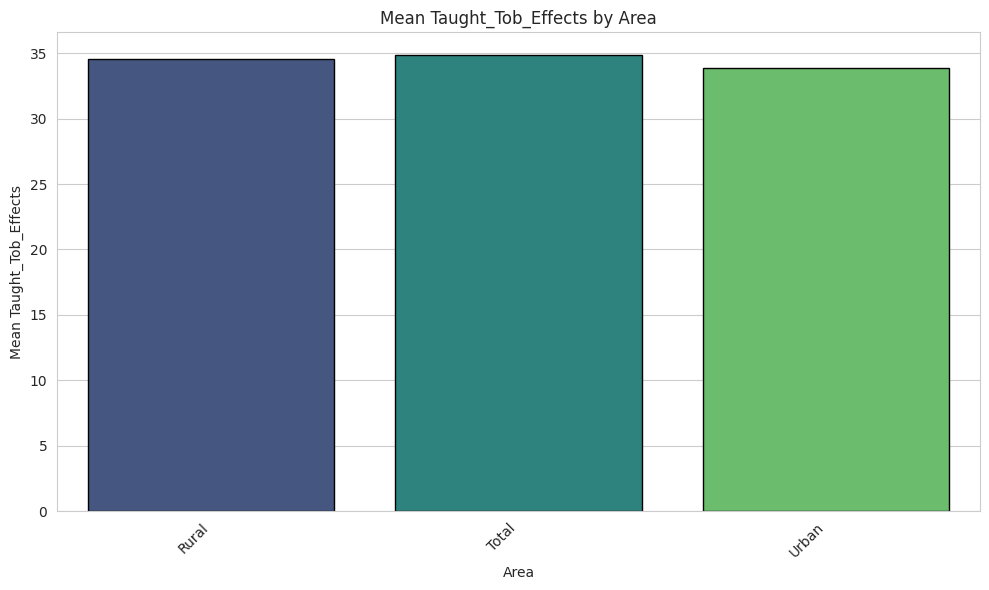

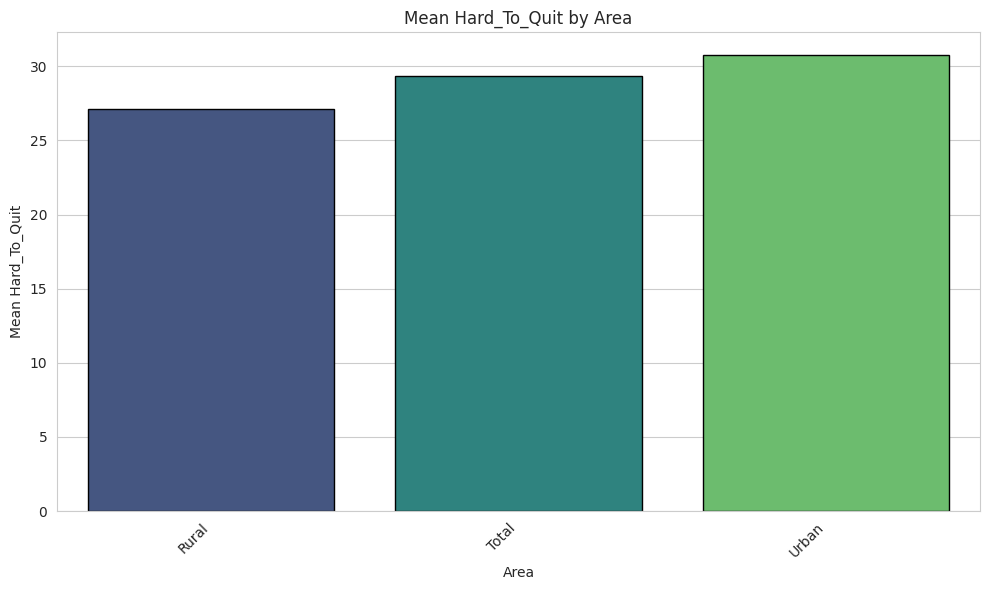

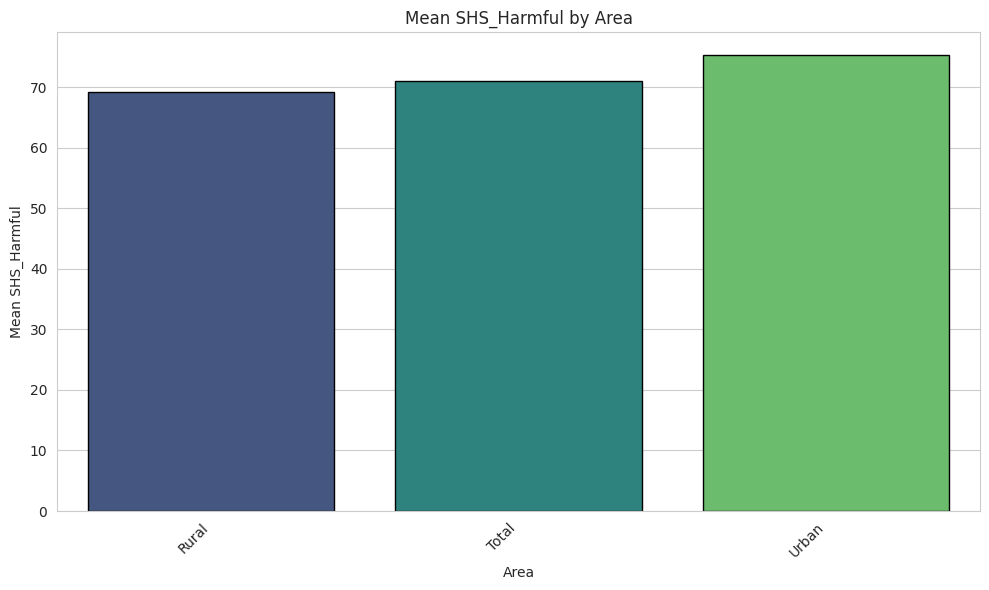

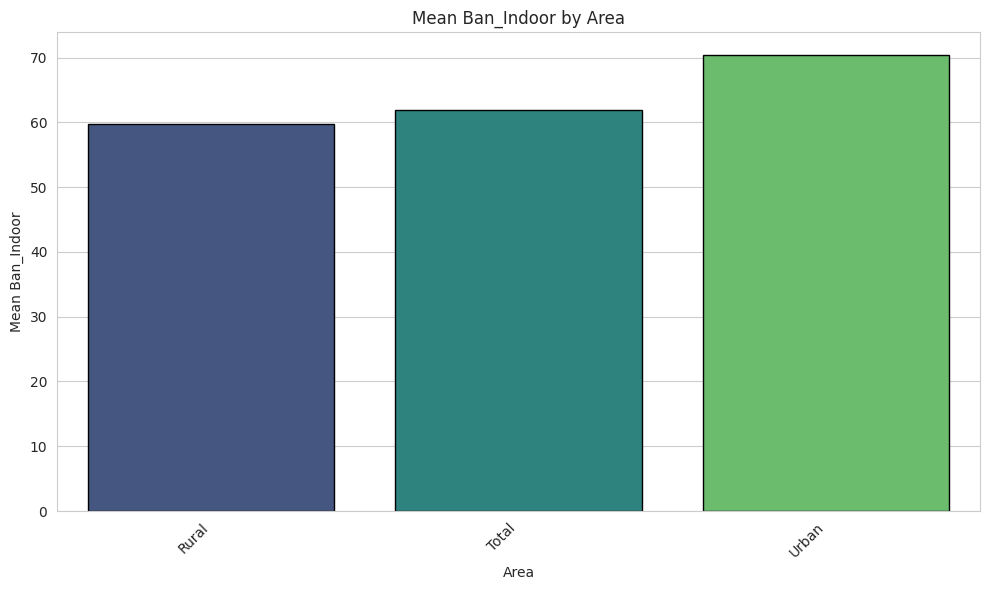

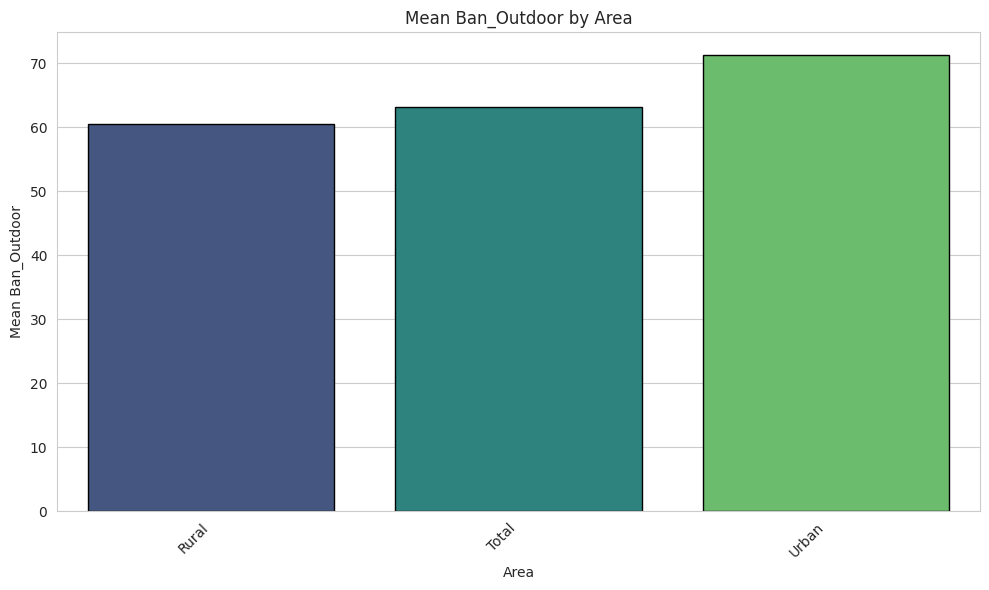

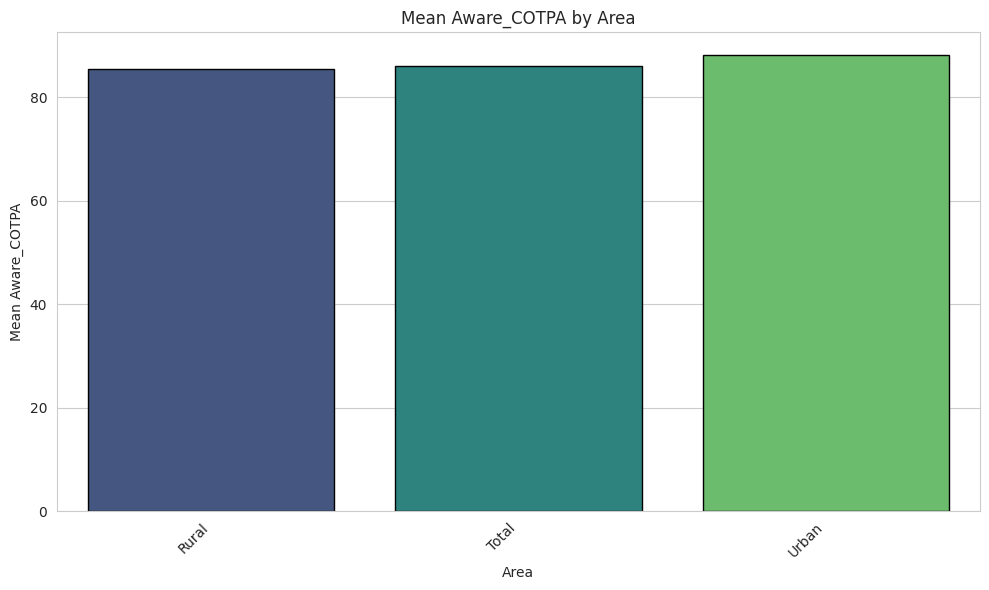

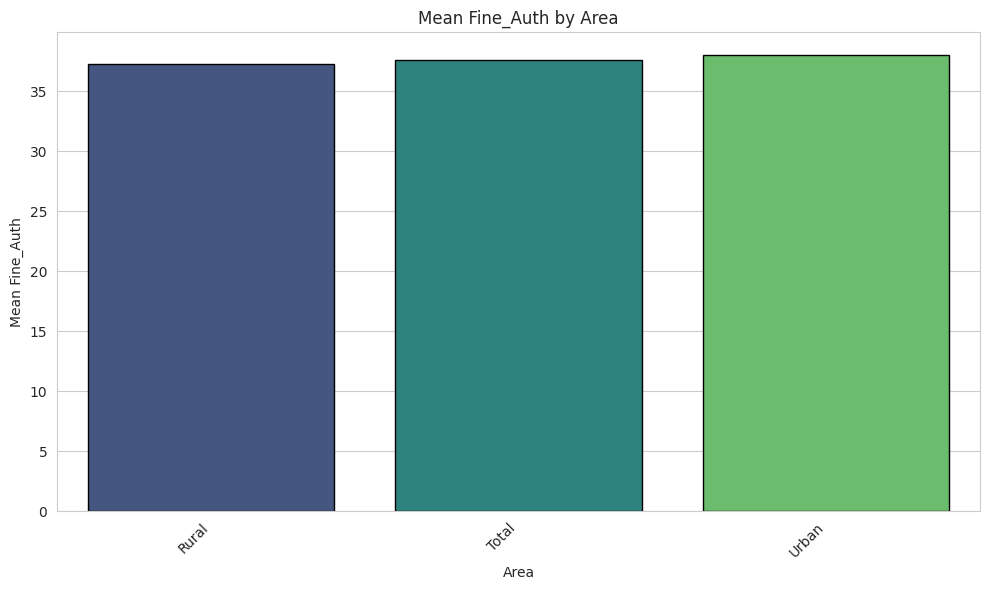

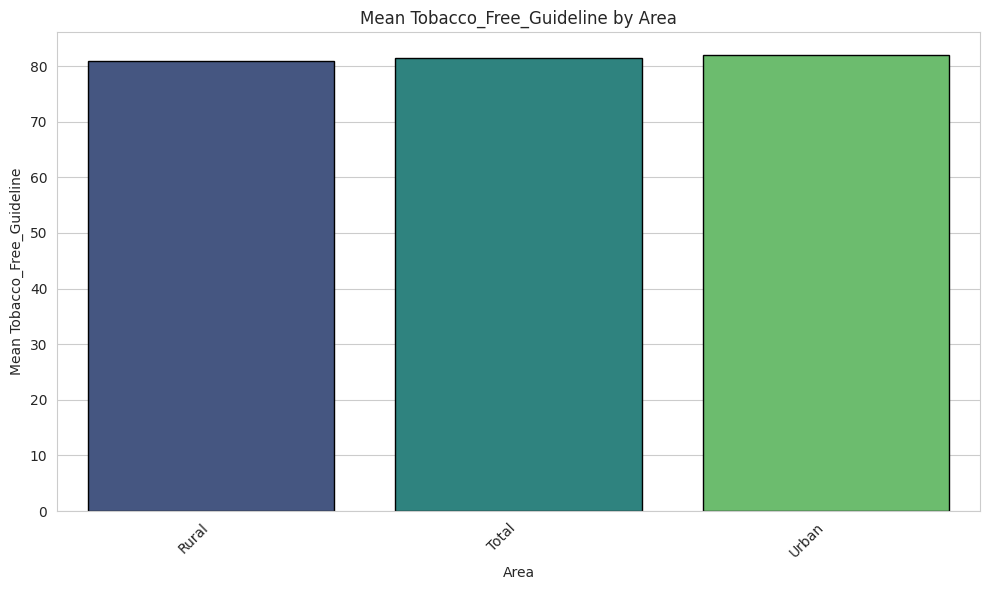

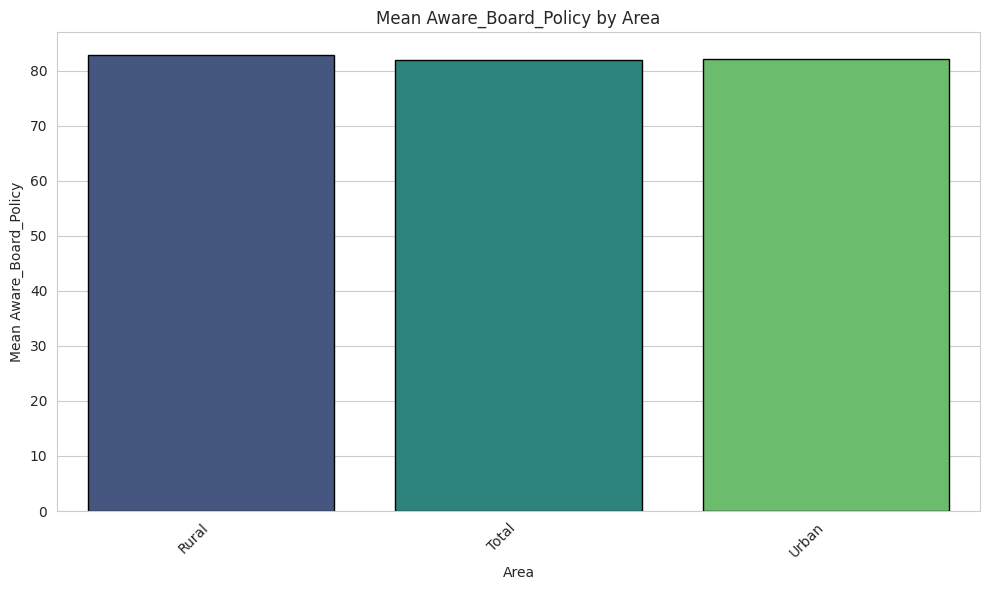

In [95]:
classifi_ar=df.groupby("Area")[[
    'Ever_Tob_Use', 'Curr_Tob_Use',
       'Ever_Smoke', 'Curr_Smoke', 'Ever_Cig', 'Curr_Cig', 'Ever_Bidi',
       'Curr_Bidi', 'Ever_SLT', 'Curr_SLT', 'Ever_PM_Tob', 'Suscept_Cig',
       'Age_Init_Cig', 'Age_Init_Bidi', 'Age_Init_SLT', 'E_Cig_Aware',
       'E_Cig_Ever', 'Quit_Smoke_12mo', 'TryQuit_Smoke_12mo', 'WantQuit_Smoke',
       'Quit_SLT_12mo', 'TryQuit_SLT_12mo', 'WantQuit_SLT', 'Smoke_Exposure',
       'Smoke_Home', 'Smoke_Enclosed', 'Smoke_Outdoor', 'Seen_Smoke_School',
       'Source_Cig_Store', 'Source_Cig_Paan', 'Source_Bidi_Store',
       'Source_Bidi_Paan', 'Source_SLT_Store', 'Source_SLT_Paan',
       'Bought_Cig_Loc', 'Bought_Bidi_Loc', 'Refused_Cig_Sale',
       'Refused_Bidi_Sale', 'Refused_SLT_Sale', 'Cig_Stick', 'Bidi_Stick',
       'Seen_AT_Message', 'Seen_AT_Media', 'Seen_AT_Events', 'Seen_Warnings',
       'Seen_Ads', 'Seen_Use_Media', 'Seen_Cig_Ads_POS', 'Taught_Tob_Effects',
       'Hard_To_Quit', 'SHS_Harmful', 'Ban_Indoor', 'Ban_Outdoor',
       'Aware_COTPA', 'Fine_Auth', 'Tobacco_Free_Guideline',
       'Aware_Board_Policy'
]].mean().reset_index()
for col in classifi_ar.columns:
    if col != "Area":
        plt.figure(figsize=(10, 6))
        sns.barplot(data=classifi_ar, x="Area", y=col, palette="viridis",edgecolor="black")
        plt.title(f"Mean {col} by Area")
        plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
        plt.ylabel(f"Mean {col}")
        plt.xlabel("Area")
        plt.tight_layout()
        plt.show()

# Histplot Distribution

In [96]:
df.columns

Index(['Unnamed: 0', 'State', 'Area', 'Ever_Tob_Use', 'Curr_Tob_Use',
       'Ever_Smoke', 'Curr_Smoke', 'Ever_Cig', 'Curr_Cig', 'Ever_Bidi',
       'Curr_Bidi', 'Ever_SLT', 'Curr_SLT', 'Ever_PM_Tob', 'Suscept_Cig',
       'Age_Init_Cig', 'Age_Init_Bidi', 'Age_Init_SLT', 'E_Cig_Aware',
       'E_Cig_Ever', 'Quit_Smoke_12mo', 'TryQuit_Smoke_12mo', 'WantQuit_Smoke',
       'Quit_SLT_12mo', 'TryQuit_SLT_12mo', 'WantQuit_SLT', 'Smoke_Exposure',
       'Smoke_Home', 'Smoke_Enclosed', 'Smoke_Outdoor', 'Seen_Smoke_School',
       'Source_Cig_Store', 'Source_Cig_Paan', 'Source_Bidi_Store',
       'Source_Bidi_Paan', 'Source_SLT_Store', 'Source_SLT_Paan',
       'Bought_Cig_Loc', 'Bought_Bidi_Loc', 'Refused_Cig_Sale',
       'Refused_Bidi_Sale', 'Refused_SLT_Sale', 'Cig_Stick', 'Bidi_Stick',
       'Seen_AT_Message', 'Seen_AT_Media', 'Seen_AT_Events', 'Seen_Warnings',
       'Seen_Ads', 'Seen_Use_Media', 'Seen_Cig_Ads_POS', 'Taught_Tob_Effects',
       'Hard_To_Quit', 'SHS_Harmful', 'Ban_Indoor

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              107 non-null    int64  
 1   State                   107 non-null    object 
 2   Area                    107 non-null    object 
 3   Ever_Tob_Use            107 non-null    float64
 4   Curr_Tob_Use            107 non-null    float64
 5   Ever_Smoke              107 non-null    float64
 6   Curr_Smoke              107 non-null    float64
 7   Ever_Cig                107 non-null    float64
 8   Curr_Cig                107 non-null    float64
 9   Ever_Bidi               107 non-null    float64
 10  Curr_Bidi               107 non-null    float64
 11  Ever_SLT                107 non-null    float64
 12  Curr_SLT                107 non-null    float64
 13  Ever_PM_Tob             107 non-null    float64
 14  Suscept_Cig             107 non-null    fl

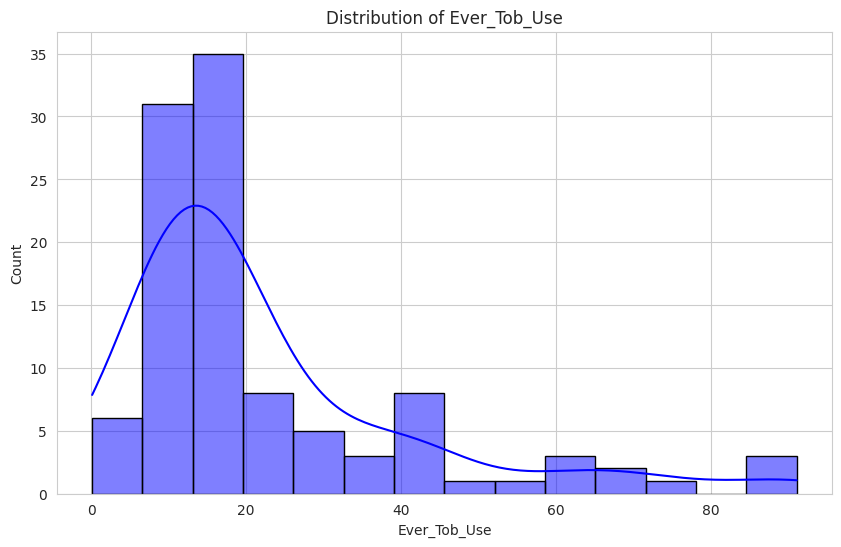

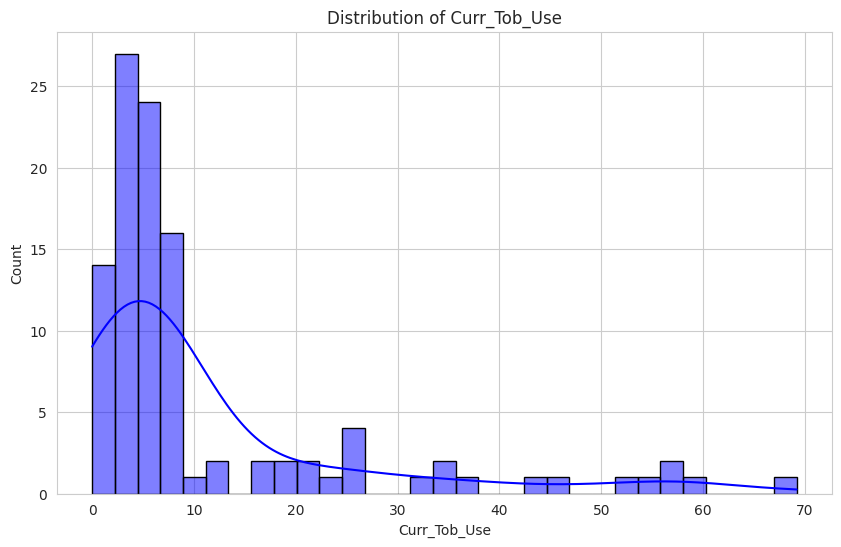

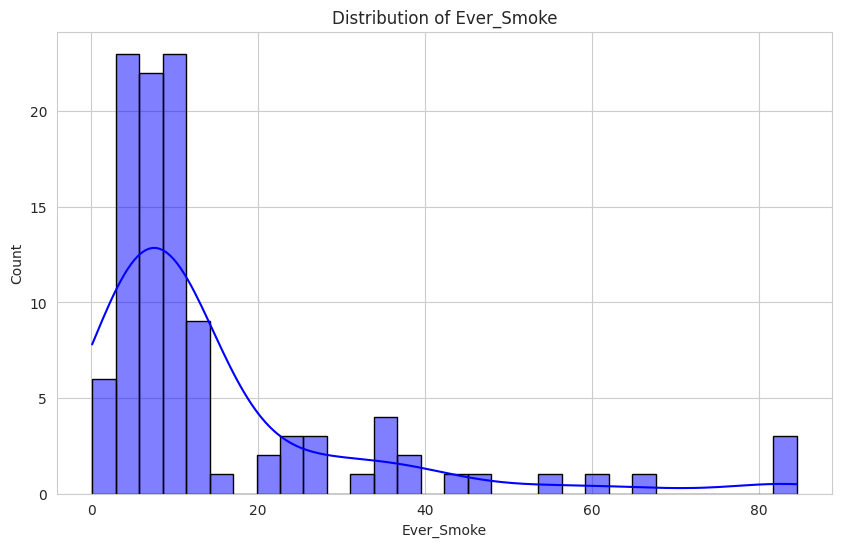

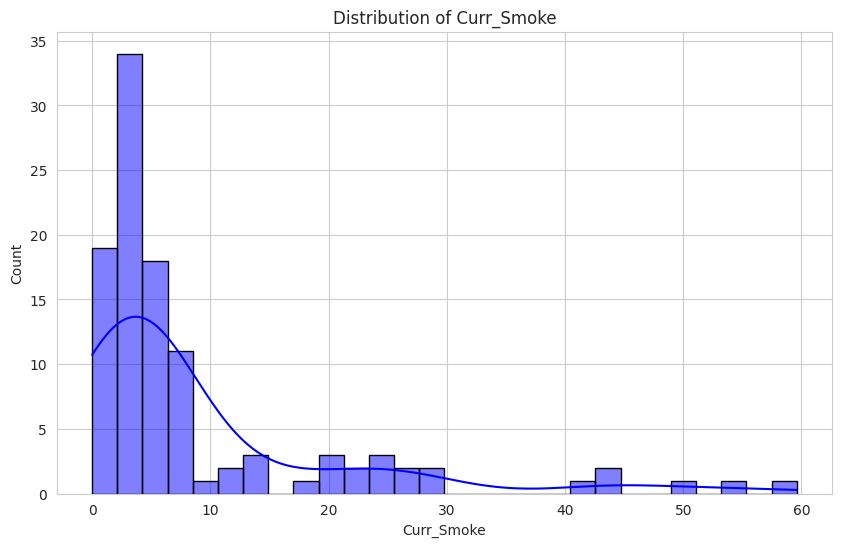

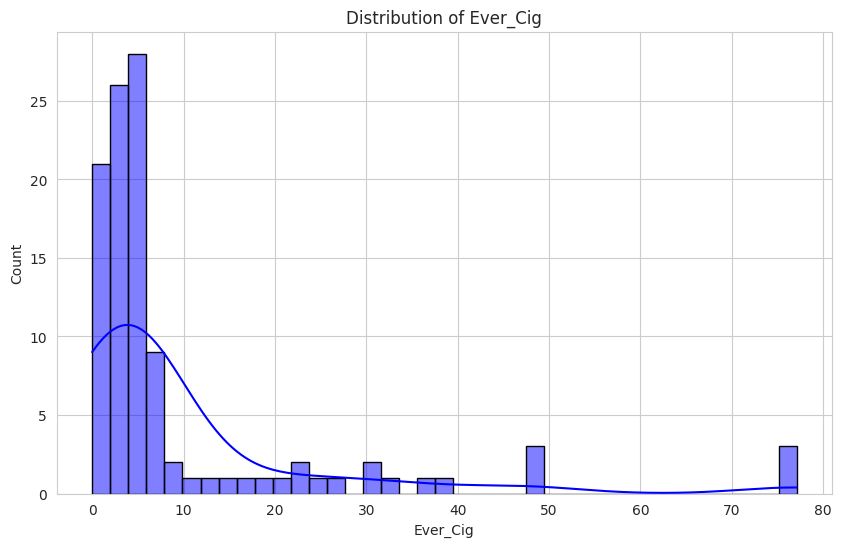

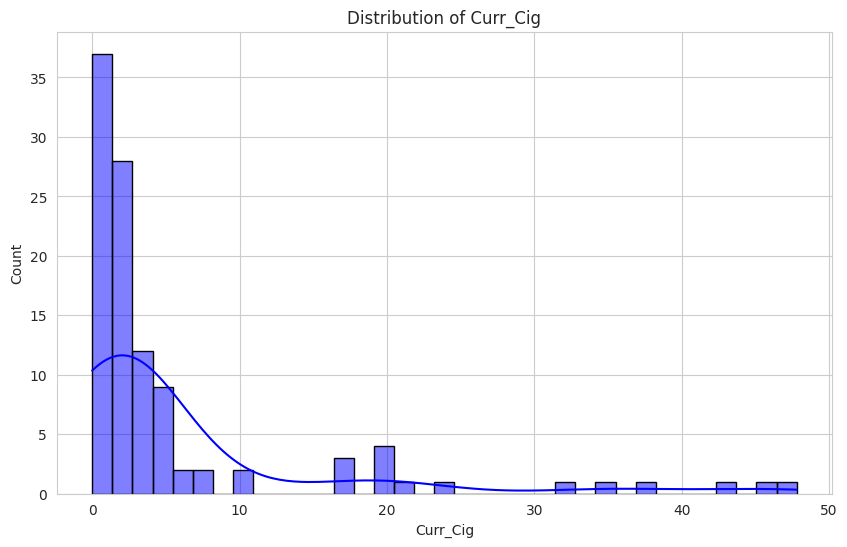

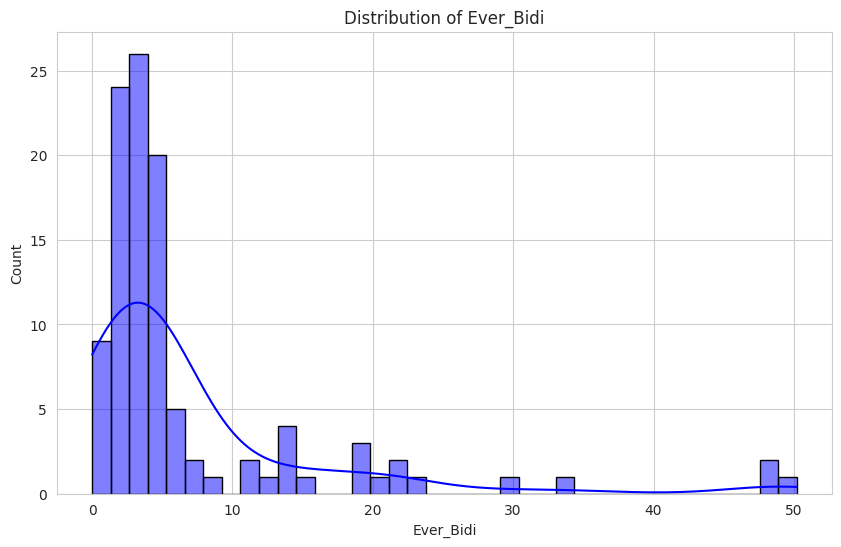

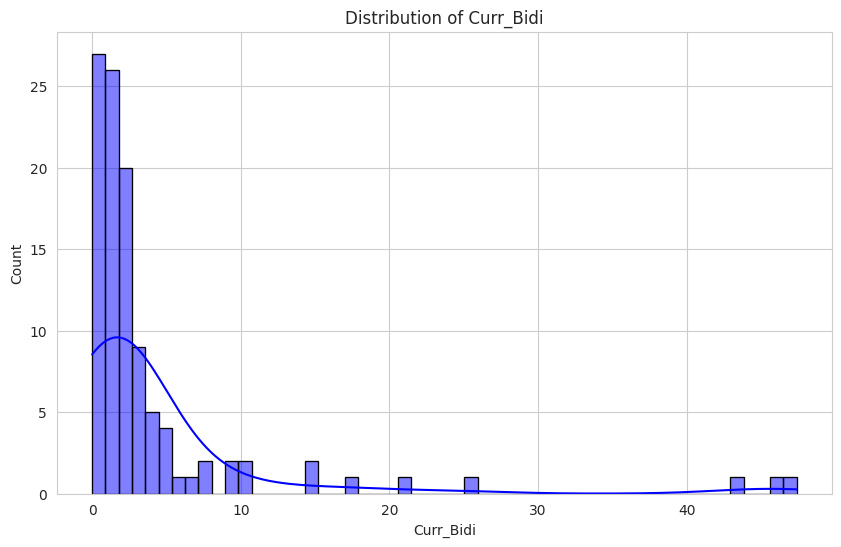

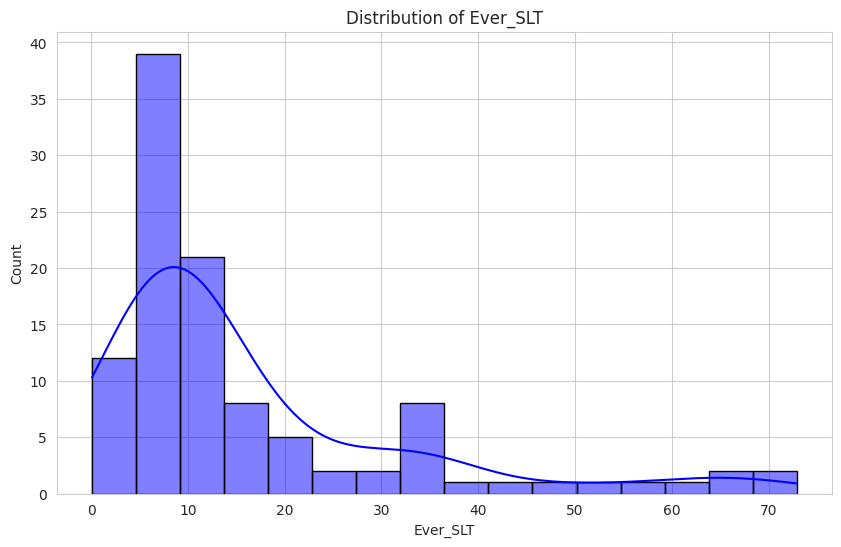

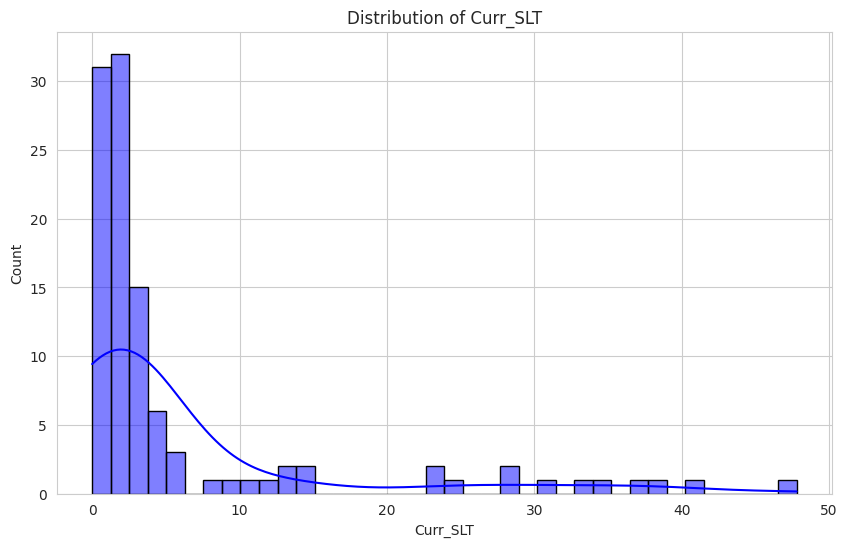

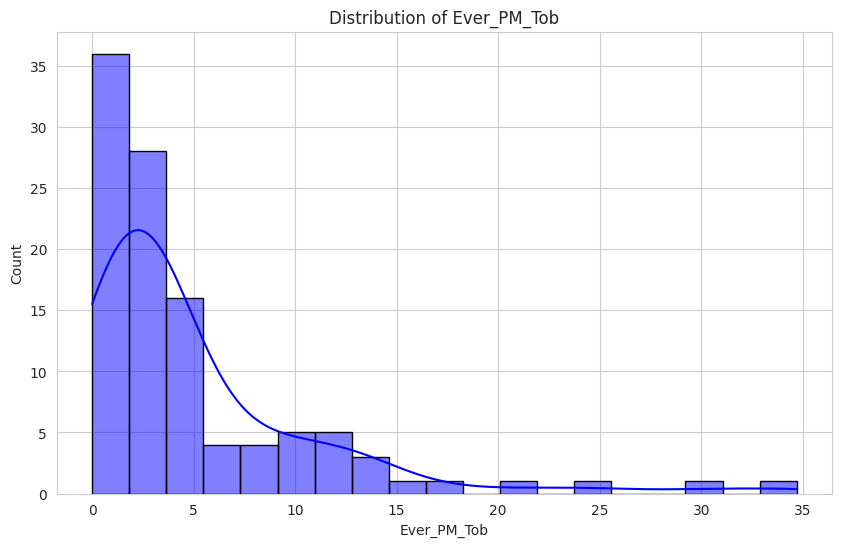

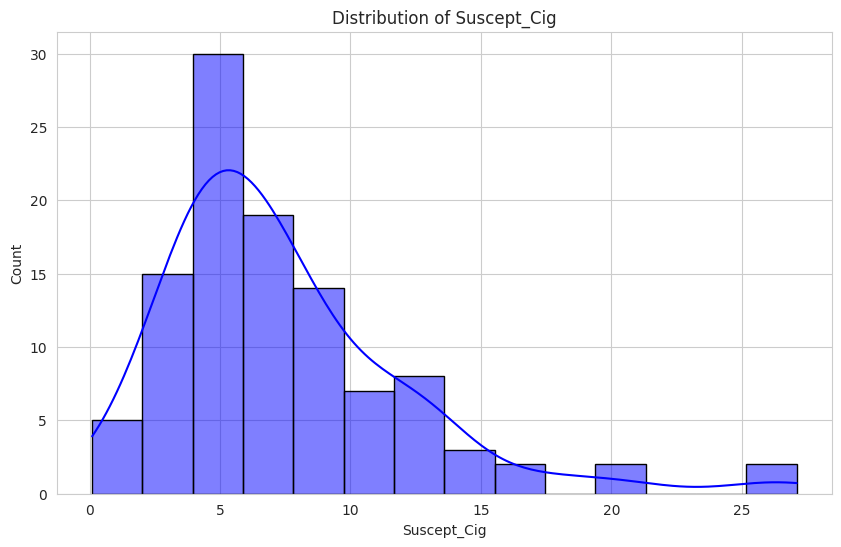

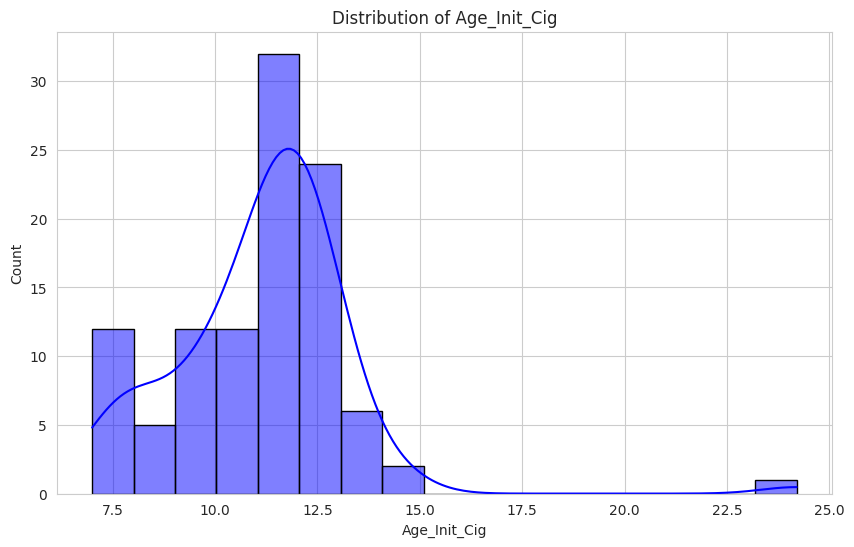

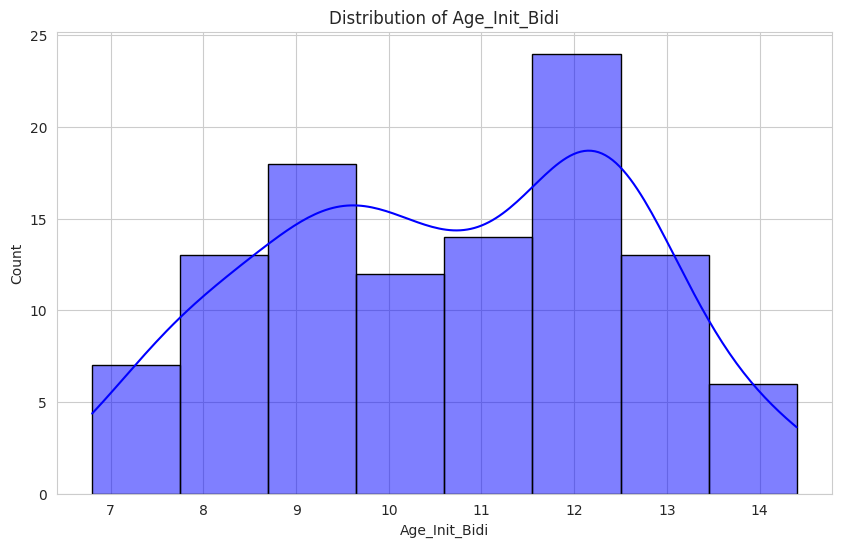

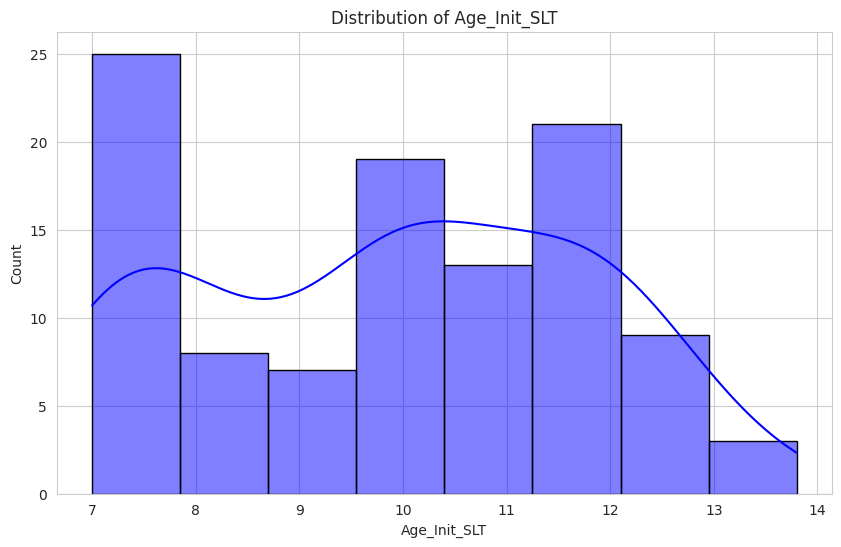

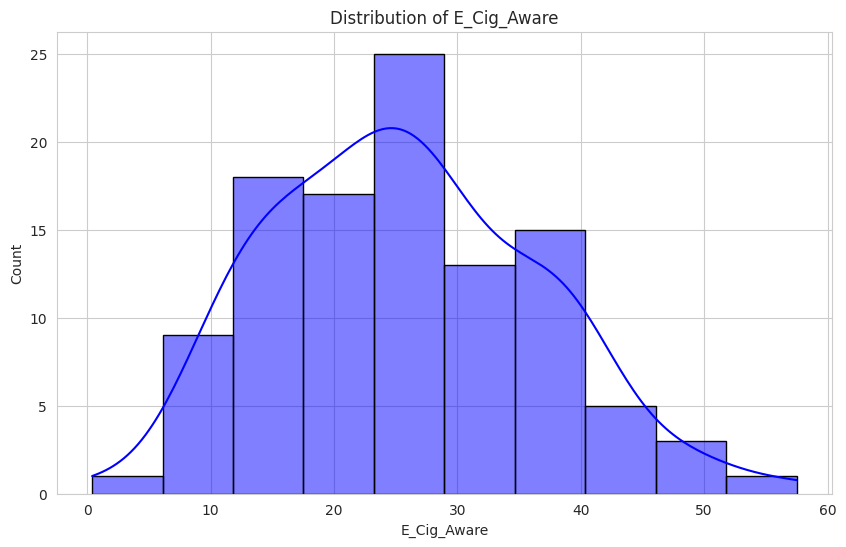

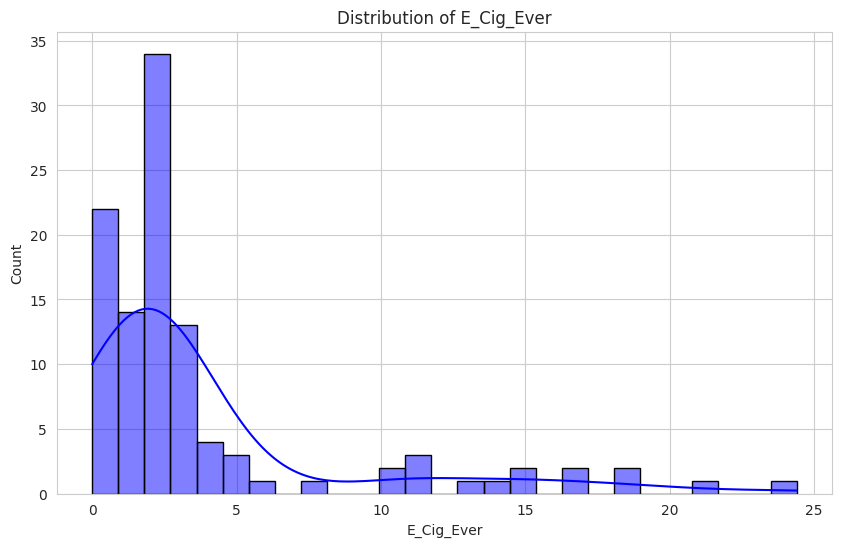

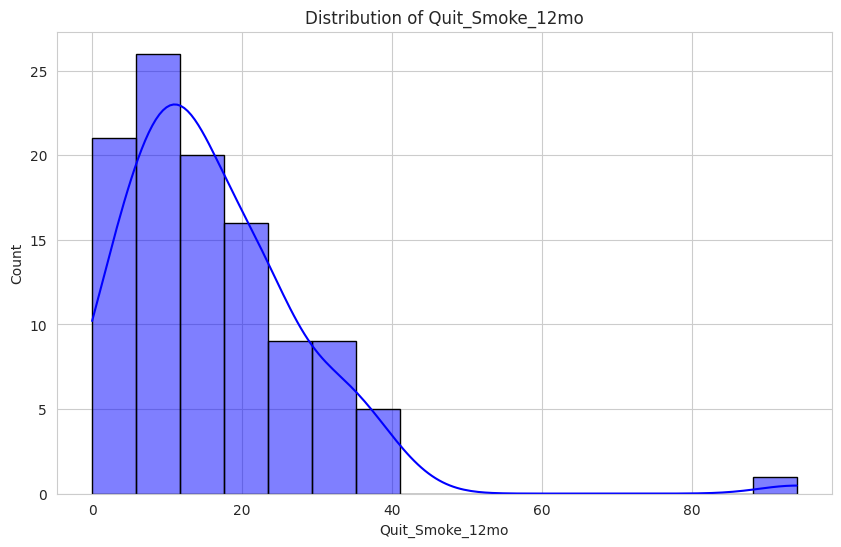

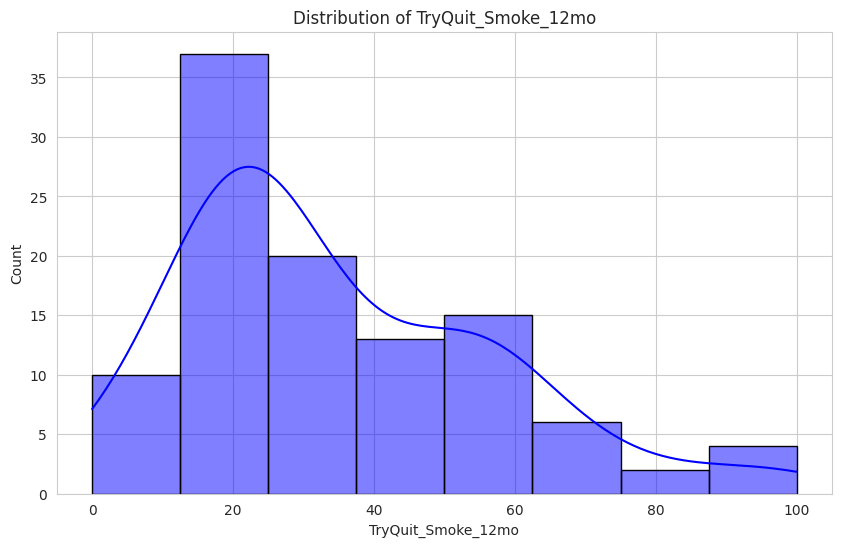

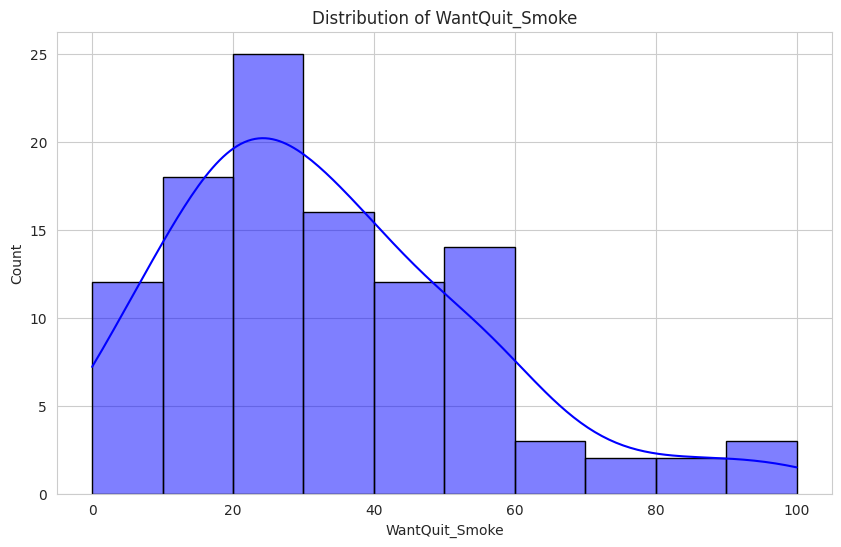

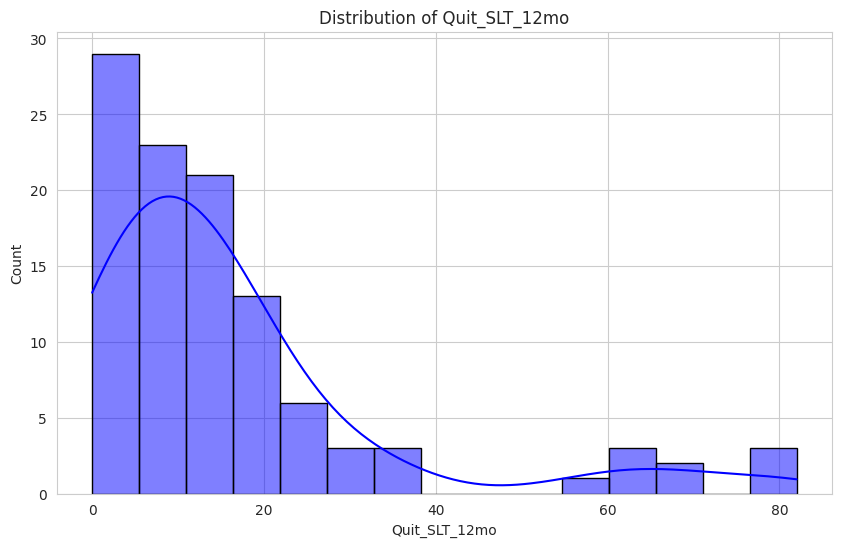

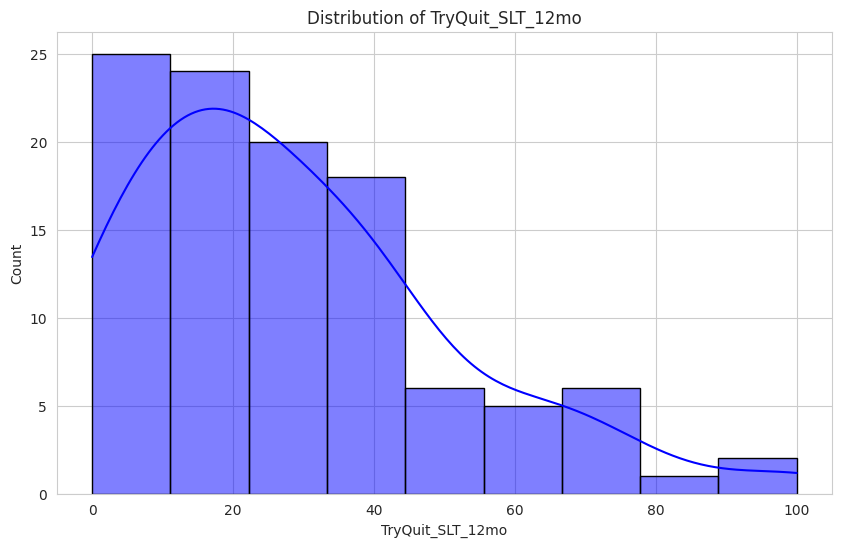

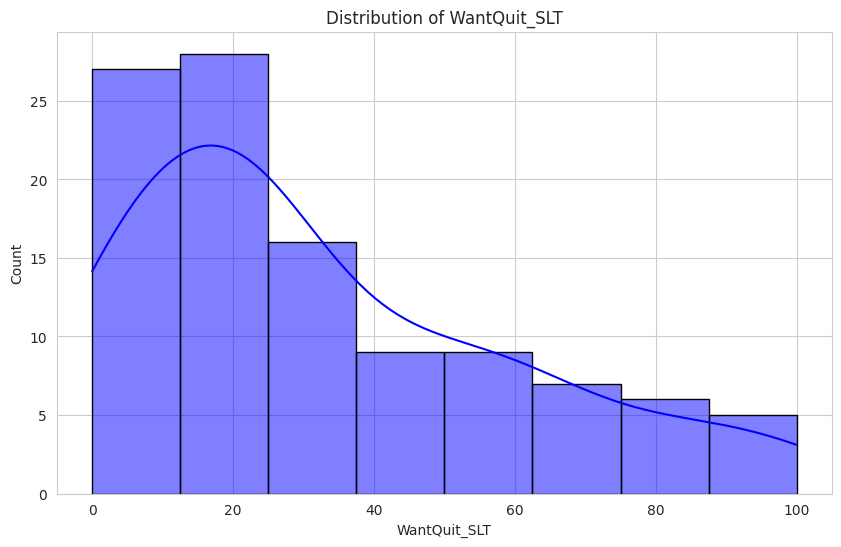

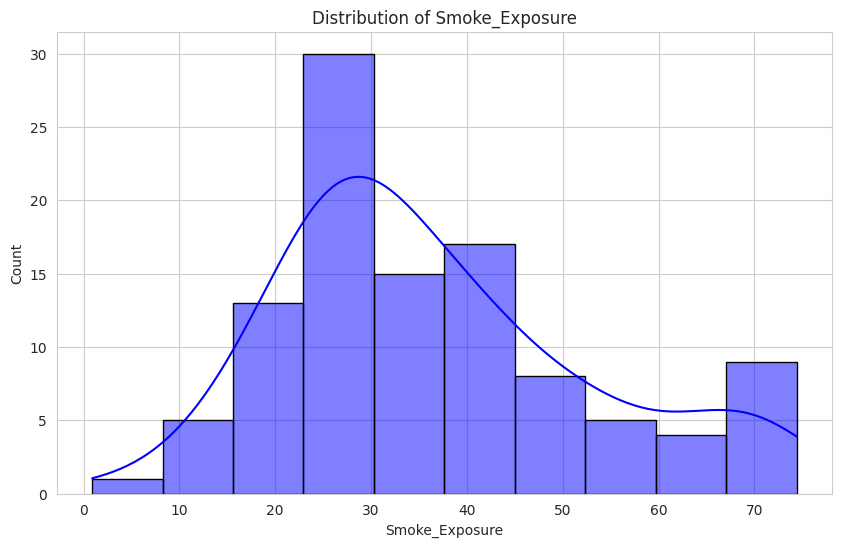

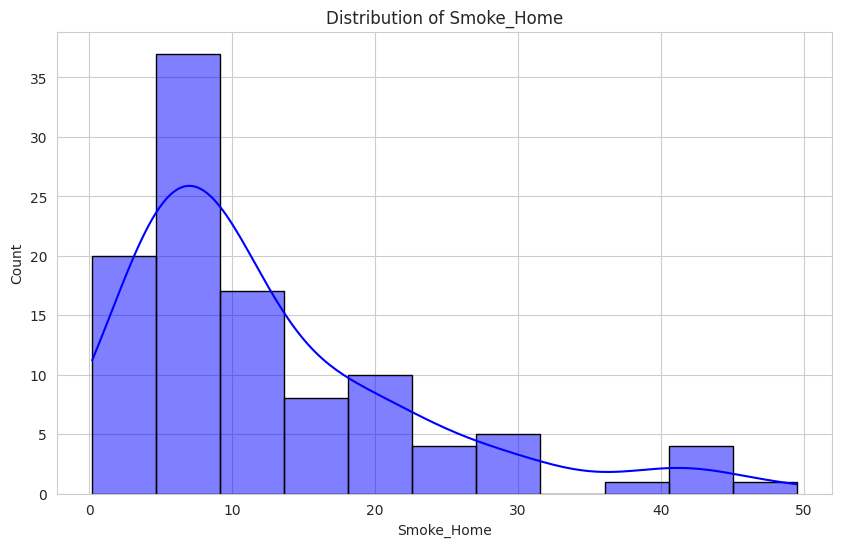

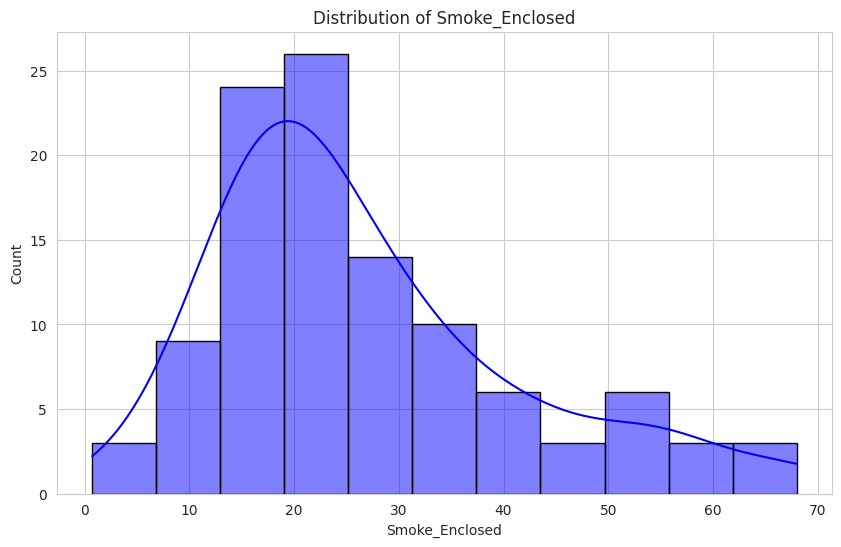

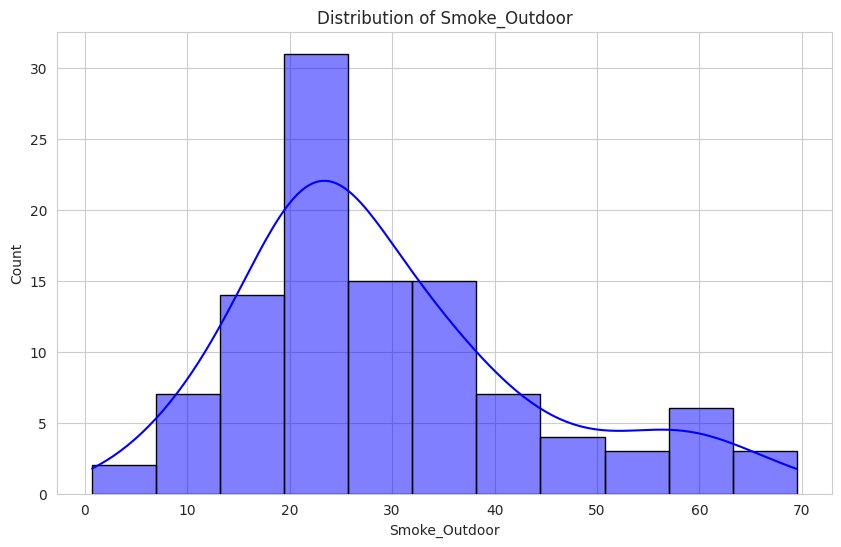

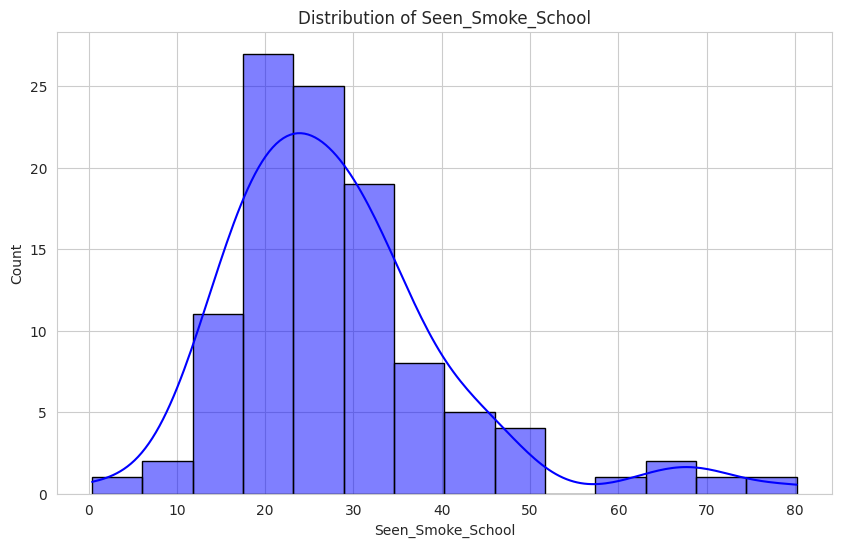

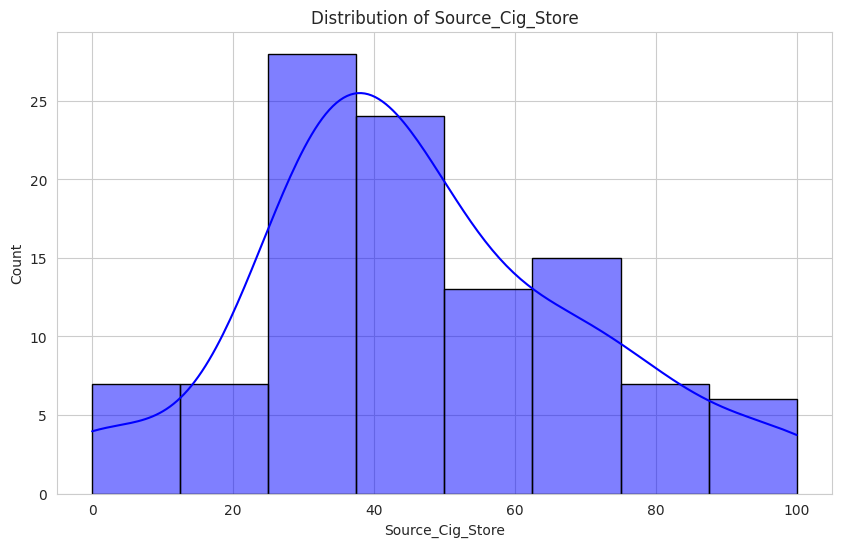

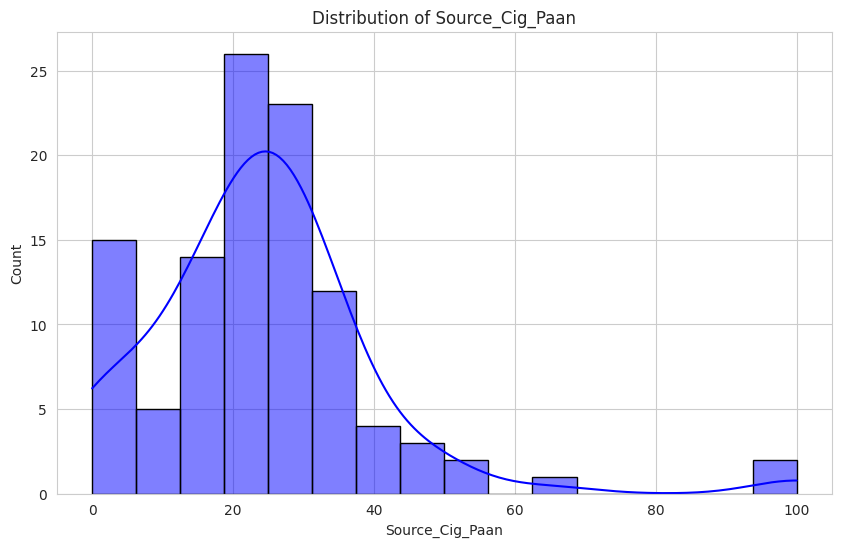

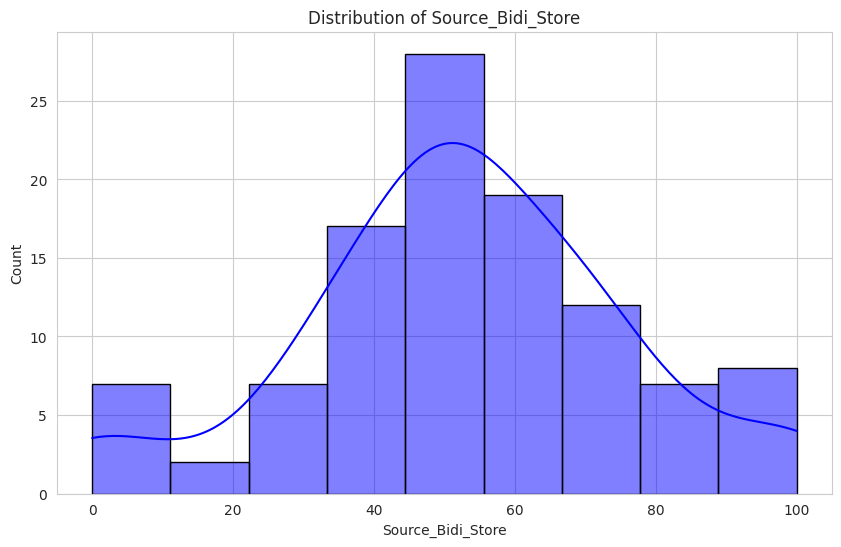

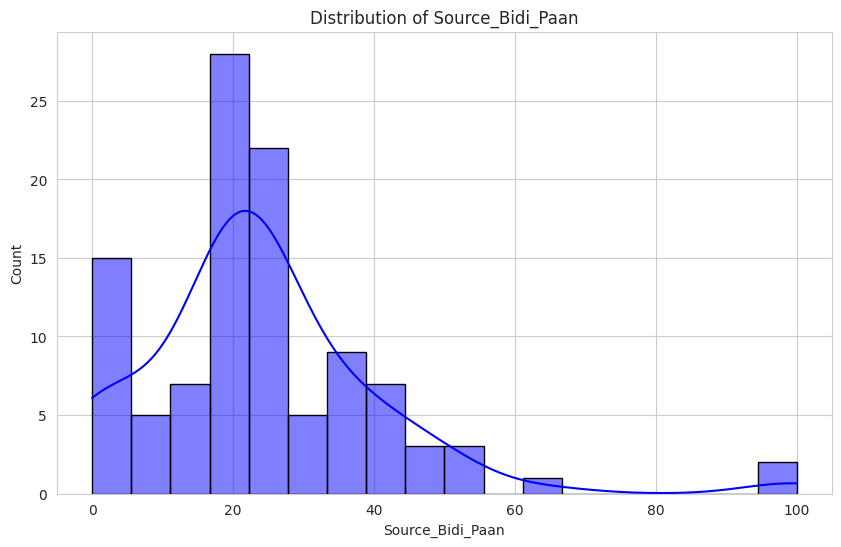

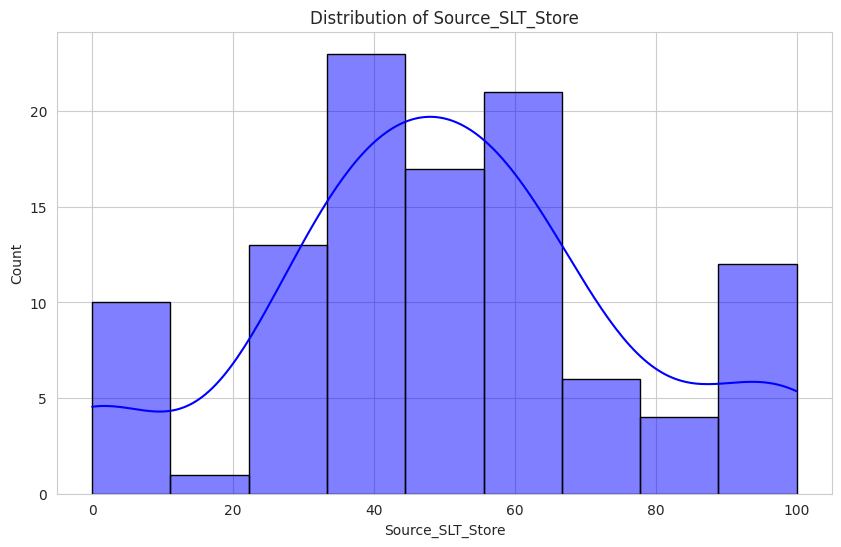

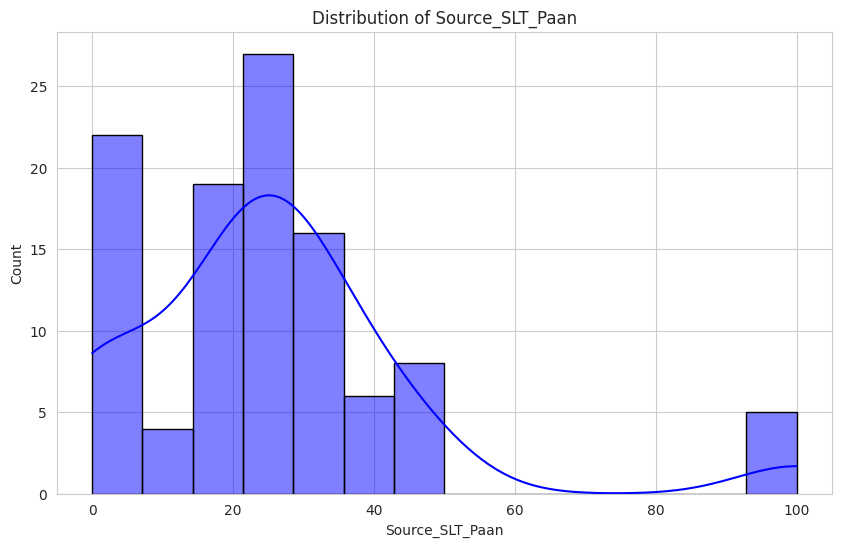

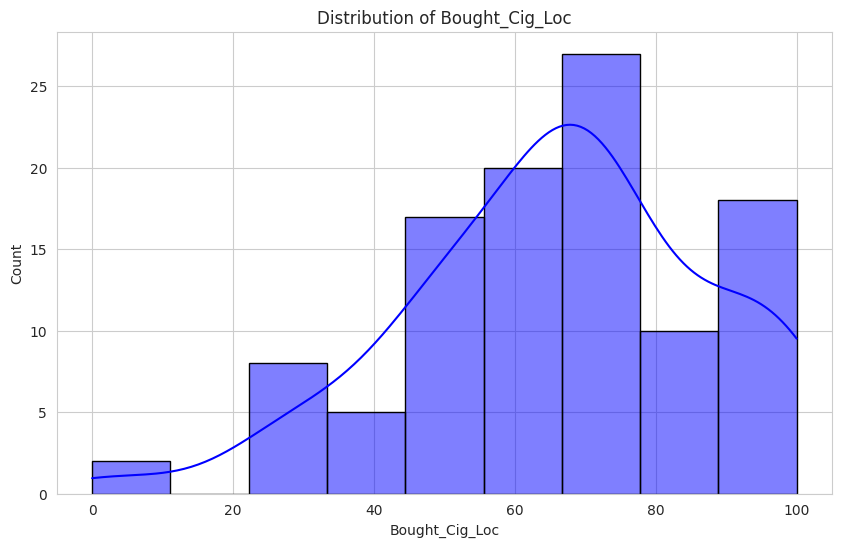

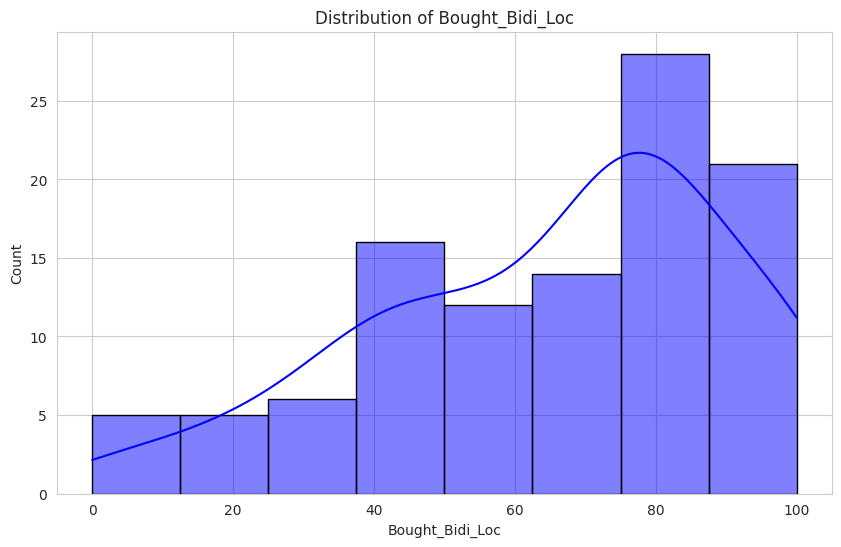

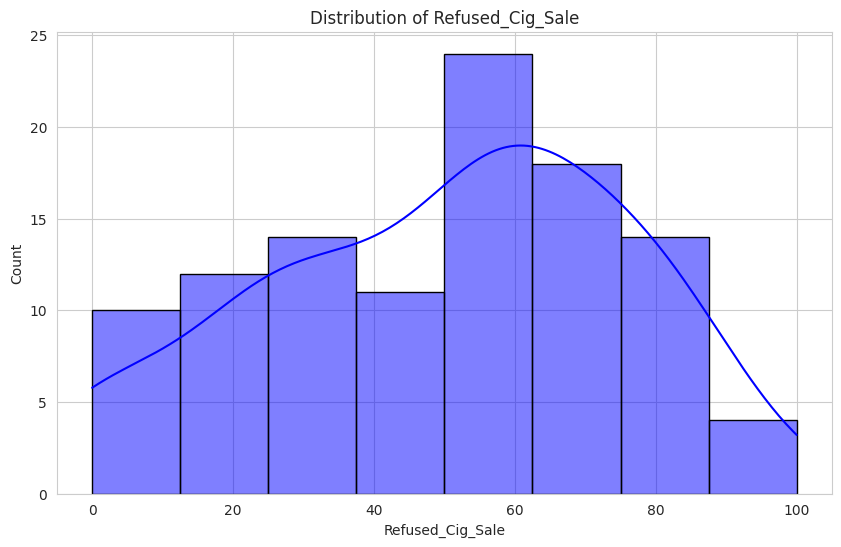

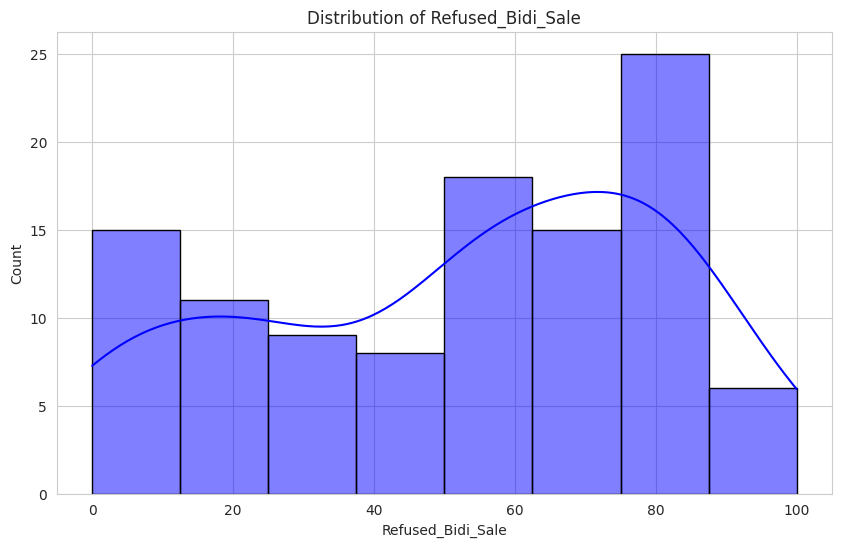

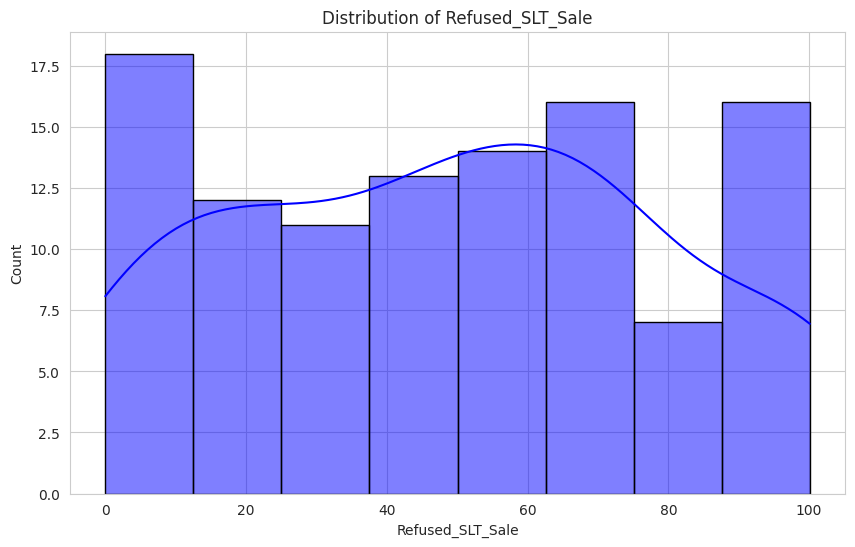

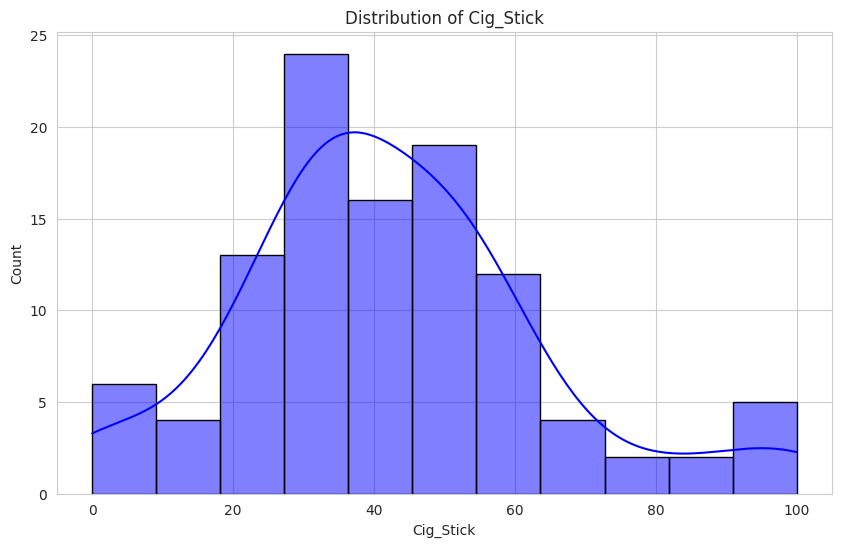

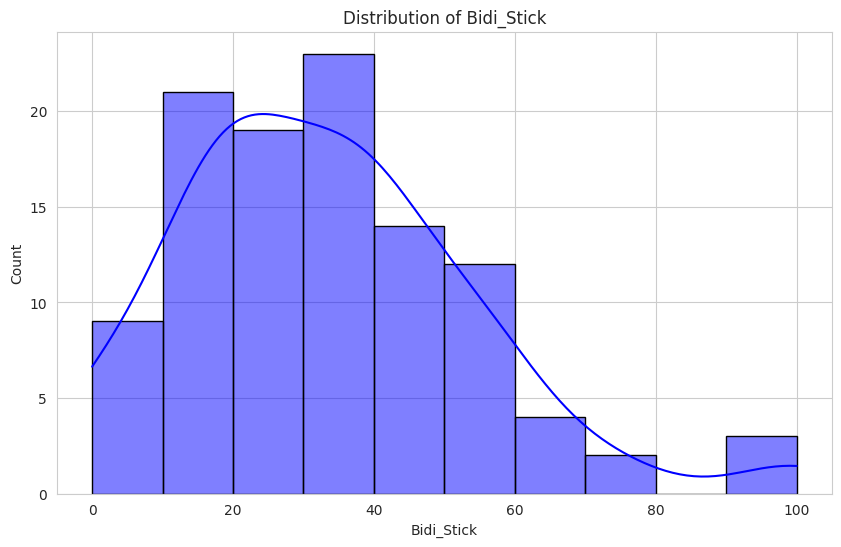

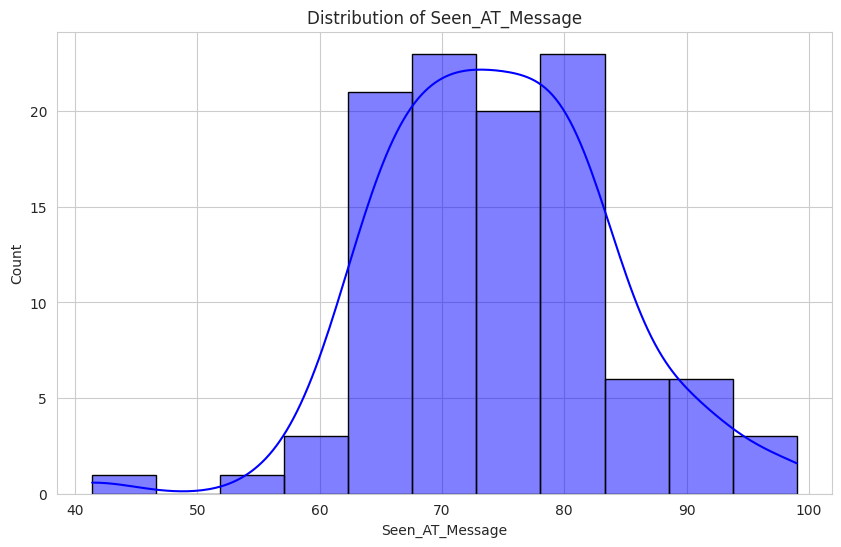

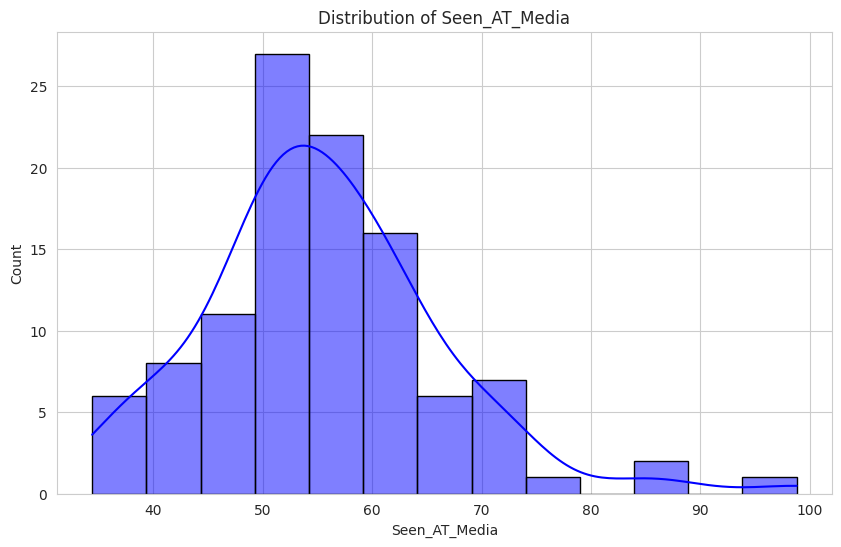

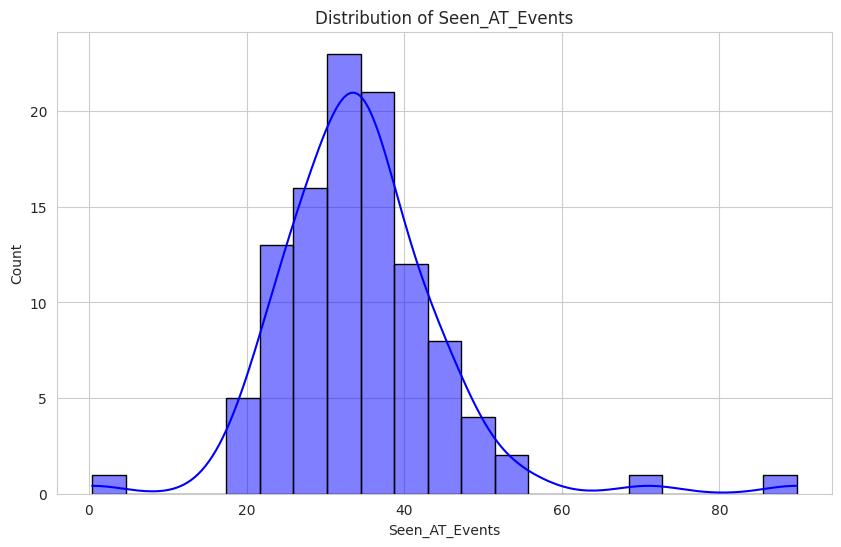

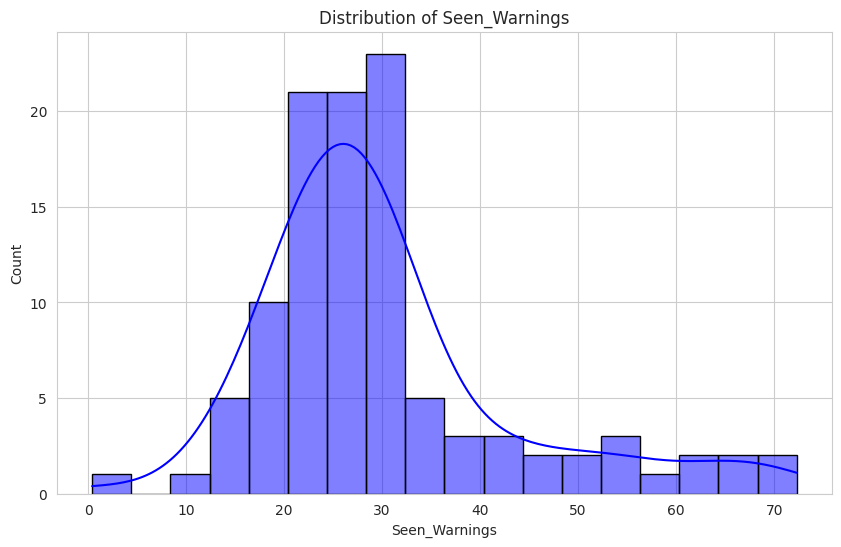

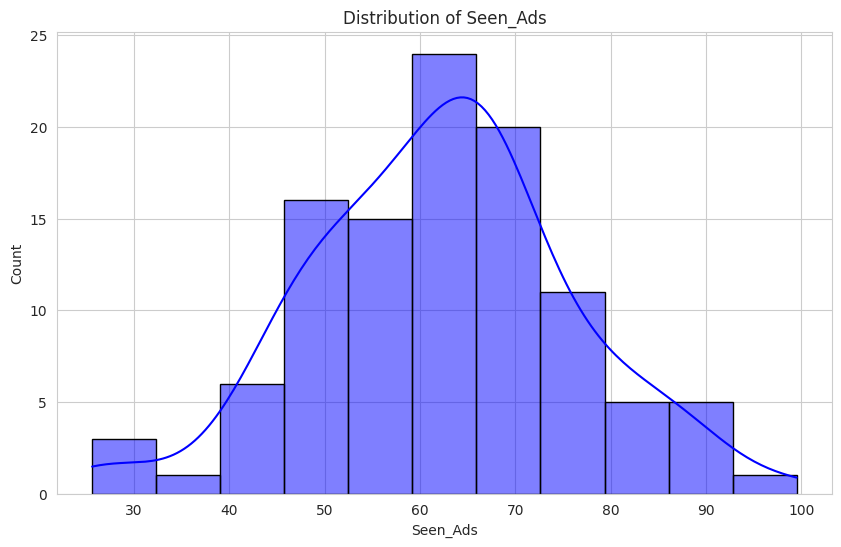

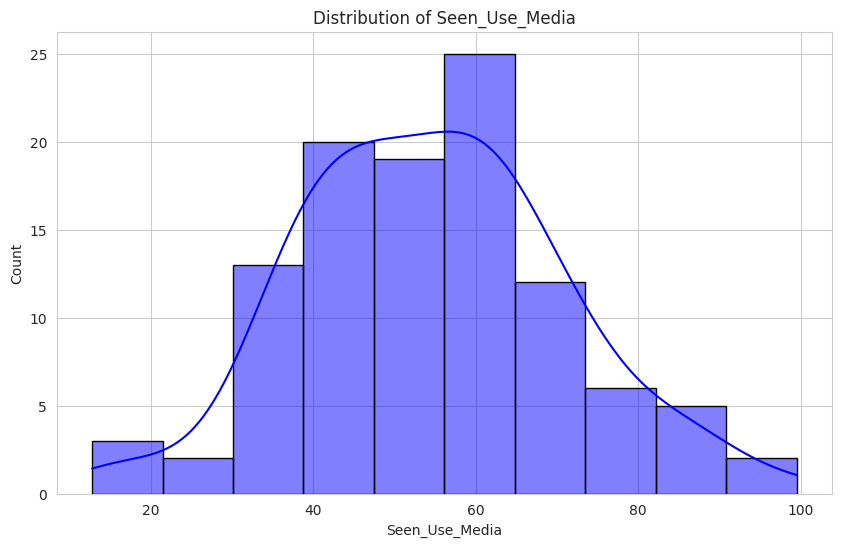

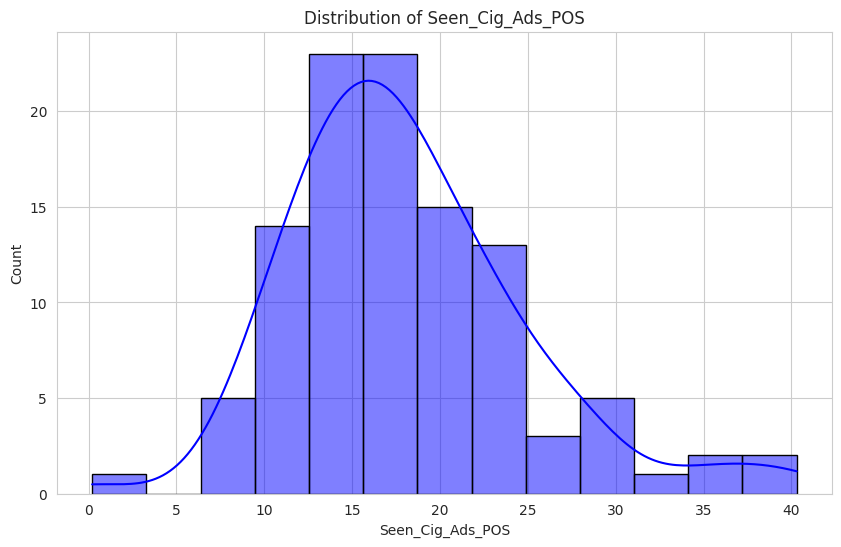

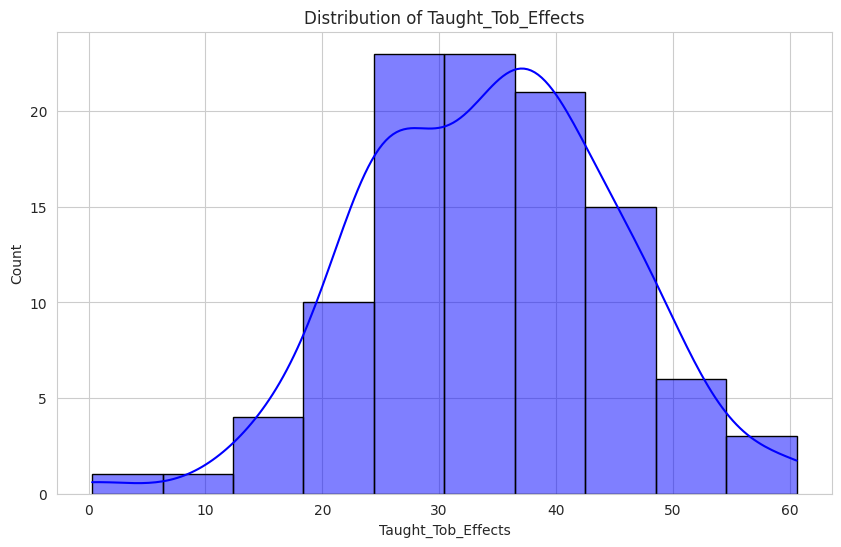

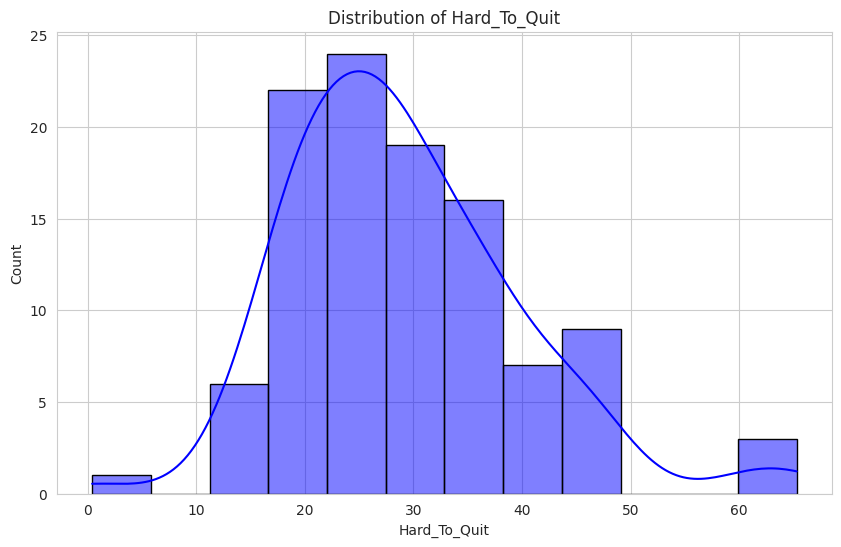

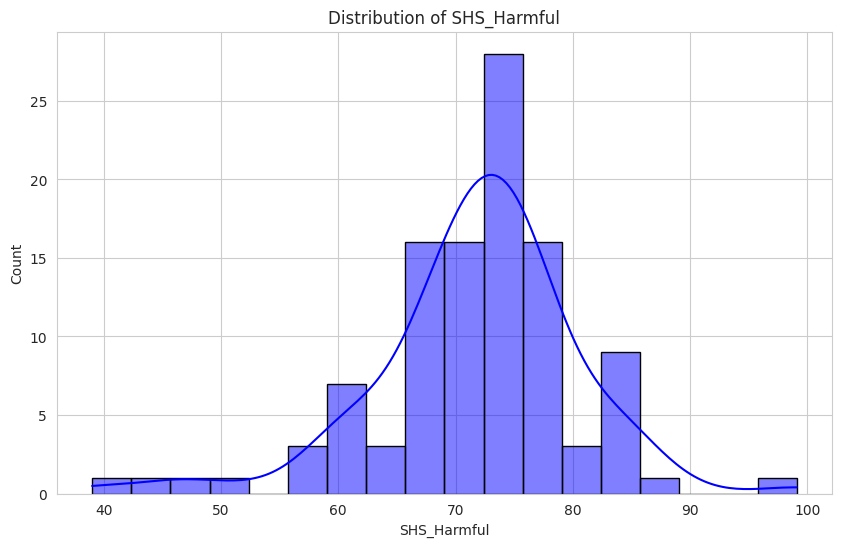

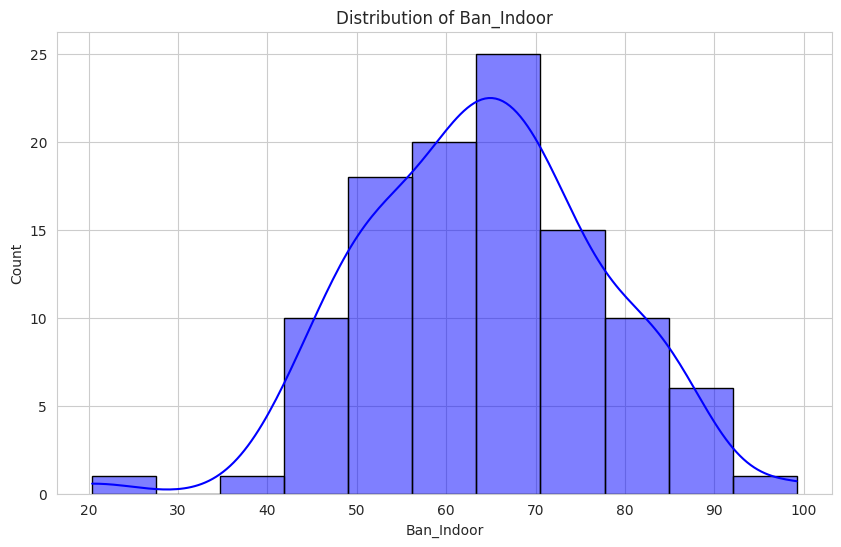

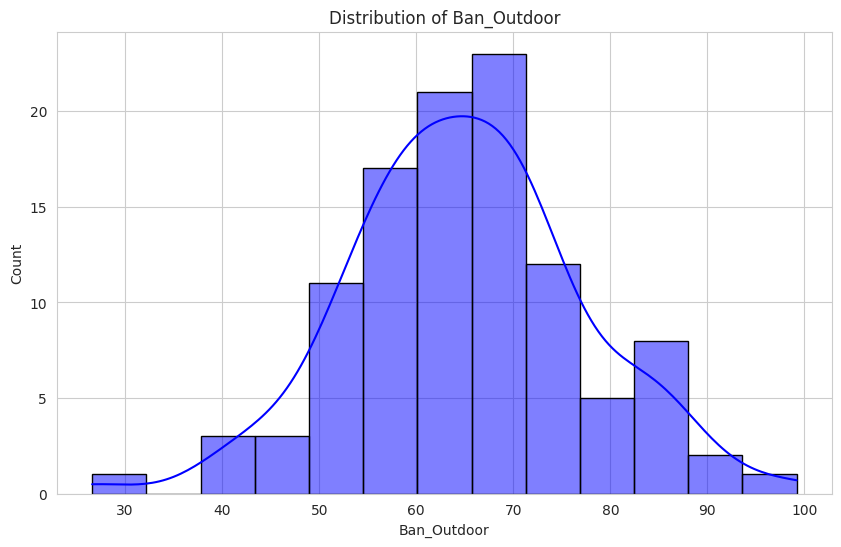

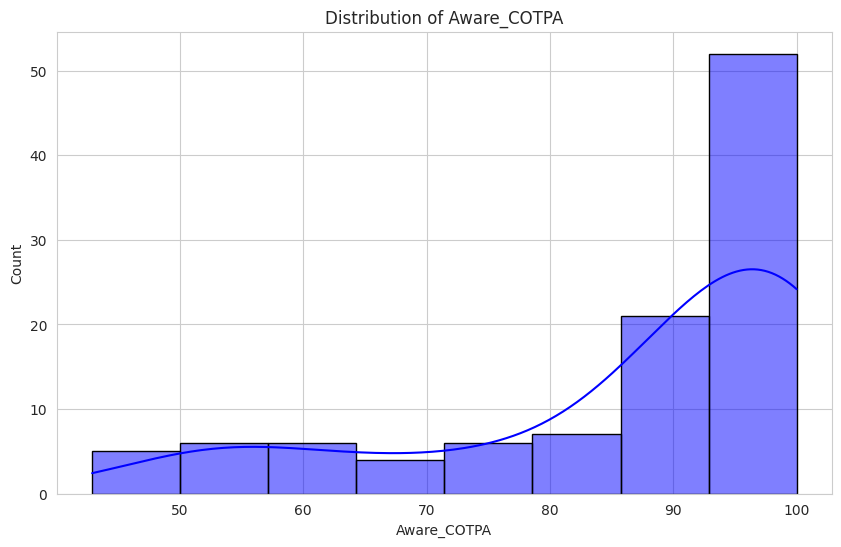

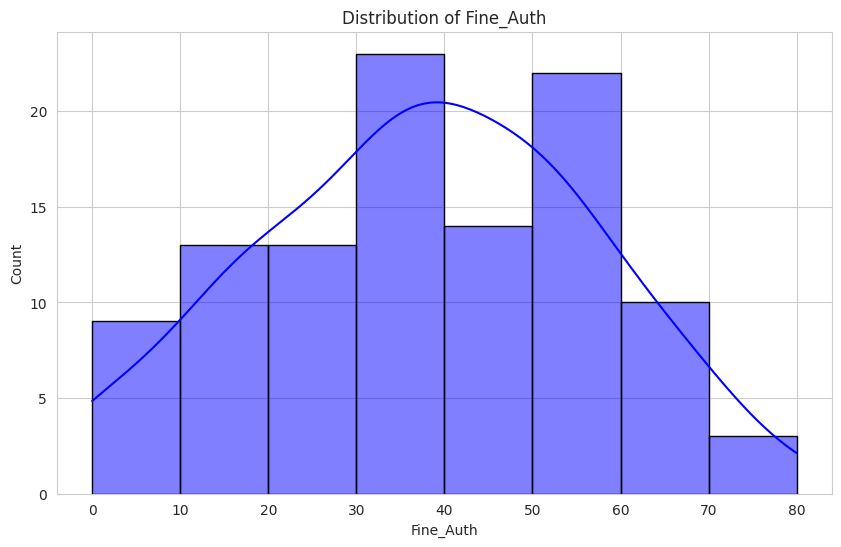

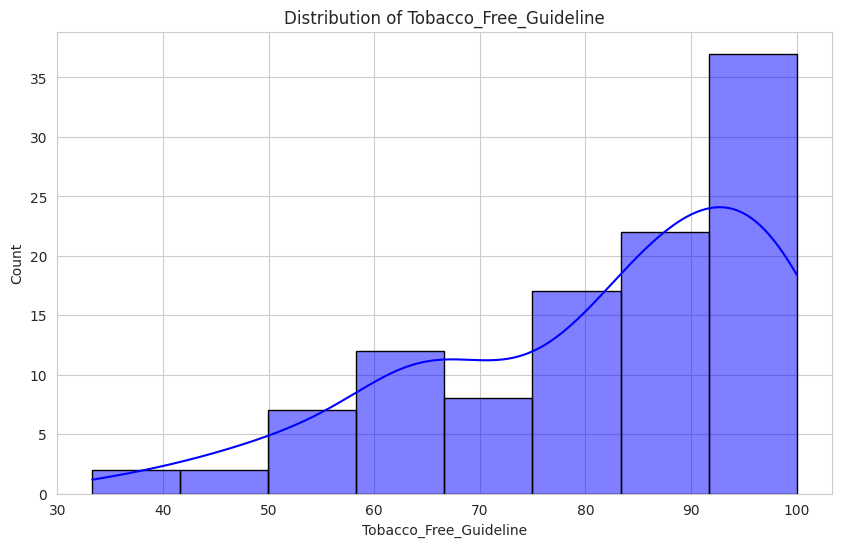

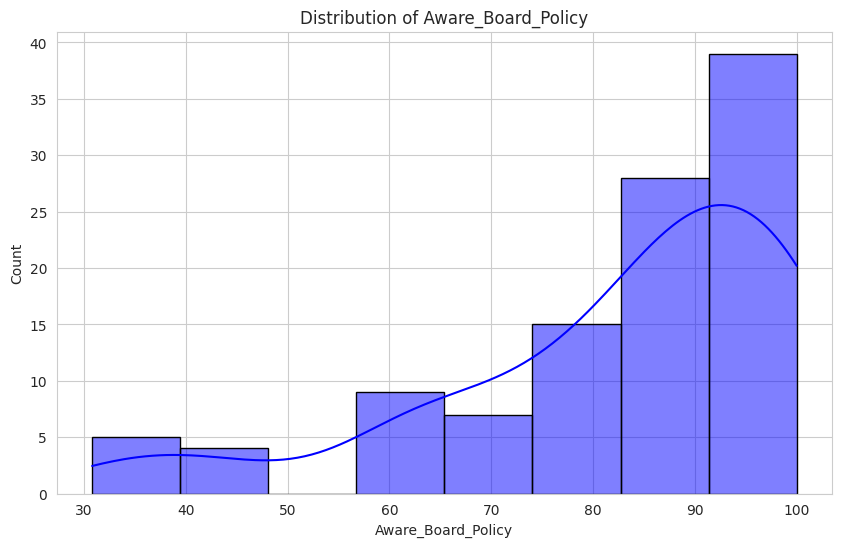

In [98]:
# Univariate analysis for numerical columns
colsss=['Ever_Tob_Use', 'Curr_Tob_Use',
       'Ever_Smoke', 'Curr_Smoke', 'Ever_Cig', 'Curr_Cig', 'Ever_Bidi',
       'Curr_Bidi', 'Ever_SLT', 'Curr_SLT', 'Ever_PM_Tob', 'Suscept_Cig',
       'Age_Init_Cig', 'Age_Init_Bidi', 'Age_Init_SLT', 'E_Cig_Aware',
       'E_Cig_Ever', 'Quit_Smoke_12mo', 'TryQuit_Smoke_12mo', 'WantQuit_Smoke',
       'Quit_SLT_12mo', 'TryQuit_SLT_12mo', 'WantQuit_SLT', 'Smoke_Exposure',
       'Smoke_Home', 'Smoke_Enclosed', 'Smoke_Outdoor', 'Seen_Smoke_School',
       'Source_Cig_Store', 'Source_Cig_Paan', 'Source_Bidi_Store',
       'Source_Bidi_Paan', 'Source_SLT_Store', 'Source_SLT_Paan',
       'Bought_Cig_Loc', 'Bought_Bidi_Loc', 'Refused_Cig_Sale',
       'Refused_Bidi_Sale', 'Refused_SLT_Sale', 'Cig_Stick', 'Bidi_Stick',
       'Seen_AT_Message', 'Seen_AT_Media', 'Seen_AT_Events', 'Seen_Warnings',
       'Seen_Ads', 'Seen_Use_Media', 'Seen_Cig_Ads_POS', 'Taught_Tob_Effects',
       'Hard_To_Quit', 'SHS_Harmful', 'Ban_Indoor', 'Ban_Outdoor',
       'Aware_COTPA', 'Fine_Auth', 'Tobacco_Free_Guideline',
       'Aware_Board_Policy']
for col in colsss:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color='blue',edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.show()

## Correlation Heatmap

In [116]:
df.columns

Index(['Unnamed: 0', 'Ever_Tob_Use', 'Curr_Tob_Use', 'Ever_Smoke',
       'Curr_Smoke', 'Ever_Cig', 'Curr_Cig', 'Ever_Bidi', 'Curr_Bidi',
       'Ever_SLT', 'Curr_SLT', 'Ever_PM_Tob', 'Suscept_Cig', 'Age_Init_Cig',
       'Age_Init_Bidi', 'Age_Init_SLT', 'E_Cig_Aware', 'E_Cig_Ever',
       'Quit_Smoke_12mo', 'TryQuit_Smoke_12mo', 'WantQuit_Smoke',
       'Quit_SLT_12mo', 'TryQuit_SLT_12mo', 'WantQuit_SLT', 'Smoke_Exposure',
       'Smoke_Home', 'Smoke_Enclosed', 'Smoke_Outdoor', 'Seen_Smoke_School',
       'Source_Cig_Store', 'Source_Cig_Paan', 'Source_Bidi_Store',
       'Source_Bidi_Paan', 'Source_SLT_Store', 'Source_SLT_Paan',
       'Bought_Cig_Loc', 'Bought_Bidi_Loc', 'Refused_Cig_Sale',
       'Refused_Bidi_Sale', 'Refused_SLT_Sale', 'Cig_Stick', 'Bidi_Stick',
       'Seen_AT_Message', 'Seen_AT_Media', 'Seen_AT_Events', 'Seen_Warnings',
       'Seen_Ads', 'Seen_Use_Media', 'Seen_Cig_Ads_POS', 'Taught_Tob_Effects',
       'Hard_To_Quit', 'SHS_Harmful', 'Ban_Indoor', 'Ban_Outdoor',

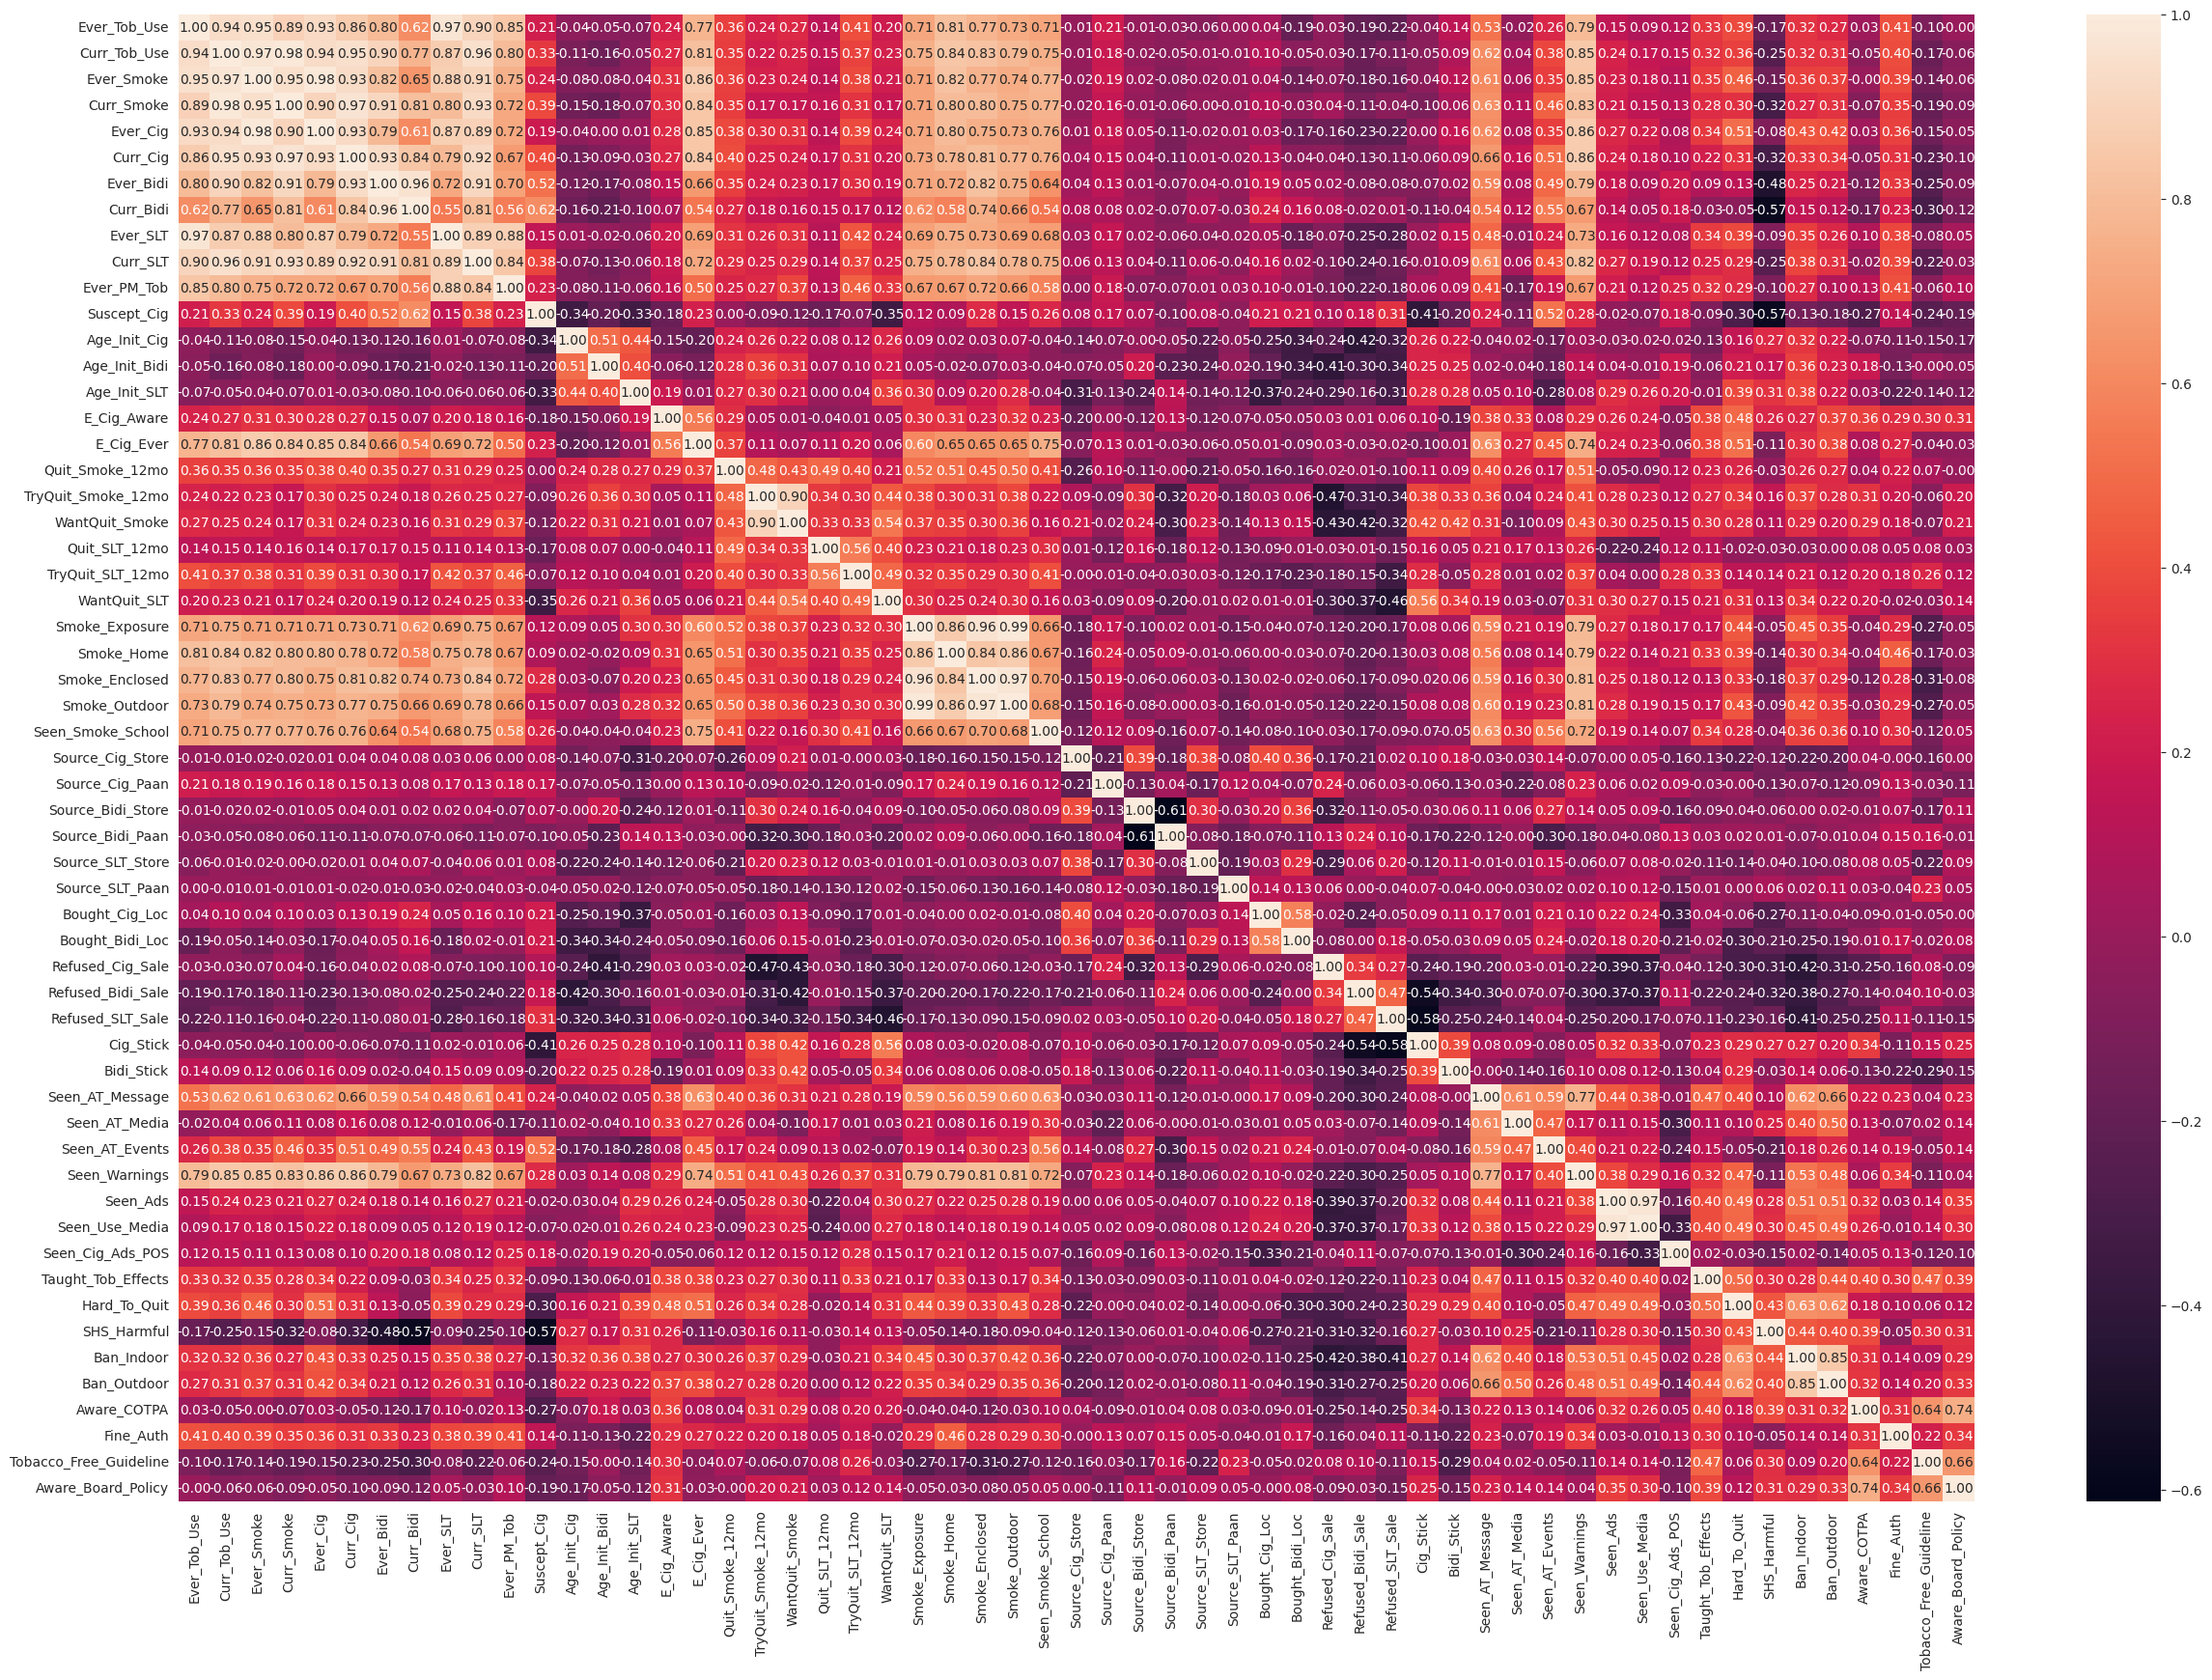

In [120]:
cor=df.drop(columns=["Unnamed: 0"]).select_dtypes(include="number").corr()
plt.figure(figsize=(30,20))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.show()
